In [236]:
#filtering warnings 

import warnings 
warnings.filterwarnings('ignore')


In [237]:
#importing the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [238]:

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',130)

# <font color=blue>AIM : To identify patterns that indicate if a client has difficulty paying their loan and being defaulty based on different factors. This can be used for taking action like Reject the loan, Reduce loan amount or lending amount at higher interest rate </font>


# Task 1: Reading the data 

In [239]:
loan = pd.read_csv(r'application_data.csv')

##### Data Preview

In [240]:
loan.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## Task 2:Check Structure of DataFrame

##### Check Data structure dimensions

In [241]:
loan.shape

(307511, 122)

##### Check Data types of feature

In [242]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [243]:
loan.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Task 3: Data Cleaning(Quality Checks, Missing Value, Outliers, Binning)

### Subtask 1 : Data Cleaning / Quality Checks

##### Check the count of missing values in each column

In [244]:
loan.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

##### Calculate the Percentage of missing values in each column

In [245]:
def missing_per(col):
    missing_colper=round(((col.isnull().sum())/len(col))*100,4)
    return missing_colper
Nullper=loan.apply(lambda x:missing_per(x))
Nullper



SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


##### Covert Nullper Series into Dataframe with column name

In [246]:
Nullper_df=Nullper.to_frame()
Nullper_df.columns=['Nullvalue%']

##### Find the Name of columns having more than or equal to 50% null value.

In [247]:
Col_50perplus_nullvalues=list(Nullper_df[Nullper_df['Nullvalue%']>=50.00].index)
Col_50perplus_nullvalues

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [248]:
type(Col_50perplus_nullvalues)

list

#### Remove Columns with columns more than and equal to 50% null values if the feature is not relevant for your analysis 
#Removing all columns from list Col_50perplus_nullvalues(with more than or equal to 50% null values) as they do not seems to be very relevant for our analysis except EXT_SOURCE_1 as this looks relevant for now
           




In [249]:
Col_50perplus_nullvalues.remove('EXT_SOURCE_1')

In [250]:
col_to_drop=Col_50perplus_nullvalues
loan.drop(col_to_drop,axis=1,inplace=True)

In [251]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

##### Check Number of Null values in each column.

In [252]:
loan.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [253]:
loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

##### Dropping the below documents columns columns as the client document type do not seem to be affecting the Loan default factors.

In [254]:
col_to_drop=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
            'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
             'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
             'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',]
loan.drop(col_to_drop,axis=1,inplace=True)

In [255]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

##### Dropping the below columns columns as they do not seem to be affecting the Loan default factors.

In [256]:
col_to_drop=['NAME_TYPE_SUITE','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
            'FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
             'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
            'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
]
loan.drop(col_to_drop,axis=1,inplace=True)


##### Dropping the below columns columns as they do not seem to be affecting the Loan default factors.

In [257]:
col_to_drop=['FLAG_MOBIL','FLAG_CONT_MOBILE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
loan.drop(col_to_drop,axis=1,inplace=True)

In [258]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

##### Calculate the Percentage of missing values in the latest columns.

In [259]:
loan.apply(lambda x:missing_per(x))


SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3455
CNT_FAM_MEMBERS                 0.0007
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
EXT_SOURCE_1             

In [260]:
loan['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

##### Enquiry Data not required,Hence dropping.

In [261]:
col_to_drop=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
loan.drop(col_to_drop,axis=1,inplace=True)

In [262]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [263]:
loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
0                            2  Business Entity Type 3      0.083037   
1                            1                  School      0.311267   
2                            2              Government           NaN   
3                            2  Business Entity Type 3           NaN   
4                            2                Religion           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                 -1134.0  
1                       0.0                  -828.0  
2                       0.0                  -815.0  
3                       0.0                  -617.0  
4                       0.0                 -1106.0

##### Dropping column CNT_CHILDREN as CNT_FAM_MEMBERS data is greator than column CNT_CHILDREN.
##### Suggesting that fam_members will include childers too.

In [264]:
col_to_drop=['CNT_CHILDREN']
loan.drop(col_to_drop,axis=1,inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

##### Dropping column 'EXT_SOURCE_1' as it has 56.3811 Null values #Got using loan.apply(lambda x:missing_per(x)).

In [265]:
col_to_drop=['EXT_SOURCE_1']
loan.drop(col_to_drop,axis=1,inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

## Subtask 2 :Dealing with missing values by removing/imputing: Report the missing value and imputation technique

In [266]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

### 1. Handling missing values in AMT_ANNUITY column.

##### To Deal with Missing values in AMT_ANNUITY column.
##### From the above Misisng value percent calculation we see that the missing value percent for AMT_ANNUITY coloumn =0.0039%.
##### which is a very small and hence we can drop these rows as imputation.

In [270]:
new_loan=loan[~(loan['AMT_ANNUITY'].isnull())]
new_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                 -1134.0  
1                       0.0                  -828.0  
2                       0.0                  -815.0  
3                       0.0                  -617.0  
4                       0.0                 -1106.0

In [271]:
new_loan.apply(lambda x:missing_per(x))

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0904
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3468
CNT_FAM_MEMBERS                 0.0007
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
EXT_SOURCE_2                    0.2146
EXT_SOURCE_3             

### 2. Handling missing values in AMT_GOODS_PRICE column

##### Since the Missing values percetage in AMT_GOODS_PRICE = 0.0904 We can drop all the rows with Null/Missing values.

In [272]:
new_loan=new_loan[~(new_loan['AMT_GOODS_PRICE'].isnull())]
new_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                 -1134.0  
1                       0.0                  -828.0  
2                       0.0                  -815.0  
3                       0.0                  -617.0  
4                       0.0                 -1106.0

In [273]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   AMT_INCOME_TOTAL             307221 non-null  float64
 7   AMT_CREDIT                   307221 non-null  float64
 8   AMT_ANNUITY                  307221 non-null  float64
 9   AMT_GOODS_PRICE              307221 non-null  float64
 10  NAME_INCOME_TYPE             307221 non-null  object 
 11  NAME_EDUCATION_TYPE          307221 non-null  object 
 12  NAME_FAMILY_STATUS           307221 non-null  object 
 13 

### 3. Handling missing values in OCCUPATION_TYPE column.

In [274]:
new_loan.apply(lambda x:missing_per(x))

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0000
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3566
CNT_FAM_MEMBERS                 0.0000
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
EXT_SOURCE_2                    0.2145
EXT_SOURCE_3             

##### From missing value percentage using missing_per(x) function.
##### Since the Missing values percetage in OCCUPATION_TYPE = 31.35% Which is high Hence we cannot drop all the rows with missing value.
##### We can impute the missing value using MODE beacuse it is a categorical variable.

In [275]:
common_occup=new_loan['OCCUPATION_TYPE'].mode()[0]
common_occup

'Laborers'

In [276]:
new_loan['OCCUPATION_TYPE'].fillna(common_occup,inplace=True)


In [278]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   AMT_INCOME_TOTAL             307221 non-null  float64
 7   AMT_CREDIT                   307221 non-null  float64
 8   AMT_ANNUITY                  307221 non-null  float64
 9   AMT_GOODS_PRICE              307221 non-null  float64
 10  NAME_INCOME_TYPE             307221 non-null  object 
 11  NAME_EDUCATION_TYPE          307221 non-null  object 
 12  NAME_FAMILY_STATUS           307221 non-null  object 
 13 

In [279]:
new_loan['OCCUPATION_TYPE'].describe()

count       307221
unique          18
top       Laborers
freq        151466
Name: OCCUPATION_TYPE, dtype: object

In [280]:
new_loan['OCCUPATION_TYPE'].value_counts()

Laborers                 151466
Sales staff               32063
Core staff                27530
Managers                  21347
Drivers                   18589
High skill tech staff     11370
Accountants                9801
Medicine staff             8527
Security staff             6712
Cooking staff              5939
Cleaning staff             4648
Private service staff      2648
Low-skill Laborers         2092
Waiters/barmen staff       1346
Secretaries                1304
Realty agents               751
HR staff                    563
IT staff                    525
Name: OCCUPATION_TYPE, dtype: int64

### 4. Handling missing values in EXT_SOURCE_2.

In [281]:
new_loan.apply(lambda x:missing_per(x))

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0000
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                 0.0000
CNT_FAM_MEMBERS                 0.0000
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
EXT_SOURCE_2                    0.2145
EXT_SOURCE_3             

In [282]:
new_loan.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     659
EXT_SOURCE_3                   60896
OBS_30_CNT_SOCIAL_CIRCLE        1021
D

##### From missing value percentage using missing_per(x) function.
##### Since the Missing values percetage in EXT_SOURCE_2 = 0.2146% Which is also significant Hence we can either drop all the rows with missing value.
##### OR We can impute the missing value using Mean/Median beacuse it is a Numerical variable of type float.
##### I suggest replacing the missing values with mean as it will not affect case study beacuse of this reason.

In [283]:
ext_2_mean=new_loan['EXT_SOURCE_2'].mean()
ext_2_mean

0.5143912939578273

##### filling missing values of EXT_SOURCE_2 with mean.

In [284]:
new_loan['EXT_SOURCE_2'].fillna(ext_2_mean,inplace=True)

In [285]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   AMT_INCOME_TOTAL             307221 non-null  float64
 7   AMT_CREDIT                   307221 non-null  float64
 8   AMT_ANNUITY                  307221 non-null  float64
 9   AMT_GOODS_PRICE              307221 non-null  float64
 10  NAME_INCOME_TYPE             307221 non-null  object 
 11  NAME_EDUCATION_TYPE          307221 non-null  object 
 12  NAME_FAMILY_STATUS           307221 non-null  object 
 13 

### 4. Handling missing values in DAYS_LAST_PHONE_CHANGE 


##### Check Number of Missing values in DAYS_LAST_PHONE_CHANGE.

In [286]:
new_loan['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

##### Check Missing value Percentage in DAYS_LAST_PHONE_CHANGE.

In [287]:
round(((new_loan['DAYS_LAST_PHONE_CHANGE'].isnull().sum())/len(new_loan['DAYS_LAST_PHONE_CHANGE']))*100,4)

0.0003

##### Since the missing value percentage for the column DAYS_LAST_PHONE_CHANGE is 0.0003.
##### We can drop all the rows with missing value.

In [288]:
new_loan=new_loan[~(new_loan['DAYS_LAST_PHONE_CHANGE'].isnull())]

In [289]:
new_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                 -1134.0  
1                       0.0                  -828.0  
2                       0.0                  -815.0  
3                       0.0                  -617.0  
4                       0.0                 -1106.0

### 5.Handle Missing values for 
1. OBS_30_CNT_SOCIAL_CIRCLE,
2. DEF_30_CNT_SOCIAL_CIRCLE,
3. OBS_60_CNT_SOCIAL_CIRCLE,
4. DEF_60_CNT_SOCIAL_CIRCLE

###### Check Missing value Percentage in above columns

In [290]:
print(round(((new_loan['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())/len(new_loan['OBS_30_CNT_SOCIAL_CIRCLE']))*100,4))

print(round(((new_loan['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())/len(new_loan['OBS_60_CNT_SOCIAL_CIRCLE']))*100,4))

print(round(((new_loan['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())/len(new_loan['DEF_30_CNT_SOCIAL_CIRCLE']))*100,4))

print(round(((new_loan['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())/len(new_loan['DEF_60_CNT_SOCIAL_CIRCLE']))*100,4))

0.3323
0.3323
0.3323
0.3323


In [291]:
new_loan[new_loan['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
68          100080       0    Revolving loans           F            N   
394         100457       0    Revolving loans           F            Y   
397         100460       0    Revolving loans           F            N   
457         100527       0    Revolving loans           F            N   
1042        101209       0    Revolving loans           M            Y   
...            ...     ...                ...         ...          ...   
305526      453980       0    Revolving loans           F            Y   
305623      454093       0    Revolving loans           M            Y   
305641      454116       0    Revolving loans           F            N   
305642      454117       0    Revolving loans           F            Y   
307402      456135       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
68                   N          157500.0    450000.0      22500.0   
394                  Y          211500.0    270000.0      13500.0   
397                  N          315000.0    540000.0      27000.0   
457                  N          112500.0    270000.0      13500.0   
1042                 N          180000.0    540000.0      27000.0   
...                ...               ...         ...          ...   
305526               Y           72000.0    225000.0      11250.0   
305623               Y           90000.0    202500.0      10125.0   
305641               N          270000.0    765000.0      38250.0   
305642               Y          202500.0    765000.0      38250.0   
307402               Y          157500.0    382500.0      19125.0   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
68             450000.0  Commercial associate  Secondary / secondary special   
394            270000.0               Working               Higher education   
397            540000.0  Commercial associate               Higher education   
457            270000.0  Commercial associate               Higher education   
1042           540000.0  Commercial associate               Higher education   
...                 ...                   ...                            ...   
305526         225000.0               Working  Secondary / secondary special   
305623         202500.0               Working  Secondary / secondary special   
305641         765000.0             Pensioner  Secondary / secondary special   
305642         765000.0         State servant               Higher education   
307402         382500.0             Pensioner  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
68            Civil marriage  House / apartment                    0.010966   
394     Single / not married  House / apartment                    0.006008   
397     Single / not married   Rented apartment                    0.014464   
457           Civil marriage  House / apartment                    0.026392   
1042                 Married  House / apartment                    0.025164   
...                      ...                ...                         ...   
305526               Married  House / apartment                    0.010643   
305623               Married  House / apartment                    0.015221   
305641  Single / not married  House / apartment                    0.072508   
305642               Married  House / apartment                    0.025164   
307402                 Widow  House / apartment                    0.028663   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
68          -11956          -3154            -8118.0            -4143   
394          -8922           -728            -8882.0              -66   
397          -9842           -157            -2291.0            -2291   
457          -9393           -992            -4145.0            -2081   
1042        -18

#####  Since the misisng value percentage for the above columns are 0.3323 and the data is null for all mentioned columns.OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE.

#We can drop the null 1021

In [292]:
new_loan=new_loan[~(new_loan['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())]

In [293]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306199 non-null  int64  
 1   TARGET                       306199 non-null  int64  
 2   NAME_CONTRACT_TYPE           306199 non-null  object 
 3   CODE_GENDER                  306199 non-null  object 
 4   FLAG_OWN_CAR                 306199 non-null  object 
 5   FLAG_OWN_REALTY              306199 non-null  object 
 6   AMT_INCOME_TOTAL             306199 non-null  float64
 7   AMT_CREDIT                   306199 non-null  float64
 8   AMT_ANNUITY                  306199 non-null  float64
 9   AMT_GOODS_PRICE              306199 non-null  float64
 10  NAME_INCOME_TYPE             306199 non-null  object 
 11  NAME_EDUCATION_TYPE          306199 non-null  object 
 12  NAME_FAMILY_STATUS           306199 non-null  object 
 13 

## Subtask 3-  Data Quality Checks for All the finalized Columns

In [294]:
new_loan.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                 -1134.0  
1                       0.0                  -828.0  
2                       0.0                  -815.0  
3                       0.0                  -617.0  
4                       0.0                 -1106.0

#### 1. Checks for Target :

##### We see two target vallues 0 and 1, 0-Non Default 1-Default.

In [295]:
print("data type->"+str(new_loan['TARGET'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['TARGET'].value_counts()))

data type->int64


Value types :
0    281431
1     24768
Name: TARGET, dtype: int64


#### 2. Checks for Contract type :

In [296]:
print("data type->"+str(new_loan['NAME_CONTRACT_TYPE'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['NAME_CONTRACT_TYPE'].value_counts()))

data type->object


Value types :
Cash loans         278218
Revolving loans     27981
Name: NAME_CONTRACT_TYPE, dtype: int64


#### 3. Checks for CODE_GENDER:


In [297]:
print("data type->"+str(new_loan['CODE_GENDER'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['CODE_GENDER'].value_counts()))

data type->object


Value types :
F      201596
M      104599
XNA         4
Name: CODE_GENDER, dtype: int64


##### Dropping XNA Gender rows since the total rows is small 4.
##### Post removal of xna -gender distribution.

In [298]:
new_loan=new_loan[~(new_loan['CODE_GENDER']=='XNA')]

print("Value types :\n"+str(new_loan['CODE_GENDER'].value_counts()))

Value types :
F    201596
M    104599
Name: CODE_GENDER, dtype: int64


#### 4. Checks for  FLAG_OWN_CAR:

In [299]:
print("data type->"+str(new_loan['FLAG_OWN_CAR'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['FLAG_OWN_CAR'].value_counts()))

data type->object


Value types :
N    201977
Y    104218
Name: FLAG_OWN_CAR, dtype: int64


##### 5. Checks for FLAG_OWN_REALTY:

In [65]:
print("data type->"+str(new_loan['FLAG_OWN_REALTY'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['FLAG_OWN_REALTY'].value_counts()))

data type->object


Value types :
Y    212340
N     93855
Name: FLAG_OWN_REALTY, dtype: int64


##### 6. Checks for NAME_INCOME_TYPE.

In [300]:
print("data type->"+str(new_loan['NAME_INCOME_TYPE'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['NAME_INCOME_TYPE'].value_counts()))


data type->object


Value types :
Working                 158108
Commercial associate     71246
Pensioner                55170
State servant            21619
Unemployed                  19
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


##### 7. Checks for NAME_EDUCATION_TYPE.

In [301]:
print("data type->"+str(new_loan['NAME_EDUCATION_TYPE'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['NAME_EDUCATION_TYPE'].value_counts()))

data type->object


Value types :
Secondary / secondary special    217665
Higher education                  74340
Incomplete higher                 10219
Lower secondary                    3807
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


##### 7. Checks for NAME_FAMILY_STATUS .

In [302]:
print("data type->"+str(new_loan['NAME_FAMILY_STATUS'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['NAME_FAMILY_STATUS'].value_counts()))

data type->object


Value types :
Married                 195659
Single / not married     45165
Civil marriage           29653
Separated                19685
Widow                    16033
Name: NAME_FAMILY_STATUS, dtype: int64


##### 8. Checks for NAME_HOUSING_TYPE.

In [303]:
print("data type->"+str(new_loan['NAME_HOUSING_TYPE'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['NAME_HOUSING_TYPE'].value_counts()))

data type->object


Value types :
House / apartment      271712
With parents            14781
Municipal apartment     11132
Rented apartment         4853
Office apartment         2603
Co-op apartment          1114
Name: NAME_HOUSING_TYPE, dtype: int64


##### 9. Checking all Days column 

In [304]:
new_loan[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0

##### Observed that the 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' columns are numeric
##### However there is '-' in start of the data in these columns.
##### Removing - from 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'.

In [305]:
new_loan['DAYS_BIRTH']=new_loan['DAYS_BIRTH'].apply(lambda x: int(str(x)[1:]) if str(x)[0]=='-' else int(x))
new_loan['DAYS_EMPLOYED']=new_loan['DAYS_EMPLOYED'].apply(lambda x: int(str(x)[1:]) if str(x)[0]=='-' else int(x))
new_loan['DAYS_REGISTRATION']=new_loan['DAYS_REGISTRATION'].apply(lambda x: int(str(int(x))[1:]) if str(int(x))[0]=='-' else int(x))
new_loan['DAYS_ID_PUBLISH']=new_loan['DAYS_ID_PUBLISH'].apply(lambda x: int(str(x)[1:]) if str(x)[0]=='-' else int(x))


In [306]:
new_loan['DAYS_LAST_PHONE_CHANGE']=new_loan['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: int(str(int(x))[1:]) if str(int(x))[0]=='-' else int(x))

In [307]:
new_loan[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   

   DAYS_LAST_PHONE_CHANGE  
0                    1134  
1                     828  
2                     815  
3                     617  
4                    1106

##### Check for days_birth smaller than corresponding days_employed.
##### We see 55180 rows having new_loan['DAYS_BIRTH']<new_loan['DAYS_EMPLOYED'] which is not logical .

In [308]:
new_loan[new_loan['DAYS_BIRTH']<new_loan['DAYS_EMPLOYED']]




SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307469      456209       0         Cash loans           F            N   
307483      456227       0         Cash loans           F            N   
307487      456231       0         Cash loans           M            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                    Y        112500.000   1019610.0      33826.5   
11                   Y         38419.155    148365.0      10678.5   
23                   Y         83250.000    239850.0      23850.0   
38                   Y         99000.000    247275.0      17338.5   
43                   Y        108000.000    746280.0      42970.5   
...                ...               ...         ...          ...   
307469               Y        202500.000    703728.0      29943.0   
307483               Y         99000.000    247275.0      16479.0   
307487               Y        117000.000   1071909.0      31473.0   
307505               Y        112500.000    225000.0      22050.0   
307507               Y         72000.000    269550.0      12001.5   

        AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
8              913500.0        Pensioner  Secondary / secondary special   
11             135000.0        Pensioner  Secondary / secondary special   
23             225000.0        Pensioner  Secondary / secondary special   
38             225000.0        Pensioner  Secondary / secondary special   
43             675000.0        Pensioner               Higher education   
...                 ...              ...                            ...   
307469         607500.0        Pensioner  Secondary / secondary special   
307483         225000.0        Pensioner  Secondary / secondary special   
307487         936000.0        Pensioner  Secondary / secondary special   
307505         225000.0        Pensioner  Secondary / secondary special   
307507         225000.0        Pensioner  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
8                    Married  House / apartment                    0.018634   
11                   Married  House / apartment                    0.015221   
23                   Married  House / apartment                    0.006296   
38                   Married  House / apartment                    0.006207   
43      Single / not married  House / apartment                    0.010966   
...                      ...                ...                         ...   
307469  Single / not married  House / apartment                    0.031329   
307483             Separated  House / apartment                    0.007330   
307487               Married  House / apartment                    0.010147   
307505  Single / not married  House / apartment                    0.022800   
307507                 Widow  House / apartment                    0.025164   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
8            20099         365243               7427             3514   
11           20417         365243               5246             2512   
23           24827         365243               9012             3684   
38           23920         365243               9817             4969   
43           23548         365243               5745             4576   
..


##### 10. Checks for OCCUPATION_TYPE

In [309]:

print("data type->"+str(new_loan['OCCUPATION_TYPE'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['OCCUPATION_TYPE'].value_counts()))

data type->object


Value types :
Laborers                 151000
Sales staff               31982
Core staff                27417
Managers                  21211
Drivers                   18553
High skill tech staff     11323
Accountants                9755
Medicine staff             8506
Security staff             6697
Cooking staff              5922
Cleaning staff             4631
Private service staff      2643
Low-skill Laborers         2089
Waiters/barmen staff       1344
Secretaries                1298
Realty agents               747
HR staff                    562
IT staff                    515
Name: OCCUPATION_TYPE, dtype: int64


##### 12. Checks for CNT_FAM_MEMBERS :  

In [310]:
print("data type->"+str(new_loan['CNT_FAM_MEMBERS'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['CNT_FAM_MEMBERS'].value_counts()))

data type->float64


Value types :
2.0     157706
1.0      67506
3.0      52396
4.0      24596
5.0       3464
6.0        406
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


##### 13. Checks for REGION_RATING_CLIENT 

In [311]:
print("data type->"+str(new_loan['REGION_RATING_CLIENT'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['REGION_RATING_CLIENT'].value_counts()))

data type->int64


Value types :
2    226056
3     48196
1     31943
Name: REGION_RATING_CLIENT, dtype: int64


##### 14.Checks for REGION_RATING_CLIENT_W_CITY :

In [312]:

print("data type->"+str(new_loan['REGION_RATING_CLIENT_W_CITY'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['REGION_RATING_CLIENT_W_CITY'].value_counts()))

data type->int64


Value types :
2    228541
3     43742
1     33912
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


##### 15. Checked for ORGANIZATION_TYPE distrubution and observed a large number of XNA values =55180.

In [313]:
print("data type->"+str(new_loan['ORGANIZATION_TYPE'].dtype))
print("\n")
print("Value types :\n"+str(new_loan['ORGANIZATION_TYPE'].value_counts()))

data type->object


Value types :
Business Entity Type 3    67664
XNA                       55180
Self-employed             38238
Other                     16619
Medicine                  11137
Business Entity Type 2    10506
Government                10367
School                     8868
Trade: type 7              7809
Kindergarten               6847
Construction               6692
Business Entity Type 1     5950
Transport: type 4          5378
Trade: type 3              3476
Industry: type 9           3355
Industry: type 3           3269
Security                   3234
Housing                    2949
Industry: type 11          2693
Military                   2624
Bank                       2480
Agriculture                2447
Police                     2332
Transport: type 2          2197
Postal                     2145
Security Ministries        1964
Trade: type 2              1882
Restaurant                 1801
Services                   1570
University                 1315
Indust

##### Calculated the XNA value percentage for ORGANIZATION_TYPE and observed 18% XNA values .
##### we cannot impute these since it is second highest Hence Dropping it all rows with XNA.

In [314]:
(len(new_loan[new_loan['ORGANIZATION_TYPE']=='XNA'])/len(new_loan))*100


new_loan=new_loan[~(new_loan['ORGANIZATION_TYPE']=='XNA')]


## Subtask 4- Change the Incorrect Datatypes in new_Loan df

In [315]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251015 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251015 non-null  int64  
 1   TARGET                       251015 non-null  int64  
 2   NAME_CONTRACT_TYPE           251015 non-null  object 
 3   CODE_GENDER                  251015 non-null  object 
 4   FLAG_OWN_CAR                 251015 non-null  object 
 5   FLAG_OWN_REALTY              251015 non-null  object 
 6   AMT_INCOME_TOTAL             251015 non-null  float64
 7   AMT_CREDIT                   251015 non-null  float64
 8   AMT_ANNUITY                  251015 non-null  float64
 9   AMT_GOODS_PRICE              251015 non-null  float64
 10  NAME_INCOME_TYPE             251015 non-null  object 
 11  NAME_EDUCATION_TYPE          251015 non-null  object 
 12  NAME_FAMILY_STATUS           251015 non-null  object 
 13 

In [316]:
new_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               3648             2120        Laborers              1.0   
1               1186              291      Core staff              2.0   
2               4260             2531        Laborers              1.0   
3               9833             2437        Laborers              2.0   
4               4311             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                    1134  
1                       0.0                     828  
2                       0.0                     815  
3                       0.0                     617  
4                       0.0                    1106

##### Change CNT_FAM_MEMBERS from float to INT.

In [317]:

new_loan['CNT_FAM_MEMBERS']=new_loan['CNT_FAM_MEMBERS'].astype('int')
new_loan['CNT_FAM_MEMBERS'].dtype

dtype('int32')

##### Column REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY are given has int however it has value (1,2,3). Change these cols from int to object

In [318]:
new_loan['REGION_RATING_CLIENT']=new_loan['REGION_RATING_CLIENT'].astype(str)
new_loan['REGION_RATING_CLIENT_W_CITY']=new_loan['REGION_RATING_CLIENT_W_CITY'].astype(str)
new_loan['REGION_RATING_CLIENT_W_CITY'].dtype

dtype('O')

##### Change below columns to int from float.

In [319]:
#Change below columns to int from float 
new_loan['OBS_30_CNT_SOCIAL_CIRCLE']=new_loan['OBS_30_CNT_SOCIAL_CIRCLE'].astype('int')
new_loan['OBS_60_CNT_SOCIAL_CIRCLE']=new_loan['OBS_60_CNT_SOCIAL_CIRCLE'].astype('int')
new_loan['DEF_30_CNT_SOCIAL_CIRCLE']=new_loan['DEF_30_CNT_SOCIAL_CIRCLE'].astype('int')
new_loan['DEF_60_CNT_SOCIAL_CIRCLE']=new_loan['DEF_60_CNT_SOCIAL_CIRCLE'].astype('int')

In [320]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251015 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251015 non-null  int64  
 1   TARGET                       251015 non-null  int64  
 2   NAME_CONTRACT_TYPE           251015 non-null  object 
 3   CODE_GENDER                  251015 non-null  object 
 4   FLAG_OWN_CAR                 251015 non-null  object 
 5   FLAG_OWN_REALTY              251015 non-null  object 
 6   AMT_INCOME_TOTAL             251015 non-null  float64
 7   AMT_CREDIT                   251015 non-null  float64
 8   AMT_ANNUITY                  251015 non-null  float64
 9   AMT_GOODS_PRICE              251015 non-null  float64
 10  NAME_INCOME_TYPE             251015 non-null  object 
 11  NAME_EDUCATION_TYPE          251015 non-null  object 
 12  NAME_FAMILY_STATUS           251015 non-null  object 
 13 

## Subtask 5- Verify  Data Imbalance in Categorical Variable 

In [321]:
# 1. TARGET: More number of 
((new_loan.groupby('TARGET').count()['SK_ID_CURR'])/len(new_loan))*100

TARGET
0    91.320439
1     8.679561
Name: SK_ID_CURR, dtype: float64

In [322]:
#2. NAME_CONTRACT_TYPE
((new_loan.groupby('NAME_CONTRACT_TYPE').count()['SK_ID_CURR'])/len(new_loan))*100

NAME_CONTRACT_TYPE
Cash loans         90.11812
Revolving loans     9.88188
Name: SK_ID_CURR, dtype: float64

In [323]:
# 3. CODE_GENDER: More number of Female in dataset than males
((new_loan.groupby('CODE_GENDER').count()['SK_ID_CURR'])/len(new_loan))*100

CODE_GENDER
F    62.333725
M    37.666275
Name: SK_ID_CURR, dtype: float64

In [324]:
# 4. REGION_RATING_CLIENT: More number of Female in dataset than males
((new_loan.groupby('REGION_RATING_CLIENT').count()['SK_ID_CURR'])/len(new_loan))*100

REGION_RATING_CLIENT
1    10.962691
2    73.556162
3    15.481147
Name: SK_ID_CURR, dtype: float64

#  Subtask 6- Verify Outliers in Numerical 

### 1: Handling outlier for  for AMT_INCOME_TOTAL,'AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

In [74]:
new_loan.describe()

SK_ID_CURR         TARGET  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  251015.000000  251015.000000      2.510150e+05  2.510150e+05   
mean   278099.868307       0.086796      1.758140e+05  6.123181e+05   
std    102811.794299       0.281536      2.591747e+05  4.066347e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189020.500000       0.000000      1.125000e+05  2.786130e+05   
50%    278060.000000       0.000000      1.575000e+05  5.212800e+05   
75%    367136.000000       0.000000      2.115000e+05  8.317305e+05   
max    456255.000000       1.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  251015.000000     2.510150e+05               251015.000000   
mean    27845.906133     5.497788e+05                    0.020876   
std     14632.525148     3.733196e+05                    0.013855   
min      1980.000000     4.050000e+04                    0.000290   
25%     17100.000000     2.475000e+05                    0.010006   
50%     25897.500000     4.500000e+05                    0.018850   
75%     35617.500000     6.975000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  251015.000000  251015.000000      251015.000000    251015.000000   
mean    14770.686748    2384.437233        4634.882581      2801.025285   
std      3661.231954    2338.700721        3251.920099      1515.101837   
min      7489.000000       0.000000           0.000000         0.000000   
25%     11777.000000     767.000000        1845.000000      1488.000000   
50%     14574.000000    1648.000000        4265.000000      2887.000000   
75%     17564.000000    3175.000000        6950.500000      4177.000000   
max     25200.000000   17912.000000       22928.000000      7197.000000   

       CNT_FAM_MEMBERS  EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count    251015.000000  2.510150e+05  201401.000000             251015.000000   
mean          2.252957  5.160237e-01       0.500267                  1.415915   
std           0.942062  1.897772e-01       0.196005                  2.400095   
min           1.000000  8.173617e-08       0.000527                  0.000000   
25%           2.000000  3.985979e-01       0.357293                  0.000000   
50%           2.000000  5.664663e-01       0.520898                  0.000000   
75%           3.000000  6.636732e-01       0.657784                  2.000000   
max          20.000000  8.549997e-01       0.893976                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             251015.000000             251015.000000   
mean                   0.139936                  1.398857   
std                    0.441890                  2.378595   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
count             251015.000000           251015.000000  
mean                   0.097636              971.812286  
std                    0.358034              827.659777  
min                    0.000000                0.000000  
25%                    0.000000              288.000000  
50%                    0.000000              764.000000  
75%                    0.000000             1579.000000  
max                   24.000000             4292.000000

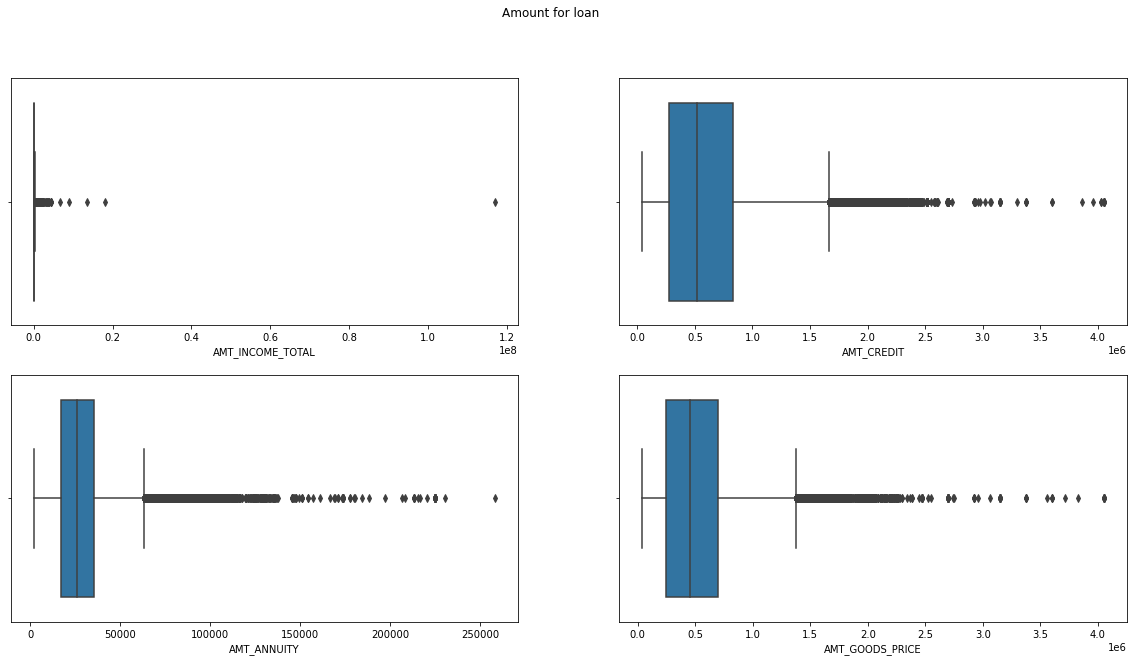

In [325]:
# Verifying Outliers for AMT_INCOME_TOTAL,'AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

fig, axes=plt.subplots(2,2, figsize=(20,10))
fig.suptitle('Amount for loan')

sns.boxplot(ax=axes[0,0],x='AMT_INCOME_TOTAL',data=new_loan)
sns.boxplot(ax=axes[0,1],x='AMT_CREDIT',data=new_loan)
sns.boxplot(ax=axes[1,0],x='AMT_ANNUITY',data=new_loan)
sns.boxplot(ax=axes[1,1],x='AMT_GOODS_PRICE',data=new_loan)
plt.show()

In [326]:
#Use Describe on outlier
new_loan[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      2.510150e+05  2.510150e+05  251015.000000     2.510150e+05
mean       1.758140e+05  6.123181e+05   27845.906133     5.497788e+05
std        2.591747e+05  4.066347e+05   14632.525148     3.733196e+05
min        2.565000e+04  4.500000e+04    1980.000000     4.050000e+04
25%        1.125000e+05  2.786130e+05   17100.000000     2.475000e+05
50%        1.575000e+05  5.212800e+05   25897.500000     4.500000e+05
75%        2.115000e+05  8.317305e+05   35617.500000     6.975000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06

# Inference from above Amount Outliers :
#1. For AMT_INCOME_TOTAL,, we observe a point which is far away from set of dataset point and also from the 
#summary of AMT_INCOME_TOTAL, There is a huge difference between maximum value and 75%, our mean is not closer to 50% value beacuse of outlier

#2.For 'AMT_CREDIT', 50% Median is closer to 25% so we suspect more people tends to take loan in range amount (2.786130e+05-5.212800e+05)
#from summary of 'AMT_CREDIT', 10 times difference between maximum and 75%

#3.for AMT_ANNUITY, Observe that 50% median is closer to 25% and There is huge difference 75% and maximum value 

#4. For AMT_GOODS_PRICE, Mean is not close to 50% value Hence we suspect outliers.
_____________________________________________________________________________________________

#TO handle outliers : 
we can use Interquantile method for eg:
1. Q1=new_loan.AMT_INCOME_TOTAL.quantile(0.25)
2. Q3=new_loan.AMT_INCOME_TOTAL.quantile(0.75)
3. Find IQR=Q3-Q1
4. low_lim=Q1-IQR*1.5
5. high_lim=Q3+IQR*1.5

So anything above low limit and above high limit is an outlier. So drop those
eg :new_loan[((new_loan['AMT_INCOME_TOTAL']<low_lim) | (new_loan['AMT_INCOME_TOTAL'] >high_lim))]

###  2: Check Outliers in DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH

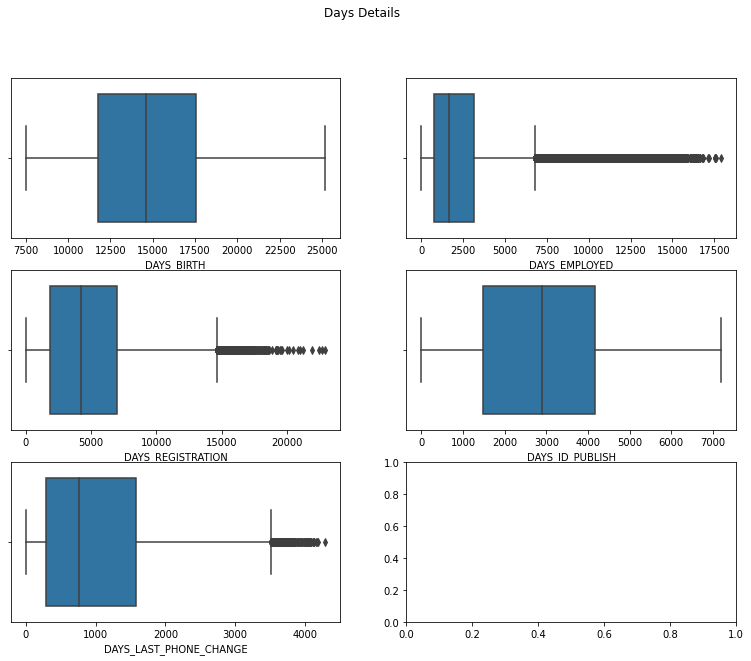

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  251015.000000  251015.000000      251015.000000    251015.000000   
mean    14770.686748    2384.437233        4634.882581      2801.025285   
std      3661.231954    2338.700721        3251.920099      1515.101837   
min      7489.000000       0.000000           0.000000         0.000000   
25%     11777.000000     767.000000        1845.000000      1488.000000   
50%     14574.000000    1648.000000        4265.000000      2887.000000   
75%     17564.000000    3175.000000        6950.500000      4177.000000   
max     25200.000000   17912.000000       22928.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           251015.000000  
mean               971.812286  
std                827.659777  
min                  0.000000  
25%                288.000000  
50%                764.000000  
75%               1579.000000  
max               4292.000000

In [98]:

fig, axes=plt.subplots(3,2, figsize=(13,10))
fig.suptitle('Days Details')

sns.boxplot(ax=axes[0,0],x='DAYS_BIRTH',data=new_loan)
sns.boxplot(ax=axes[0,1],x='DAYS_EMPLOYED',data=new_loan)
sns.boxplot(ax=axes[1,0],x='DAYS_REGISTRATION',data=new_loan)
sns.boxplot(ax=axes[1,1],x='DAYS_ID_PUBLISH',data=new_loan)
sns.boxplot(ax=axes[2,0],x='DAYS_LAST_PHONE_CHANGE',data=new_loan)
plt.show()

#Use Describe on outlier
new_loan[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

### Identifing Outliers DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH

1. DAYS_BIRTH: No outliers as There are no points outside the upper fence we see 50% is close to mean
2. DAYS_EMPLOYED: We have outliers 
3. DAYS_REGISTRATION: We have outlers, summary : Huge difference between 75% and max
4. DAYS_ID_PUBLISH : No ouliers, mean is close to 50% 
5. DAYS_LAST_PHONE_CHANGE: We have outlers points outside upper fence, summary : mean and 50% difference 
______________________________________________________________________________________________________________

Technique : We do not need to Drop all outliers as it might impact our analysis. We can use impute techniches.
Use Mean : If outlier is not very far from fence 
Use Median : If outlier is far from fence 


In [99]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251015 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251015 non-null  int64  
 1   TARGET                       251015 non-null  int64  
 2   NAME_CONTRACT_TYPE           251015 non-null  object 
 3   CODE_GENDER                  251015 non-null  object 
 4   FLAG_OWN_CAR                 251015 non-null  object 
 5   FLAG_OWN_REALTY              251015 non-null  object 
 6   AMT_INCOME_TOTAL             251015 non-null  float64
 7   AMT_CREDIT                   251015 non-null  float64
 8   AMT_ANNUITY                  251015 non-null  float64
 9   AMT_GOODS_PRICE              251015 non-null  float64
 10  NAME_INCOME_TYPE             251015 non-null  object 
 11  NAME_EDUCATION_TYPE          251015 non-null  object 
 12  NAME_FAMILY_STATUS           251015 non-null  object 
 13 

### 3 : Outliers in OBS_30_CNT_SOCIAL_CIRCLE ,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE ,DEF_60_CNT_SOCIAL_CIRCLE

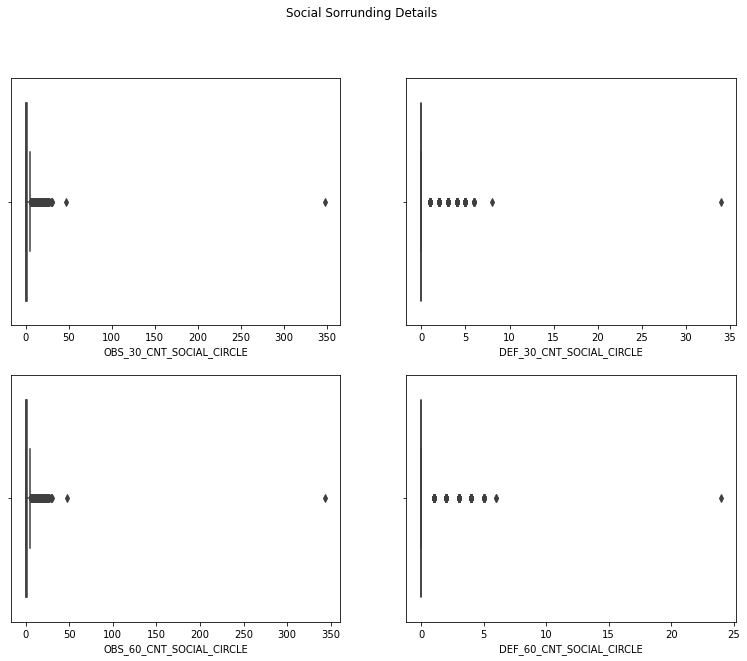

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             251015.000000             251015.000000   
mean                   1.415915                  0.139936   
std                    2.400095                  0.441890   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             251015.000000             251015.000000  
mean                   1.398857                  0.097636  
std                    2.378595                  0.358034  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [327]:
fig, axes=plt.subplots(2,2, figsize=(13,10))
fig.suptitle('Social Sorrunding Details')

sns.boxplot(ax=axes[0,0],x='OBS_30_CNT_SOCIAL_CIRCLE',data=new_loan)
sns.boxplot(ax=axes[0,1],x='DEF_30_CNT_SOCIAL_CIRCLE',data=new_loan)
sns.boxplot(ax=axes[1,0],x='OBS_60_CNT_SOCIAL_CIRCLE',data=new_loan)
sns.boxplot(ax=axes[1,1],x='DEF_60_CNT_SOCIAL_CIRCLE',data=new_loan)

plt.show()

#Use Describe on outlier
new_loan[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

##### from above plot :Indetifying Outliers : for all columns the box is very narrow and there are points outside upper fence

In [102]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251015 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251015 non-null  int64  
 1   TARGET                       251015 non-null  int64  
 2   NAME_CONTRACT_TYPE           251015 non-null  object 
 3   CODE_GENDER                  251015 non-null  object 
 4   FLAG_OWN_CAR                 251015 non-null  object 
 5   FLAG_OWN_REALTY              251015 non-null  object 
 6   AMT_INCOME_TOTAL             251015 non-null  float64
 7   AMT_CREDIT                   251015 non-null  float64
 8   AMT_ANNUITY                  251015 non-null  float64
 9   AMT_GOODS_PRICE              251015 non-null  float64
 10  NAME_INCOME_TYPE             251015 non-null  object 
 11  NAME_EDUCATION_TYPE          251015 non-null  object 
 12  NAME_FAMILY_STATUS           251015 non-null  object 
 13 

### 4: Outlier in REGION_POPULATION_RELATIVE and observed few points outside upper outlier.

count    251015.000000
mean          0.020876
std           0.013855
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

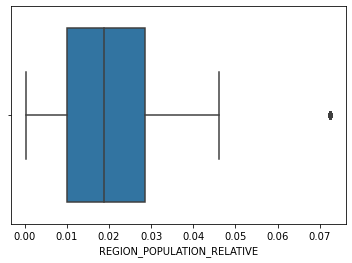

In [330]:

sns.boxplot(new_loan['REGION_POPULATION_RELATIVE'])
new_loan['REGION_POPULATION_RELATIVE'].describe()

# We can identify these outlier using Interquartile method and treat outliers:
#1. Impute it using mean/median
#2. Drop it if it is very far from fence then we can drop it -occured due to error


### 5: Outlier in CNT_FAM_MEMBERS and observed outlier

count    251015.000000
mean          2.252957
std           0.942062
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

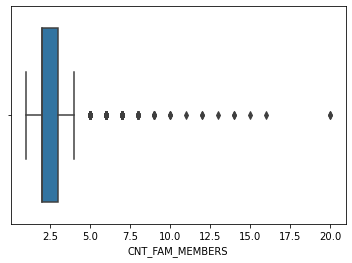

In [332]:

sns.boxplot(new_loan['CNT_FAM_MEMBERS'])
new_loan['CNT_FAM_MEMBERS'].describe()

# We can identify these outlier using Interquartile method and treat outliers:
#-> we should remove outlier as as it affect the mean

#1. Impute it with mean and median 
#not dropping as it is evenly distrbuted after fence 

### Subtask 7:  Binning 

In [338]:
#Perform bining on AMT_INCOME_TOTAL  as no inference from the data
values= [0,100000,200000,300000,400000,500000,600000,700000,1000000000000000]
Range=['Below 100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','Above 700000']

new_loan['AMT_Bin_Incometotal']=pd.cut(new_loan['AMT_INCOME_TOTAL'],bins=values,labels=Range)



In [339]:
#Perform bining on AMT_CREDIT  as no inference from the data
values= [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1000000000000000]
Range=['Below 200000','200000-400000','400000-600000','600000-800000','800000-1000000','1000000-1200000','1200000-1400000','1400000-1600000','Above 1600000']

new_loan['AMT_Bin_TotalCREDIT']=pd.cut(new_loan['AMT_CREDIT'],bins=values,labels=Range)

In [340]:
#Perform bining on AMT_ANNUITY  as no inference from the data
values= [0,10000,20000,30000,40000,50000,100000000000]
Range=['Below 10000','10000-20000','20000-30000','30000-40000','40000-50000','Above 50000']

new_loan['AMT_Bin_ANNUITY']=pd.cut(new_loan['AMT_ANNUITY'],bins=values,labels=Range)

In [341]:
#Perform bining on AMT_GOODS_PRICE  as no inference from the data
values= [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1000000000000000]
Range=['Below 200000','200000-400000','400000-600000','600000-800000','800000-1000000','1000000-1200000','1200000-1400000','1400000-1600000','Above 1600000']

new_loan['AMT_Bin_GOODS_PRICE']=pd.cut(new_loan['AMT_GOODS_PRICE'],bins=values,labels=Range)

In [342]:
new_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               3648             2120        Laborers                1   
1               1186              291      Core staff                2   
2               4260             2531        Laborers                1   
3               9833             2437        Laborers                2   
4               4311             3458      Core staff                1   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                    2                           2  Business Entity Type 3   
1                    1                           1                  School   
2                    2                           2              Government   
3                    2                           2  Business Entity Type 3   
4                    2                           2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                         2   
1      0.622246           NaN                         1   
2      0.555912      0.729567                         0   
3      0.650442           NaN                         2   
4      0.322738           NaN                         0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         0                         1   
2                         0                         0   
3                         0                         2   
4                         0                         0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE AMT_Bin_Incometotal  \
0                         2                    1134       200000-300000   
1                         0                     828       200000-300000   
2                         0                     815        Below 100000   
3                         0                     617       100000-200000   
4                         0                    1106       100000-200000   

  AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  
0       400000-600000     20000-30000       200000-4

In [343]:
# We can also perform BINNING ON DAYS_BIRTH :
new_loan['AGE']=round(new_loan['DAYS_BIRTH']/365,0).astype('int')
new_loan.head()

values= [0,30,60,1000]
Range=['Young','Adult','Senior']

new_loan['AGE_BIN']=pd.cut(new_loan['AGE'],bins=values,labels=Range)


# People with Age less than 30 : Young 
# People with Age less than 60 : Adult 
# People with Age less than 30 : Senior 

In [344]:
new_loan.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               3648             2120        Laborers                1   
1               1186              291      Core staff                2   
2               4260             2531        Laborers                1   
3               9833             2437        Laborers                2   
4               4311             3458      Core staff                1   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                    2                           2  Business Entity Type 3   
1                    1                           1                  School   
2                    2                           2              Government   
3                    2                           2  Business Entity Type 3   
4                    2                           2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                         2   
1      0.622246           NaN                         1   
2      0.555912      0.729567                         0   
3      0.650442           NaN                         2   
4      0.322738           NaN                         0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         0                         1   
2                         0                         0   
3                         0                         2   
4                         0                         0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE AMT_Bin_Incometotal  \
0                         2                    1134       200000-300000   
1                         0                     828       200000-300000   
2                         0                     815        Below 100000   
3                         0                     617       100000-200000   
4                         0                    1106       100000-200000   

  AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  AGE AGE_BIN  
0       400000-600000     20000-30000  

# <font color=blue> OBJECTIVE : Is to study the features and study patterns for the customer will likely to be the defaulters</font>

## DATA ANALYSIS :

##### Task 1: UNIVARIANT ANALYSIS
1. Categorical Variable 
2. Continuous Features

In [345]:
loan_nondefault = new_loan[new_loan['TARGET']==0]
loan_default = new_loan[new_loan['TARGET']==1]

In [346]:
loan_nondefault.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   
5               Y           99000.0    490495.5      27517.5         454500.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   
5    State servant  Secondary / secondary special               Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   
5  House / apartment                    0.035792       16941           1588   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1               1186              291      Core staff                2   
2               4260             2531        Laborers                1   
3               9833             2437        Laborers                2   
4               4311             3458      Core staff                1   
5               4970              477        Laborers                2   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
1                    1                           1                  School   
2                    2                           2              Government   
3                    2                           2  Business Entity Type 3   
4                    2                           2                Religion   
5                    2                           2                   Other   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
1      0.622246           NaN                         1   
2      0.555912      0.729567                         0   
3      0.650442           NaN                         2   
4      0.322738           NaN                         0   
5      0.354225      0.621226                         0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
1                         0                         1   
2                         0                         0   
3                         0                         2   
4                         0                         0   
5                         0                         0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE AMT_Bin_Incometotal  \
1                         0                     828       200000-300000   
2                         0                     815        Below 100000   
3                         0                     617       100000-200000   
4                         0                    1106       100000-200000   
5                         0                    2536        Below 100000   

  AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  AGE AGE_BIN  
1     1200000-1400000     30000-40000  

In [347]:
loan_default.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
94      100112       1         Cash loans           M            Y   

   FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y          202500.0    406597.5      24700.5   
26               Y          112500.0    979992.0      27076.5   
40               Y          202500.0   1193580.0      35028.0   
42               N          135000.0    288873.0      16258.5   
94               Y          315000.0    953460.0      64107.0   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
94         900000.0  Commercial associate              Incomplete higher   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
94  Single / not married       With parents                    0.030755   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         9461            637               3648             2120   
26       18724           2628               6573             1827   
40       17482           1262               1182             1029   
42       13384           3597                 45             4409   
94       10199           2015               4802             1038   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0         Laborers                1                    2   
26   Cooking staff                1                    3   
40        Laborers                2                    2   
42     Sales staff                2                    3   
94        Laborers                1                    2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                            2  Business Entity Type 3      0.262949   
26                           2  Business Entity Type 3      0.548477   
40                           2  Business Entity Type 3      0.306841   
42                           3           Self-employed      0.674203   
94                           2        Industry: type 4      0.432340   

    EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0       0.139376                         2                         2   
26      0.190706                        10                         1   
40      0.320163                         0                         0   
42      0.399676                         1                         0   
94      0.077499                         0                         0   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                          2                         2   
26                        10                         0   
40                         0                         0   
42                         1                         0   
94                         0                         0   

    DAYS_LAST_PHONE_CHANGE AMT_Bin_Incometotal AMT_Bin_TotalCREDIT  \
0                     1134       200000-300000       400000-600000   
26                     161       100000-200000      800000-1000000   
40                    1075       200000-300000     1000000-1200000   
42           

#### 1. Comparision of Gender in loan_nondefault vs loan_default

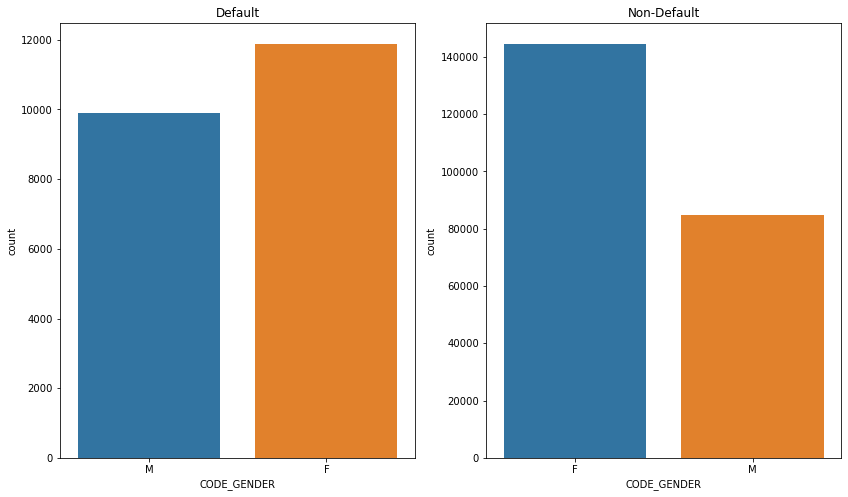

In [348]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(data=loan_default,x='CODE_GENDER',label='Default')
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(data=loan_nondefault,x='CODE_GENDER',Label='Non Default')


# From the Defalt and Non-Default graph we suspect that Males are more likely to be default than Females 

### 2. Compare and ananlyze if the person owns car in loan_nondefault vs loan_default

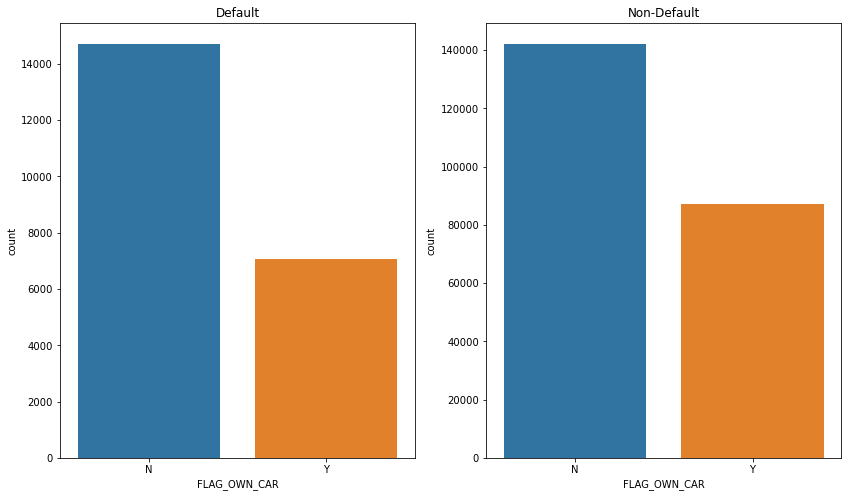

In [349]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(data=loan_default,x='FLAG_OWN_CAR',label='Default')
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(data=loan_nondefault,x='FLAG_OWN_CAR',Label='Non Default')


# From the Defalt we see that people who does not have a car is more likely to be defaulty however when we compare the number of 
#people who does not have a car in NON-Deafult graph, It is observed to be much higher in number than non-car default people.
#Hence we suspect that non-car people are not likeley to be defeaultand people with car are likely to be deafulty.

### 3. Compare and ananlyze FLAG_OWN_REALTY in loan_nondefault vs loan_default

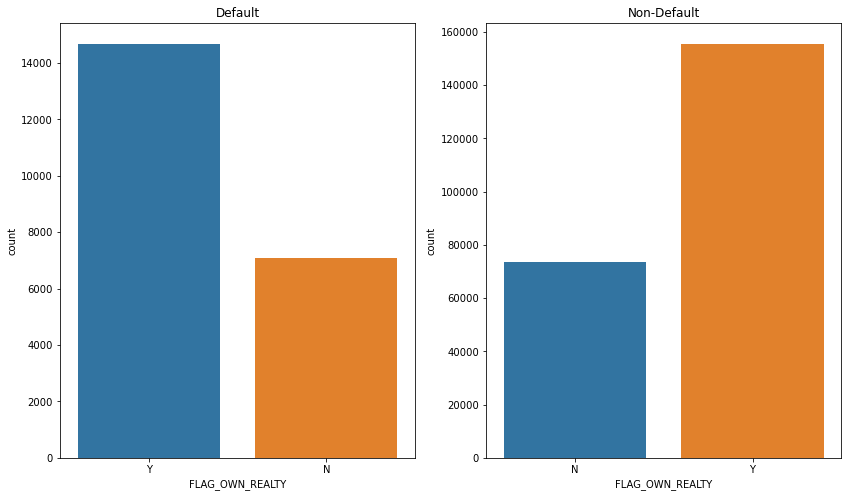

In [350]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(data=loan_default,x='FLAG_OWN_REALTY',label='Default')
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(data=loan_nondefault,x='FLAG_OWN_REALTY',Label='Non Default')

#analysis : Person who does not have a house are more likely to deafulty

### 4.Compare and ananlyze NAME_CONTRACT_TYPE in loan_nondefault vs loan_default 

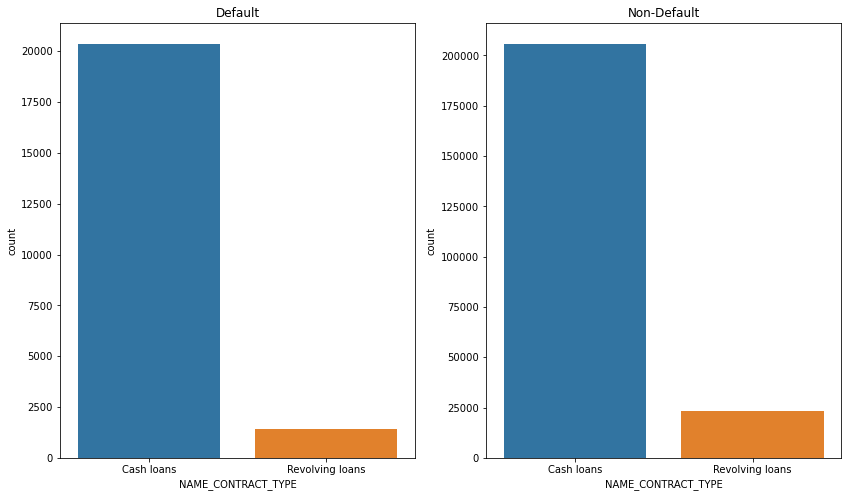

In [351]:

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(data=loan_default,x='NAME_CONTRACT_TYPE',label='Default')
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(data=loan_nondefault,x='NAME_CONTRACT_TYPE',Label='Non Default')

#analysis : People who are more likely to Revlving loans are Defaulty 

### 5.Compare and ananlyze NAME_INCOME_TYPE in loan_nondefault vs loan_default 

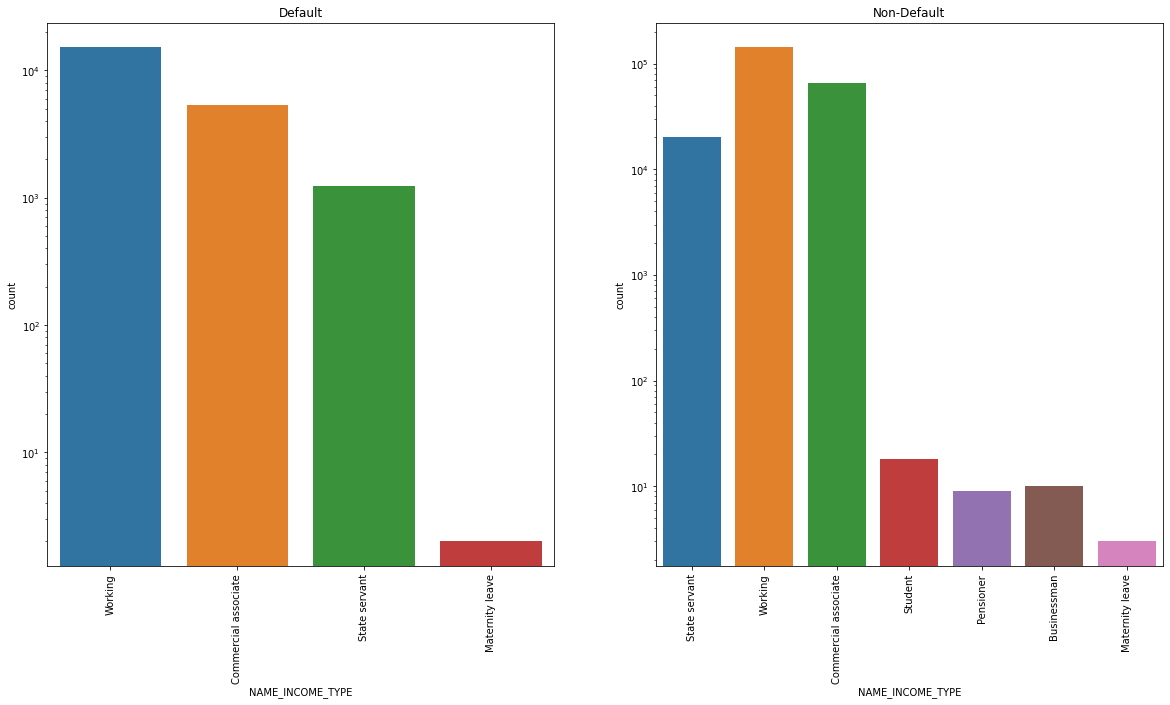

In [352]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=90)
sns.countplot(data=loan_default,x='NAME_INCOME_TYPE',label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=90)
sns.countplot(data=loan_nondefault,x='NAME_INCOME_TYPE',Label='Non Default').set_yscale('log')

#analysis :1. People with income type Working, Commercial Associate, State Servent are more likely to Default. In this Default -Working has 
#highest number of default.
#2.Student, Pensioner, Businessman are not present in Default so people with income type Student, Pensioner, Businessman are less 
#likely to be default

#3. In Non-Default, People with Income type working is more likely to be non-default

### 6.Compare and ananlyze of NAME_EDUCATION_TYPE in loan_nondefault vs loan_default 

Secondary / secondary special    172676
Higher education                  66218
Incomplete higher                  9702
Lower secondary                    2281
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64

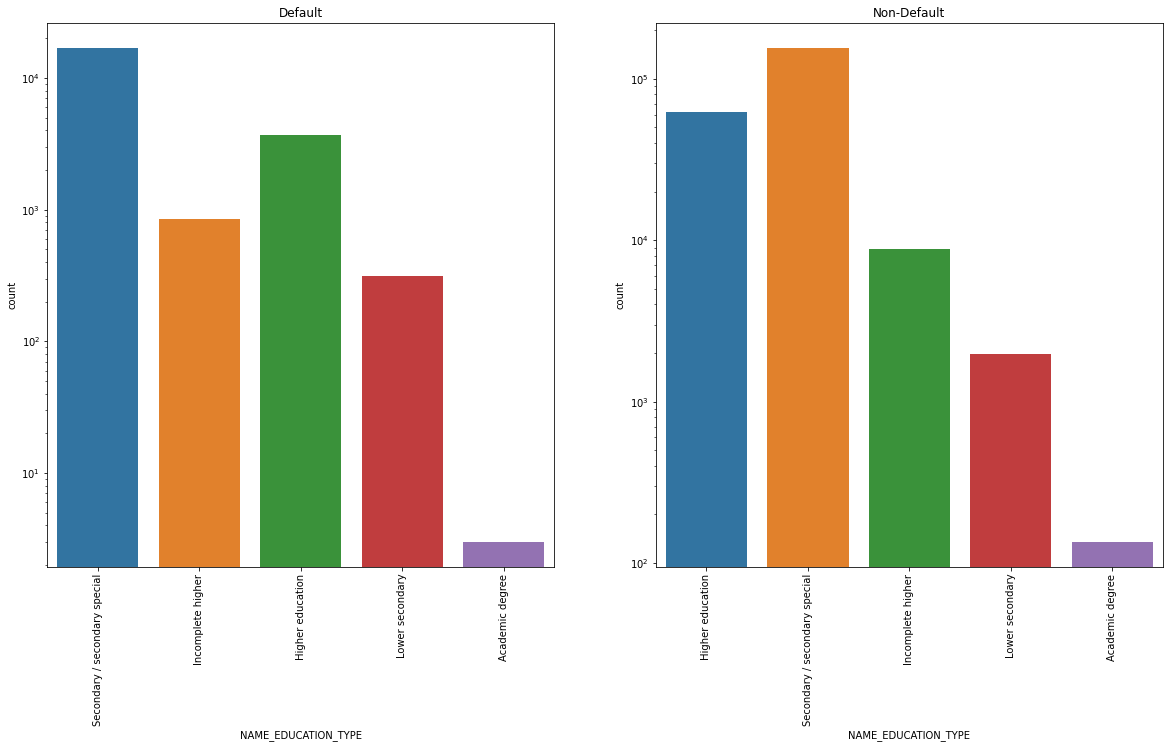

In [353]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=90)
sns.countplot(data=loan_default,x='NAME_EDUCATION_TYPE',label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=90)
sns.countplot(data=loan_nondefault,x='NAME_EDUCATION_TYPE',Label='Non Default').set_yscale('log')

new_loan['NAME_EDUCATION_TYPE'].value_counts()
#Analysis : 1. People with Academic Education is less likely to be defaulty even though we have less Academic degree in dataset but they are more in non-deafult
#2.people with Secondary / secondary special education is more likely to be defaulty 


### 7.Compare and ananlyze of NAME_FAMILY_STATUS in loan_nondefault vs loan_default 

Married                 163256
Single / not married     39070
Civil marriage           26086
Separated                15928
Widow                     6675
Name: NAME_FAMILY_STATUS, dtype: int64

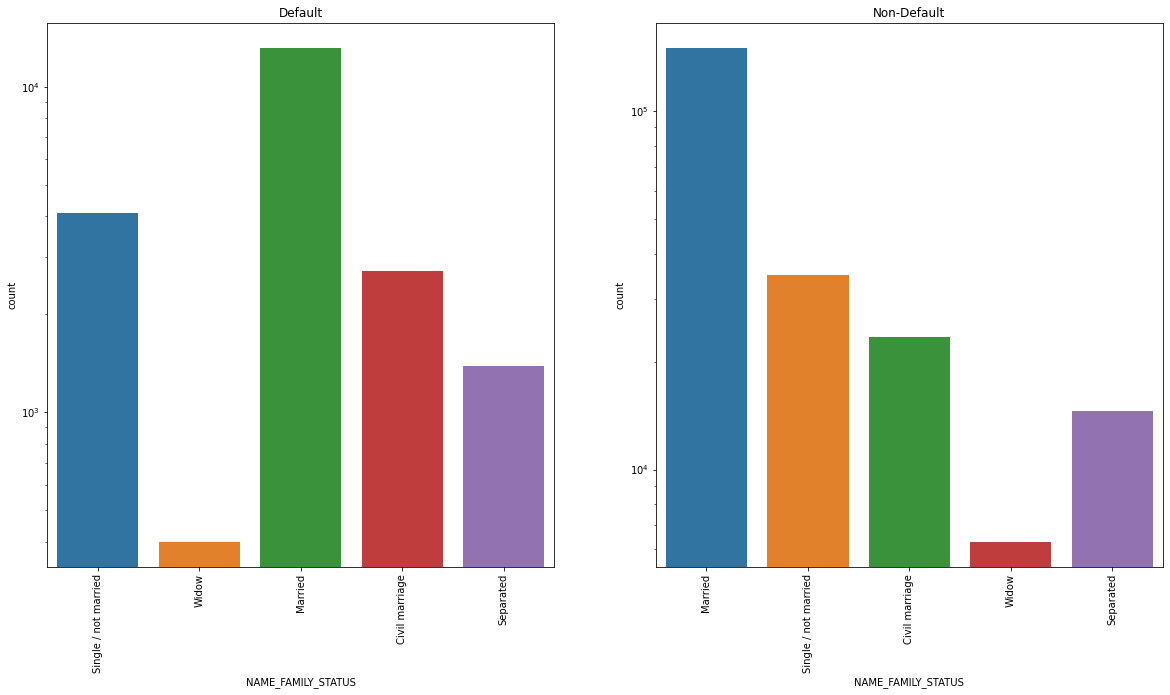

In [354]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=90)
sns.countplot(data=loan_default,x='NAME_FAMILY_STATUS',label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=90)
sns.countplot(data=loan_nondefault,x='NAME_FAMILY_STATUS',Label='Non Default').set_yscale('log')

new_loan['NAME_FAMILY_STATUS'].value_counts()
#Analysis : 1. People with family status window is less likely to be defaulty 
#2. People with Married has Highest rate of defaulty 


### 8.Compare and ananlyze of NAME_HOUSING_TYPE in loan_nondefault vs loan_default 

House / apartment      219506
With parents            14562
Municipal apartment      9008
Rented apartment         4650
Office apartment         2291
Co-op apartment           998
Name: NAME_HOUSING_TYPE, dtype: int64

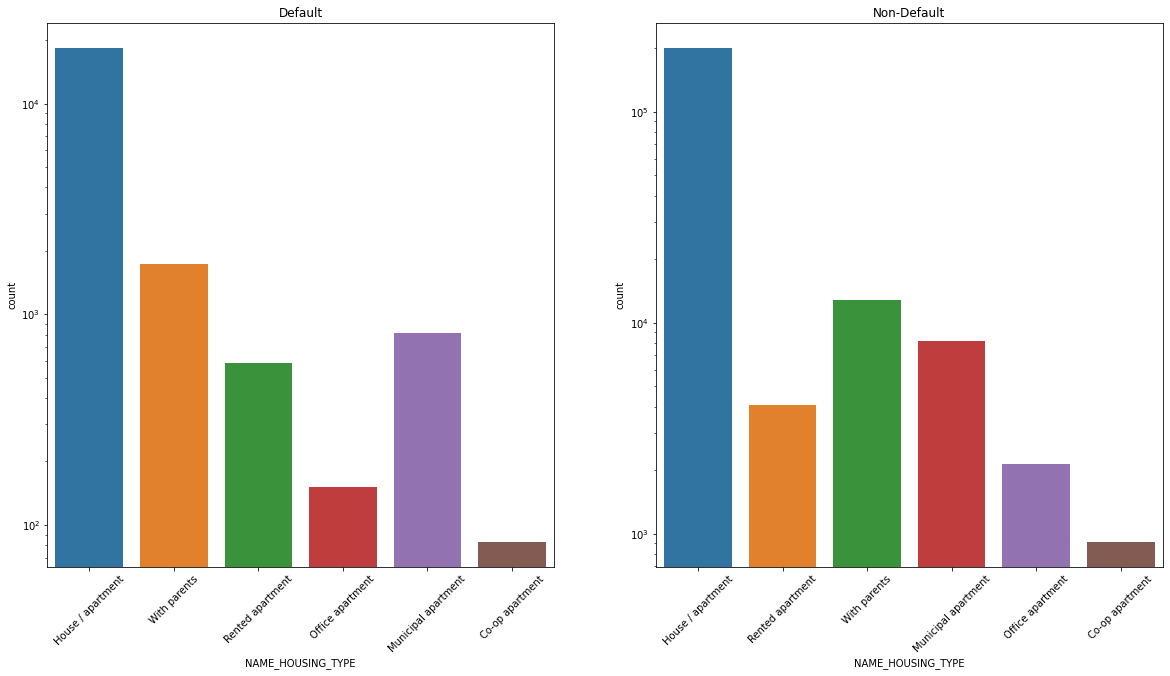

In [355]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=45)
sns.countplot(data=loan_default,x='NAME_HOUSING_TYPE',label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=45)
sns.countplot(data=loan_nondefault,x='NAME_HOUSING_TYPE',Label='Non Default').set_yscale('log')

new_loan['NAME_HOUSING_TYPE'].value_counts()
#Analysis : 1. People with HOUSING_TYPE House apartment is more likely to be defaulty 
#2.People with HOUSING_TYPE Co-op apartment is less likely to be defaulty 
# Poeple living with parents are more likely to be non deafulty 

### 9.Compare and ananlyze of REGION_RATING_CLIENT in loan_nondefault vs loan_default 

2    184637
3     38860
1     27518
Name: REGION_RATING_CLIENT, dtype: int64

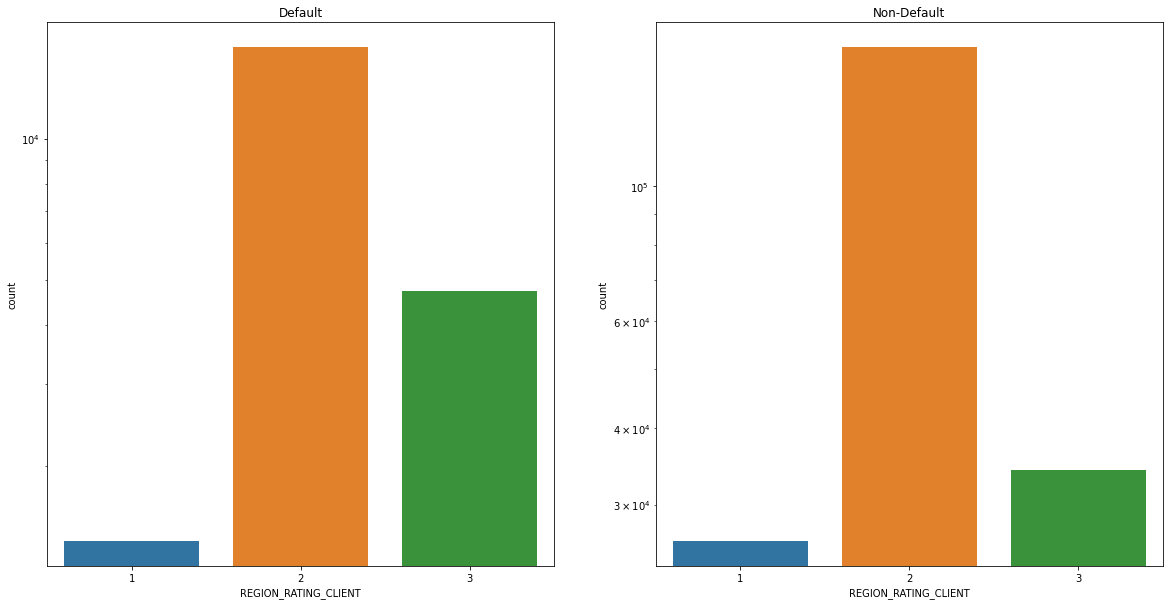

In [356]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
#plt.xticks(rotation=90)
sns.countplot(data=loan_default,x='REGION_RATING_CLIENT',label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
#plt.xticks(rotation=90)
sns.countplot(data=loan_nondefault,x='REGION_RATING_CLIENT',Label='Non Default').set_yscale('log')

new_loan['REGION_RATING_CLIENT'].value_counts()
#Analysis : 1. People living in value with 2 has higher rate of defaulty 

### 10.Compare and ananlyze AGE in loan_nondefault vs loan_default 

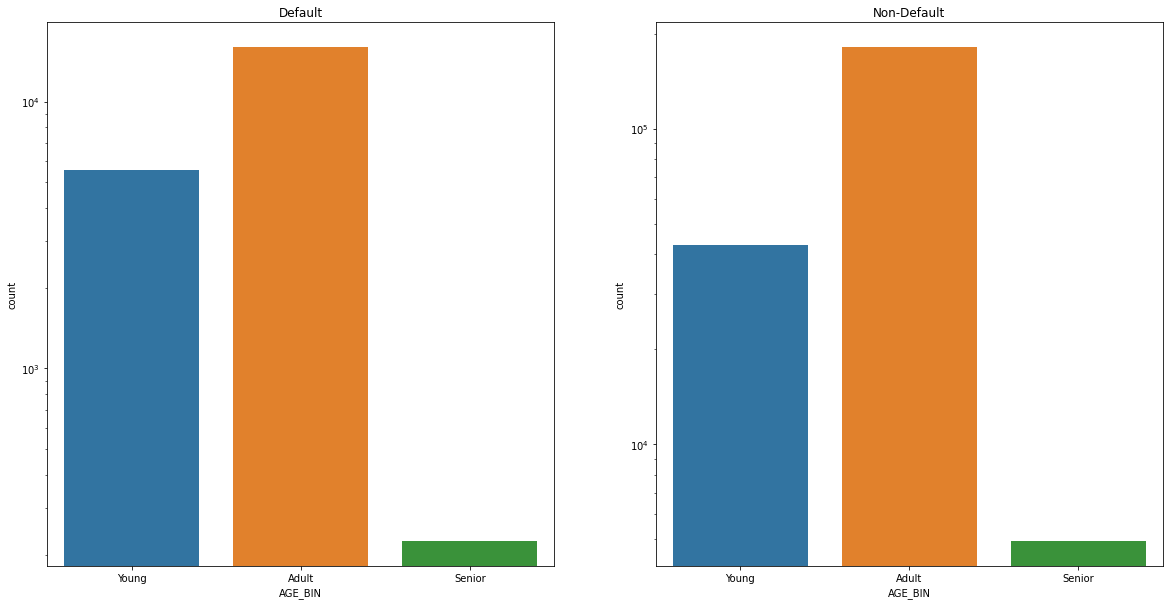

In [357]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
#plt.xticks(rotation=90)
sns.countplot(data=loan_default,x='AGE_BIN',label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
#plt.xticks(rotation=90)
sns.countplot(data=loan_nondefault,x='AGE_BIN',Label='Non Default').set_yscale('log')

#INFERENCE : 1. People with AGE group "Adult" are more likely to be defaulty 

### 11.Compare and ananlyze of Organization type in loan_nondefault vs loan_default 

57

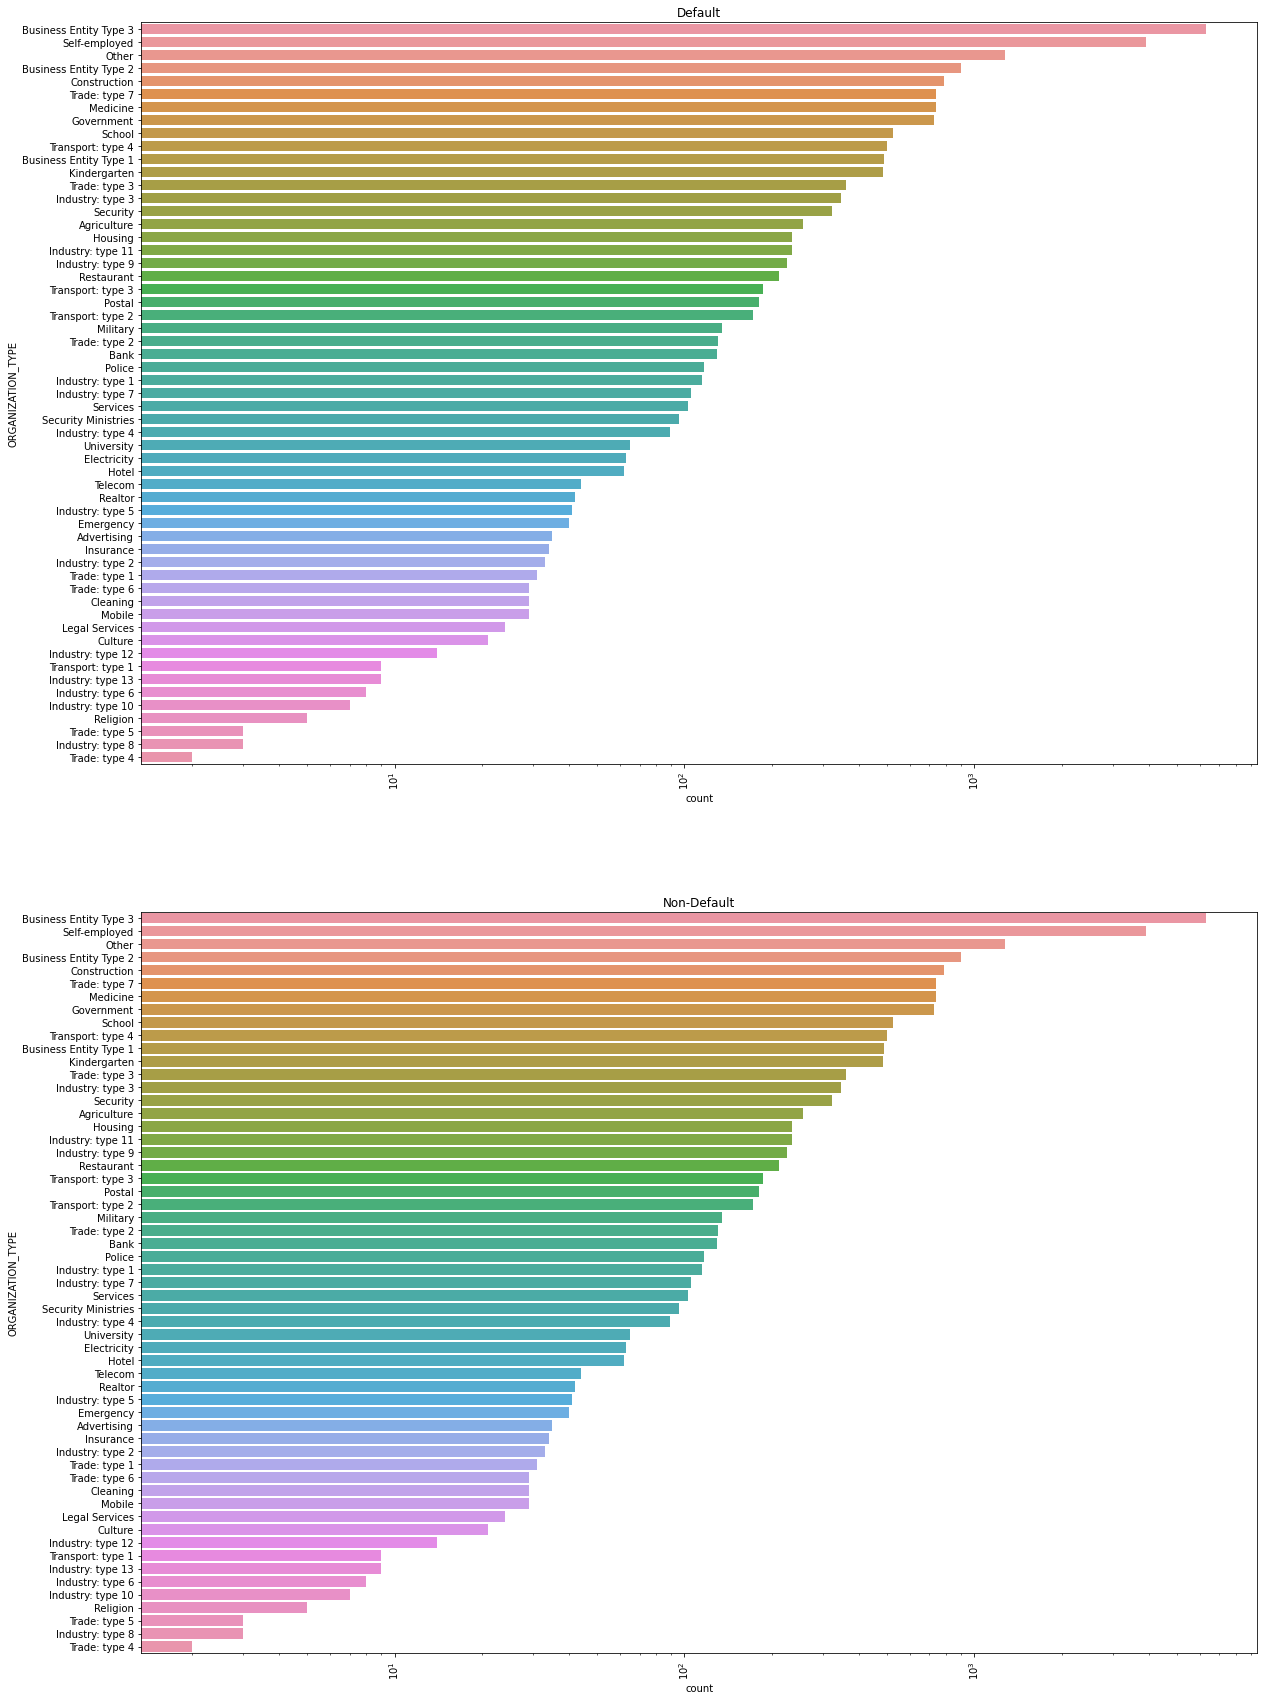

In [358]:
plt.figure(figsize=(20,30))
plt.subplot(2,1,1)
plt.title('Default')
plt.xticks(rotation=90)
sns.countplot(data = loan_default, y= 'ORGANIZATION_TYPE',order=loan_default['ORGANIZATION_TYPE'].value_counts().index).set_xscale('log')

plt.subplot(2,1,2)
plt.title('Non-Default')
plt.xticks(rotation=90)
sns.countplot(data = loan_default, y= 'ORGANIZATION_TYPE',order=loan_default['ORGANIZATION_TYPE'].value_counts().index).set_xscale('log')

len(new_loan['ORGANIZATION_TYPE'].value_counts())

# INference : There are a lot number of organisation type and Business entity type 3 are more likely to be defaulty 

## Univariant Feature analysis for Continuous variable 

### 1.Comparision of AMT_INCOME_TOTAL in in loan_nondefault vs loan_default 

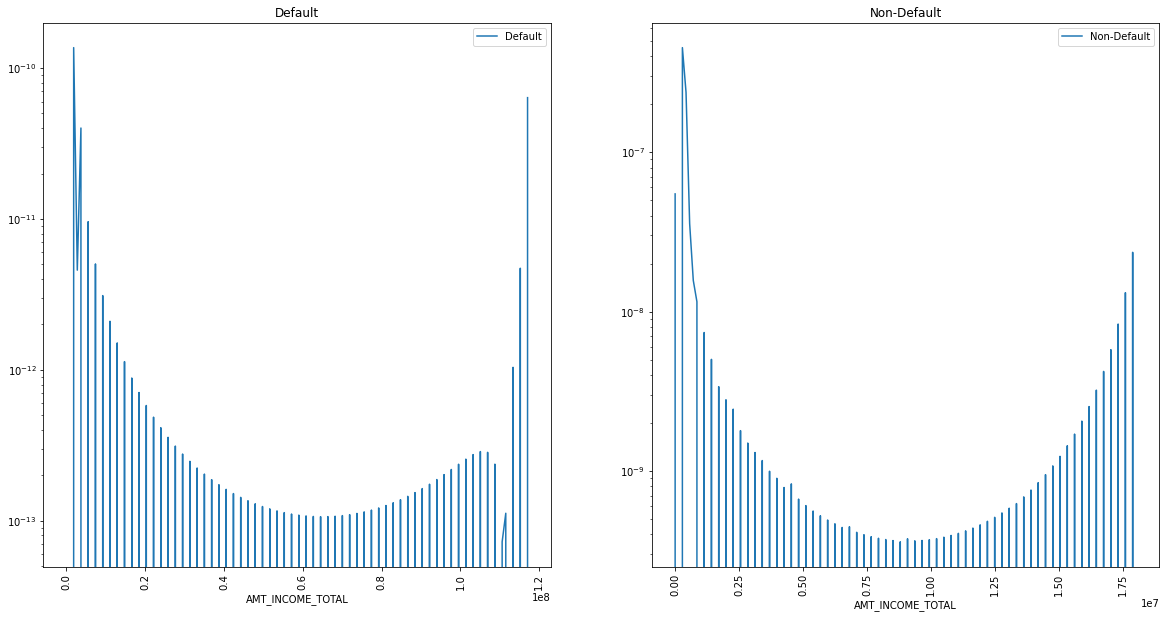

In [359]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=90)
sns.distplot(loan_default['AMT_INCOME_TOTAL'],hist=False,label='Default').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=90)
sns.distplot(loan_nondefault['AMT_INCOME_TOTAL'],hist=False,label='Non-Default').set_yscale('log')

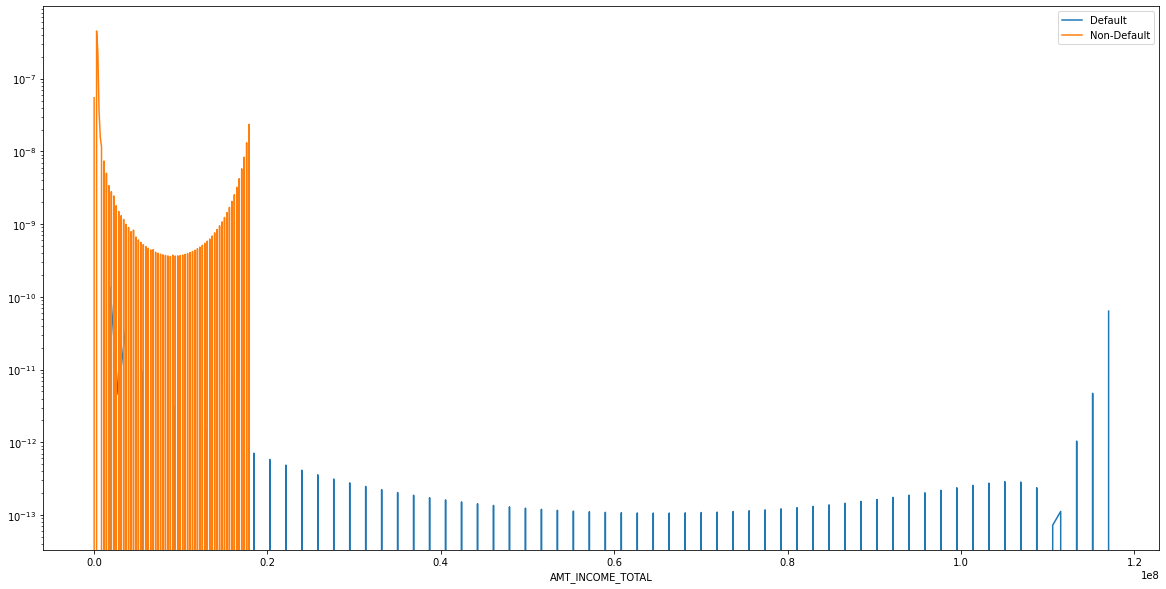

In [360]:
plt.figure(figsize=(20,10))

sns.distplot(loan_default['AMT_INCOME_TOTAL'],hist=False,label='Default').set_yscale('log')
sns.distplot(loan_nondefault['AMT_INCOME_TOTAL'],hist=False,label='Non-Default').set_yscale('log')

###### We are not getting a clear inference using the numver amount INcome so let's check on BIn-Amount income 

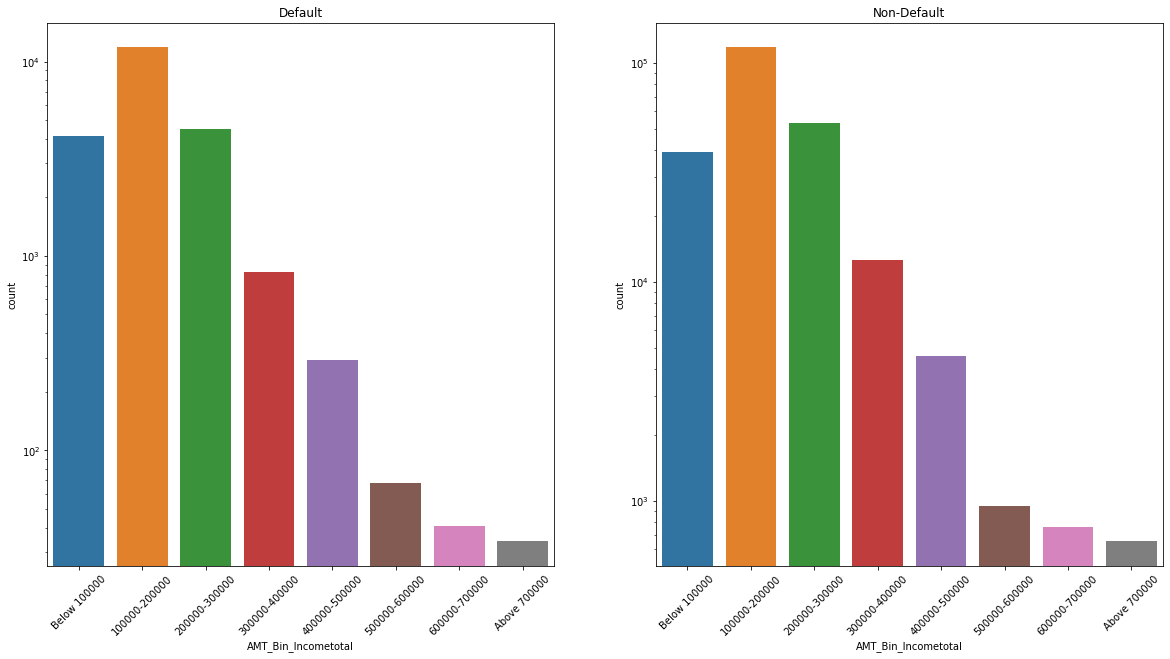

In [363]:
#sns.countplot(loan_default['AMT_Bin_Incometotal'],label='Default')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=45)
sns.countplot(loan_default['AMT_Bin_Incometotal'],label='Default(1)').set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=45)
sns.countplot(loan_nondefault['AMT_Bin_Incometotal'],label='Default(1)').set_yscale('log')


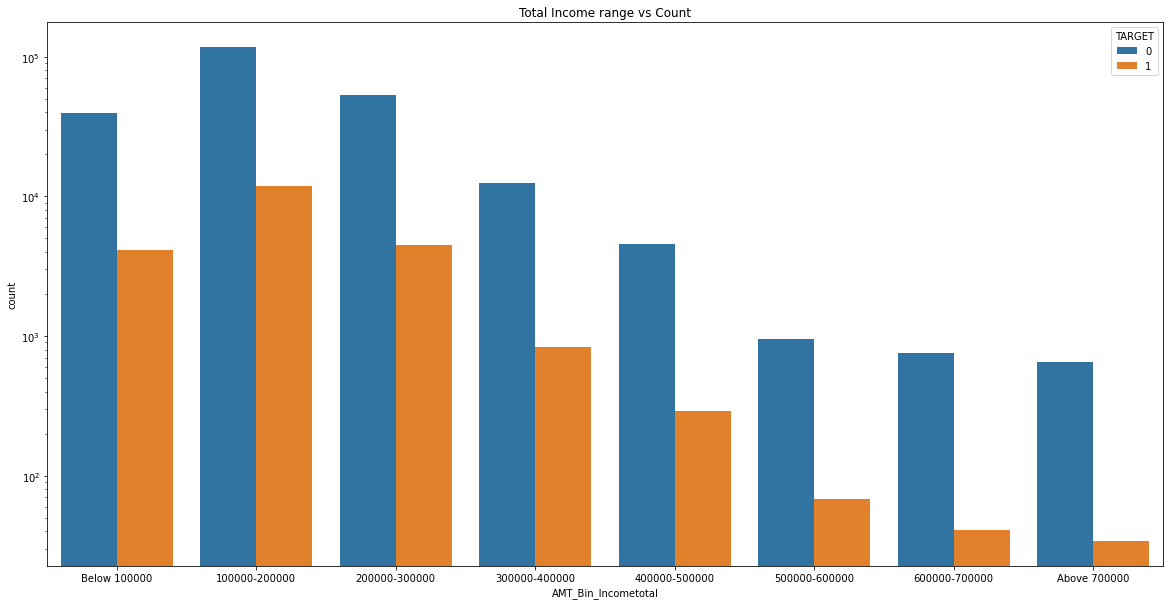

In [365]:

plt.figure(figsize=(20,10))
plt.title('Total Income range vs Count')
plt.yscale("log")
sns.countplot(x='AMT_Bin_Incometotal',data=new_loan,hue='TARGET')

#Inference : 1. people with total income range within 100000-200000 are more likely to be Defaulty or Non-Defaulty 
# 2. For Defaulty: Increase in Income rate decreases the number of defaulty people 
#3. poeple having Total income above 500000 are more likely to non defaulty as there are a lot number of non defaulty people in 
#this range as compare to defaulty people 

### 2. Comparision of AMT_CREDIT in Loan Target 0 or 1

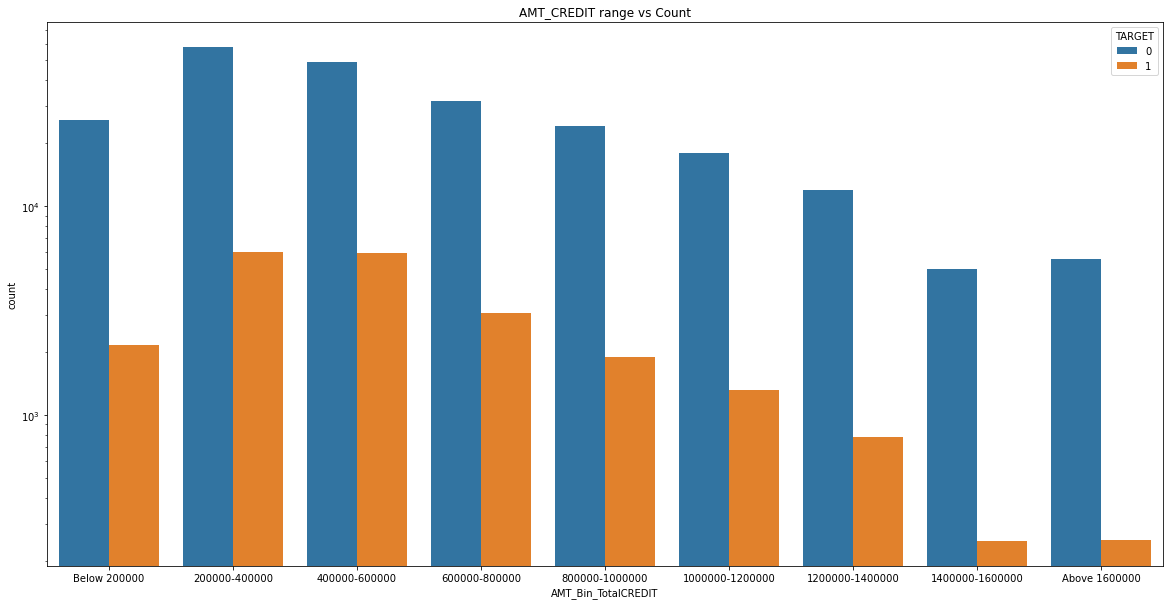

In [367]:
#Comparision of AMT_CREDIT in Loan Target 0 or 1
plt.figure(figsize=(20,10))
plt.title('AMT_CREDIT range vs Count')
plt.yscale("log")
sns.countplot(x='AMT_Bin_TotalCREDIT',data=new_loan,hue='TARGET')

#Inference : 
#1. Peple who has a credit amount below 200000 and above 1400000 are most likely to be non-defautly as we see there are a lot number of non defaulty people in 
#this range as compare to defaulty people 

#2. People with credit amount 2-4 and 4-6 (2-6) lakhs are similar rate of being defaulty.

### 3. Comparision of  AMT_ANNUITY  in Loan Target 0 or 1

<AxesSubplot:title={'center':'AMT_Bin_ANNUITY range vs Count'}, xlabel='AMT_Bin_ANNUITY', ylabel='count'>

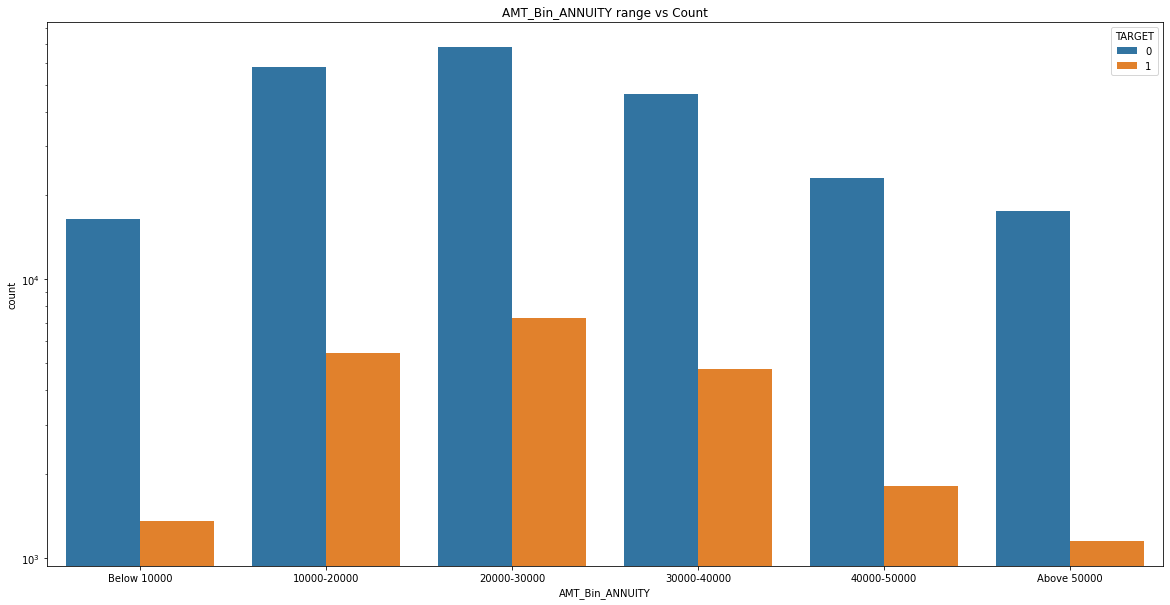

In [140]:
#Comparision of  AMT_ANNUITY  in Loan Target 0 or 1
plt.figure(figsize=(20,10))
plt.title('AMT_Bin_ANNUITY range vs Count')
plt.yscale("log")
sns.countplot(x='AMT_Bin_ANNUITY',data=new_loan,hue='TARGET')

#Inference : 
#1. Peple who has a Annutiy amount below 10000 and above 40000 are most likely to be non-defautly as we see there are a lot number of non defaulty people in 
#this range as compare to defaulty people 

#2. Equal percentage of Defaulty peple in rest of range(10000-40000)

### 4. Comparision of  AMT_GOODS_PRICE  in Loan Target 0 or 1

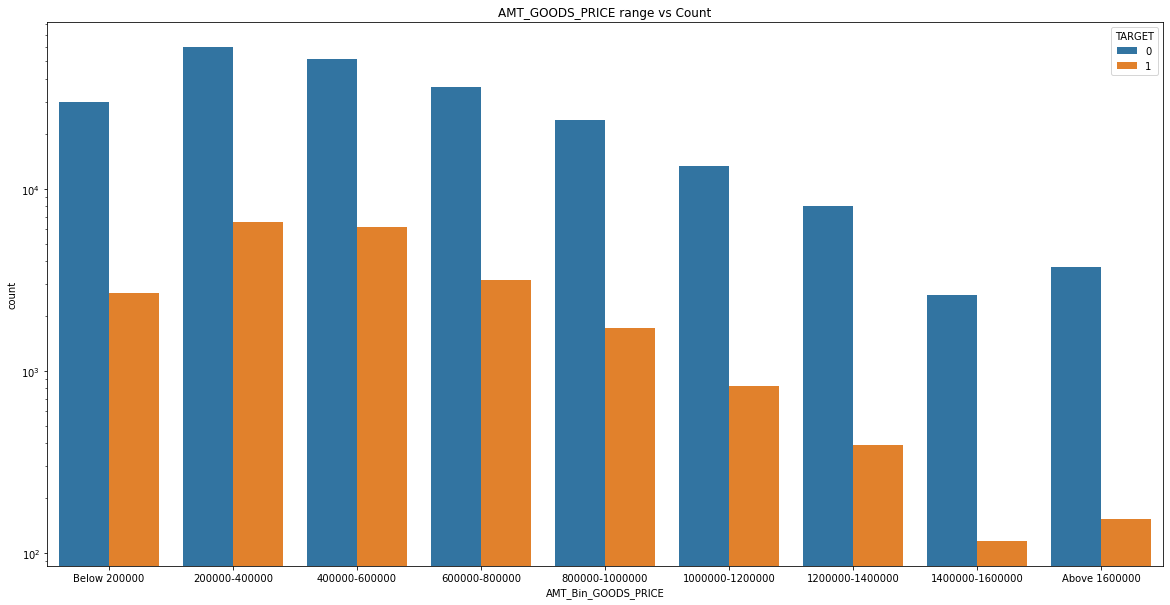

In [368]:
#Comparision of  AMT_GOODS_PRICE  in Loan Target 0 or 1
plt.figure(figsize=(20,10))
plt.title('AMT_GOODS_PRICE range vs Count')
plt.yscale("log")
sns.countplot(x='AMT_Bin_GOODS_PRICE',data=new_loan,hue='TARGET')

#Inference : 
#1. Peple who has a GOODS_PRICE amount between 2-6lakhs has the highes chance of being defaulty as the count 
#between deafulty-nondefaulty people is very less


#2. Peple who has a GOODS_PRICE amount above 12000000 are most likely to be non-defautly as we see there are a lot number of non defaulty people in 
#this range as compare to defaulty people 


### 5.Comparision DAYS_BIRTH in loan Defaulty 

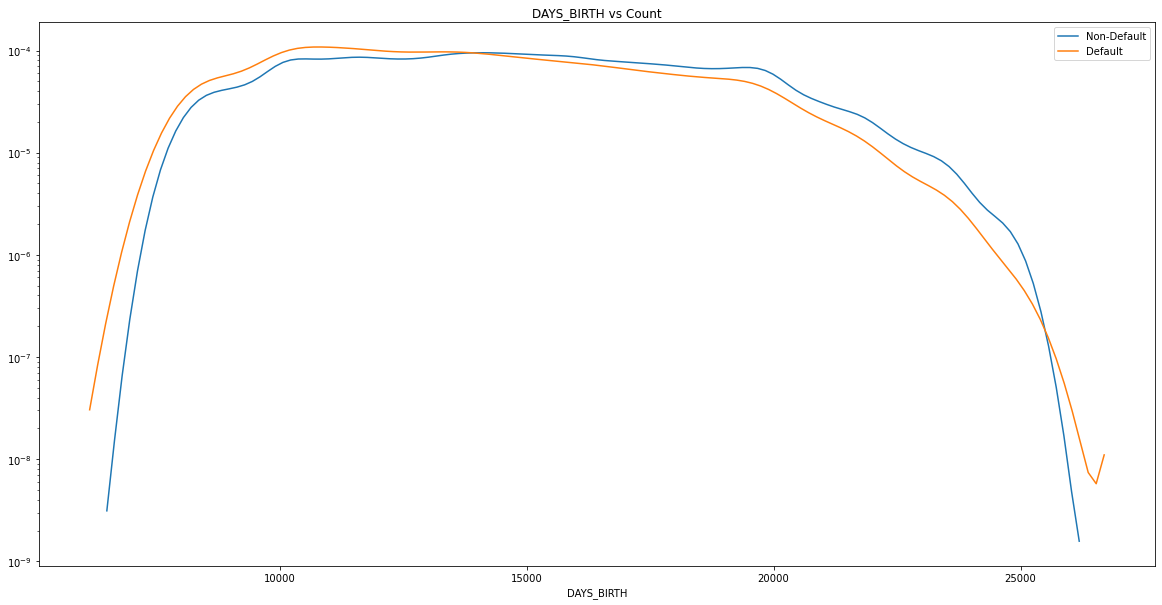

In [370]:
plt.figure(figsize=(20,10))
plt.title('DAYS_BIRTH vs Count')
sns.distplot(loan_nondefault['DAYS_BIRTH'],hist=False,label='Non-Default').set_yscale('log')
sns.distplot(loan_default['DAYS_BIRTH'],hist=False,label='Default').set_yscale('log')

# No inference from Distplot

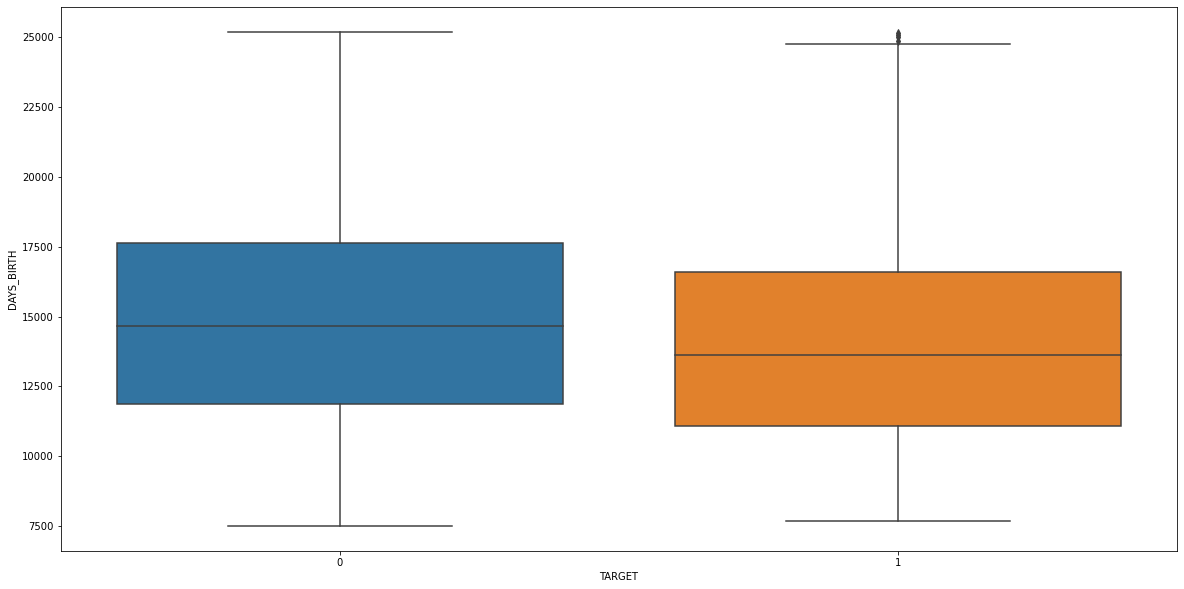

In [371]:
plt.figure(figsize=(20,10))
sns.boxplot(x="TARGET",y='DAYS_BIRTH',data=new_loan)

#Inference : Poeple with higher age are more likely to repay the loan amout 

#note :binning is not performed here as it is difficult to create age range (young,adult,child) form no of days

### 6. Comparision DAYS DAYS_EMPLOYED , REGISTRATION,ID_PUBLISH, LAST_PHONE_CHANGE in loan Defaulty 

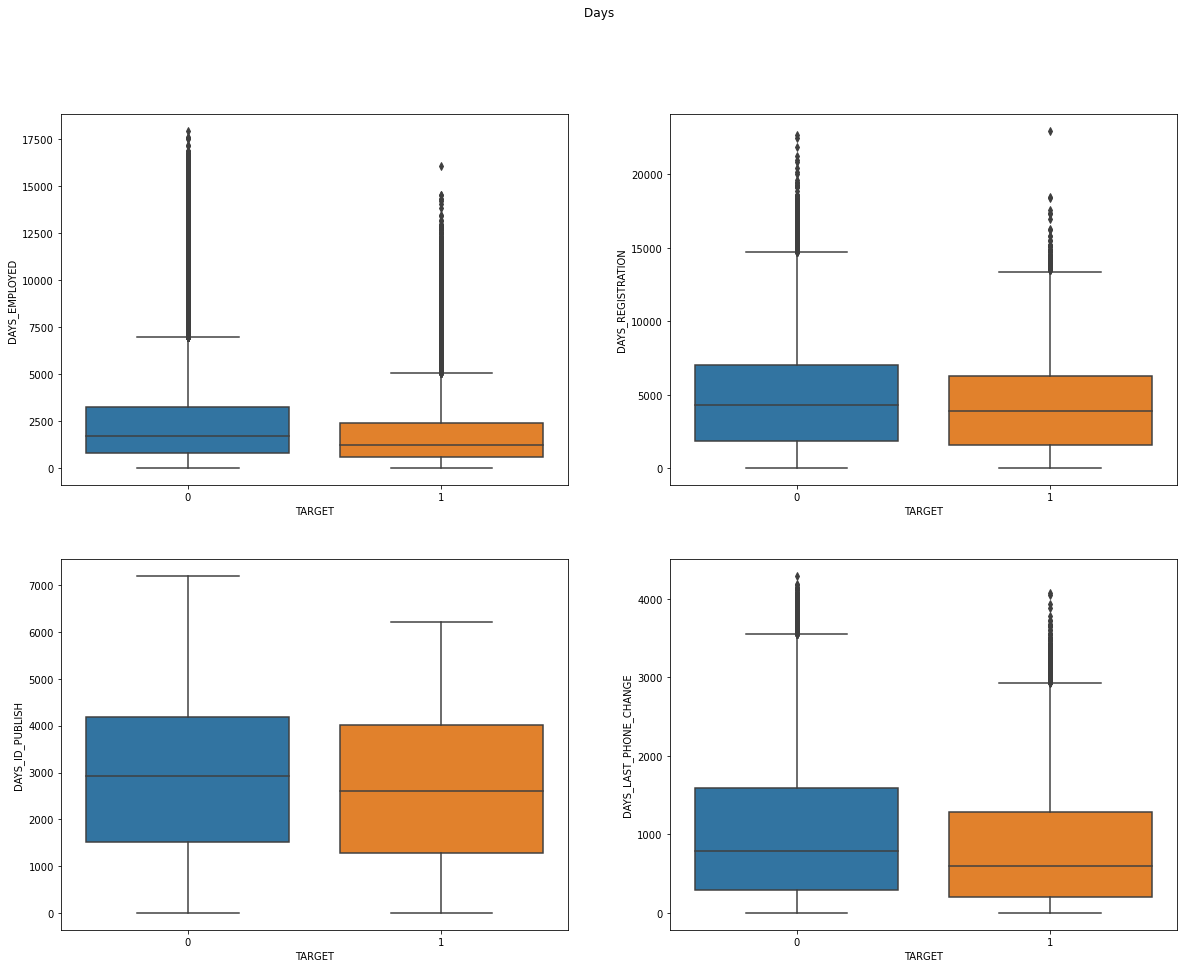

In [373]:
fig, axes=plt.subplots(2,2, figsize=(20,15))
fig.suptitle('Days ')

sns.boxplot(ax=axes[0,0],x="TARGET",y='DAYS_EMPLOYED',data=new_loan)
sns.boxplot(ax=axes[0,1],x="TARGET",y='DAYS_REGISTRATION',data=new_loan)
sns.boxplot(ax=axes[1,0],x="TARGET",y='DAYS_ID_PUBLISH',data=new_loan)
sns.boxplot(ax=axes[1,1],x="TARGET",y='DAYS_LAST_PHONE_CHANGE',data=new_loan)

plt.show()

#Inference : 

#1. Days Employed : People who are working for the longer time in the current position from the day of application is mostly 
#likely to repay the loan

#2. DAYS_ID_PUBLISH :People who change their Identity document close to the application date are 
#more likely to defaulty 


#3. DAYS_REGISTRATION : People who have long registration from the day of application is mostly 
#likely to repay the loan beacuse the median is slightly higher 

#4. DAYS_LAST_PHONE_CHANGE : People who has not changed their phone number close to application date are morely likely to
#repay loans and we see more number of non-defaulty people in range of 50-75%



### 7. Comparision of social surrounding of client in loan defaulty vs non-deafulty 

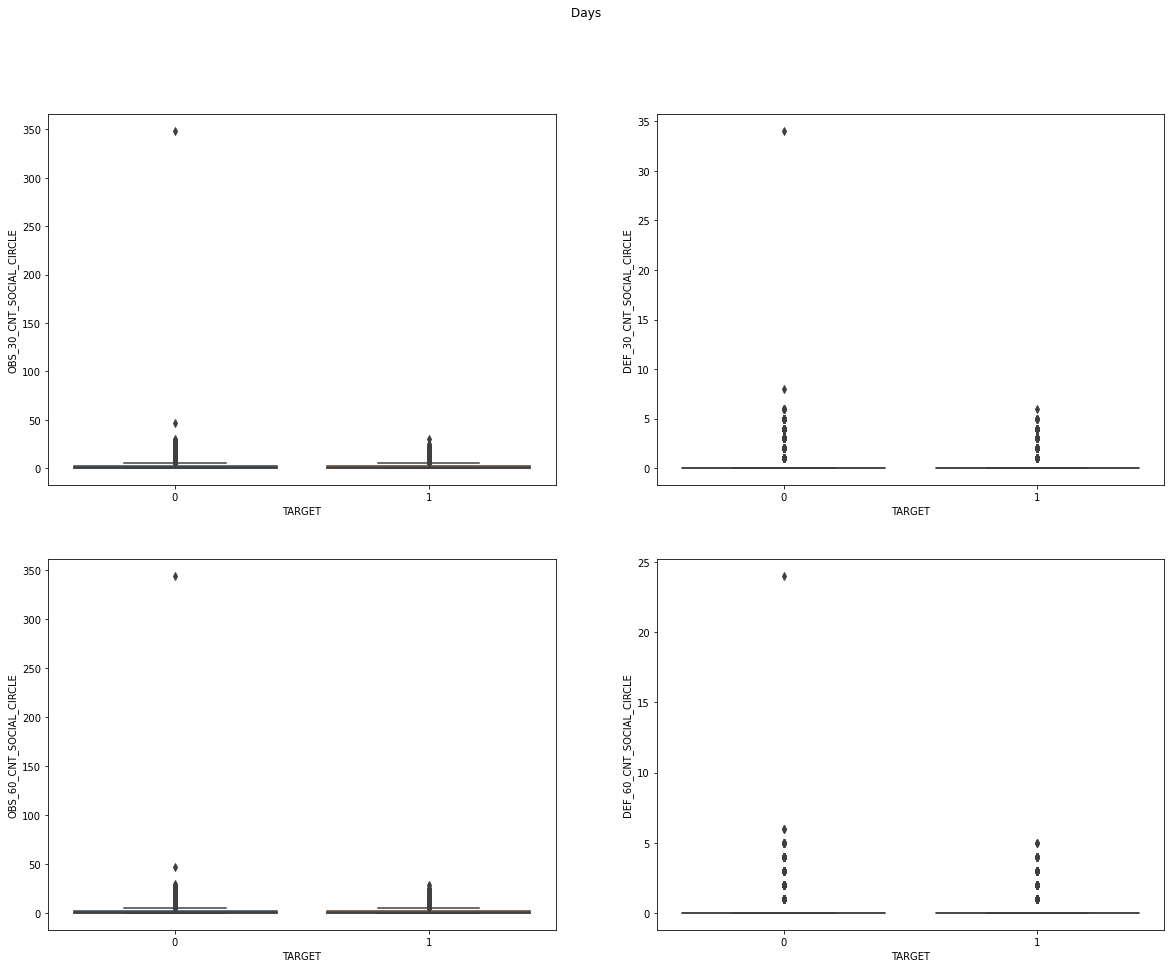

In [374]:
fig, axes=plt.subplots(2,2, figsize=(20,15))
fig.suptitle('Days ')


sns.boxplot(ax=axes[0,0],x="TARGET",y='OBS_30_CNT_SOCIAL_CIRCLE',data=new_loan)
sns.boxplot(ax=axes[0,1],x="TARGET",y='DEF_30_CNT_SOCIAL_CIRCLE',data=new_loan)
sns.boxplot(ax=axes[1,0],x="TARGET",y='OBS_60_CNT_SOCIAL_CIRCLE',data=new_loan)
sns.boxplot(ax=axes[1,1],x="TARGET",y='DEF_60_CNT_SOCIAL_CIRCLE',data=new_loan)

plt.show()

#Inference : 

#1. Days Employed : People who are working for the longer time in the current position from the day of application is mostly 
#likely to repay the loan

#2. DAYS_ID_PUBLISH :People who change their Identity document close to the application date are 
#more likely to defaulty 


#3. DAYS_REGISTRATION : People who have long registration from the day of application is mostly 
#likely to repay the loan beacuse the median is slightly higher 

#4. DAYS_LAST_PHONE_CHANGE : People who has not changed their phone number close to application date are morely likely to
#repay loans and we see more number of non-defaulty people in range of 50-75%


In [149]:
len(new_loan['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts())

32

### 8.Comparision of CNT_FAM_MEMBERS of client in loan defaulty vs non-deafulty 

In [375]:
new_loan['CNT_FAM_MEMBERS'].value_counts()

2     122807
3      51263
1      48771
4      24261
5       3403
6        394
7         78
8         19
9          6
10         3
12         2
14         2
20         2
16         1
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

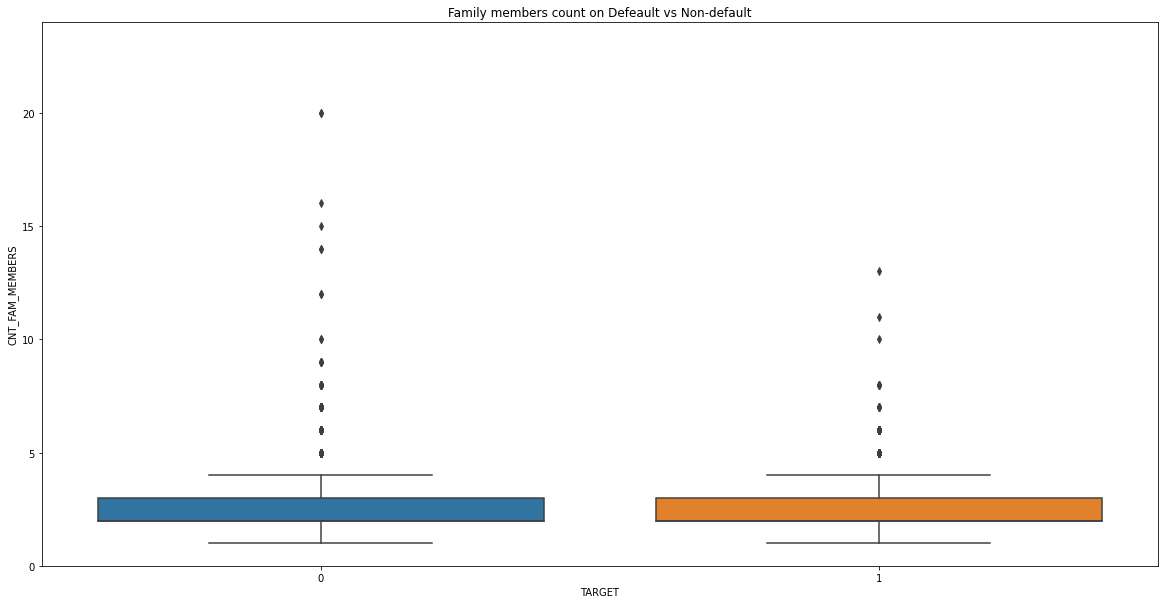

In [376]:
plt.figure(figsize=(20,10))
plt.title('Family members count on Defeault vs Non-default')
plt.ylim(0,24)
sns.boxplot(x='TARGET',y='CNT_FAM_MEMBERS',data=new_loan)

#Inference: we see an outler value above 20 (family member) count we should drop that outlier as it affects the mean/median 
# There are few outliers close too 75% values so we should impute the outlier with median 

### 9.Compare and ananlyze of EXT_SOURCE_2 in loan_nondefault vs loan_default 

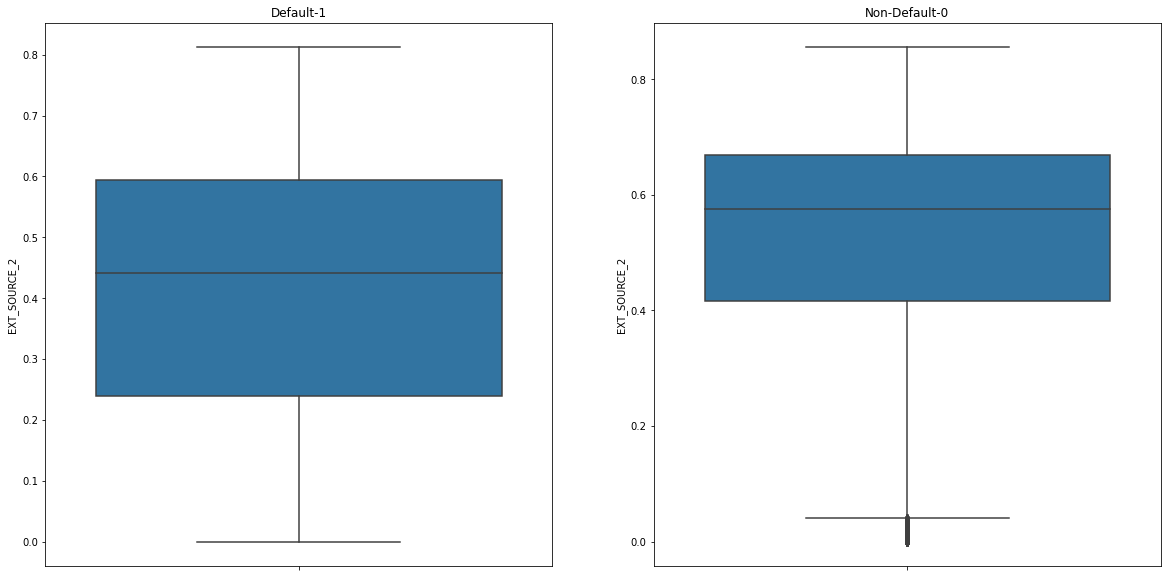

In [377]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default-1')
plt.xticks(rotation=90)
sns.boxplot(loan_default['EXT_SOURCE_2'],orient='v')

plt.subplot(1,2,2)
plt.title('Non-Default-0')
plt.xticks(rotation=90)
sns.boxplot(loan_nondefault['EXT_SOURCE_2'],orient='v')

#Inference : People with less EXT_SOURCE_2 score are more likely to be defaulty.

_____________________________________________________________________________________________________________
# BIVARIANT ANALYISIS ON :
1. Categorical-Categorical Variable 
2. Continuous-Continuous variable
2. Categorical-continuous 

In [378]:
new_loan.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               Y          202500.0    406597.5      24700.5         351000.0   
1               N          270000.0   1293502.5      35698.5        1129500.0   
2               Y           67500.0    135000.0       6750.0         135000.0   
3               Y          135000.0    312682.5      29686.5         297000.0   
4               Y          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               3648             2120        Laborers                1   
1               1186              291      Core staff                2   
2               4260             2531        Laborers                1   
3               9833             2437        Laborers                2   
4               4311             3458      Core staff                1   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                    2                           2  Business Entity Type 3   
1                    1                           1                  School   
2                    2                           2              Government   
3                    2                           2  Business Entity Type 3   
4                    2                           2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                         2   
1      0.622246           NaN                         1   
2      0.555912      0.729567                         0   
3      0.650442           NaN                         2   
4      0.322738           NaN                         0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         0                         1   
2                         0                         0   
3                         0                         2   
4                         0                         0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE AMT_Bin_Incometotal  \
0                         2                    1134       200000-300000   
1                         0                     828       200000-300000   
2                         0                     815        Below 100000   
3                         0                     617       100000-200000   
4                         0                    1106       100000-200000   

  AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  AGE AGE_BIN  
0       400000-600000     20000-30000  

## 1. Bivariant analysis of Continuous-Continuous Variable 

### 1. Comparion of AMT_INCOME_TOTAL and AMT_CREDIT on Loan default(1) and non deafult(0)

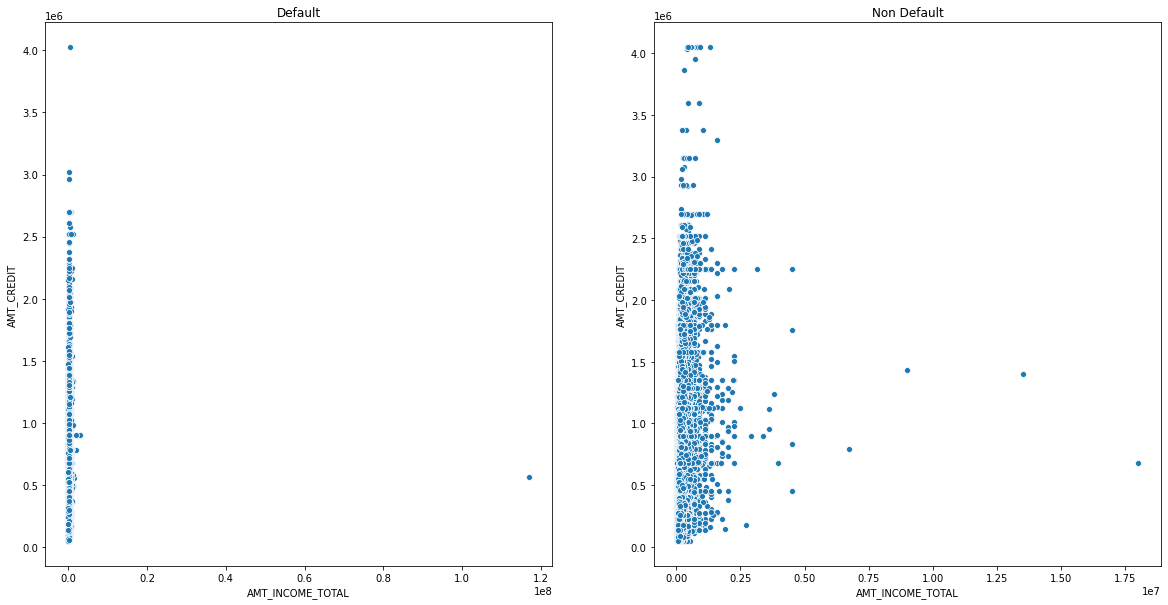

In [379]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
sns.scatterplot(loan_default['AMT_INCOME_TOTAL'],loan_default['AMT_CREDIT'])
plt.subplot(1,2,2)
plt.title('Non Default')
sns.scatterplot(loan_nondefault['AMT_INCOME_TOTAL'],loan_nondefault['AMT_CREDIT'])


#Inference : No linear Relation observed that AMT_INCOME_TOTAL and AMT_CREDIT 

# Categorical - Continuous Analysis Variable 

 ### 1. Comparion of NAME_INCOME_TYPE vs AMT_CREDIT and on Loan default(1) and non deafult(0)

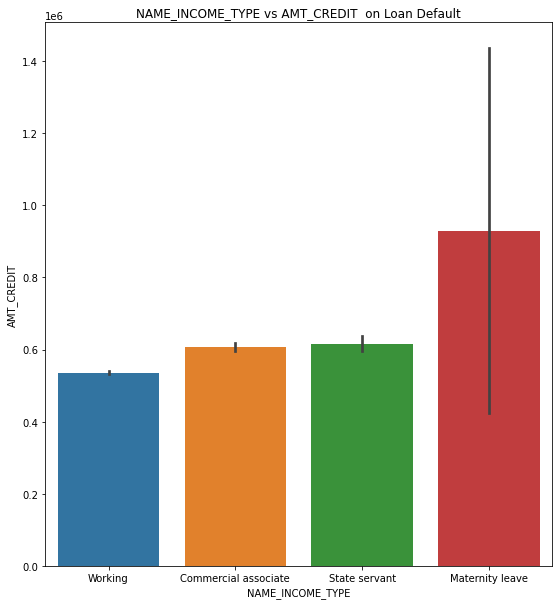

In [380]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('NAME_INCOME_TYPE vs AMT_CREDIT  on Loan Default')
sns.barplot(loan_default['NAME_INCOME_TYPE'],loan_default['AMT_CREDIT'])
#plt.subplot(1,2,2)
#plt.title('Non Default')
#sns.barplot(loan_nondefault['NAME_INCOME_TYPE'],loan_nondefault['AMT_CREDIT'])


#Inference : Maternity leave has highest credit amount and more likely to be deafulty 

### 2. Comparion of NAME_EDUCATION_TYPE vs AMT_CREDIT and on Loan default(1) and non deafult(0)

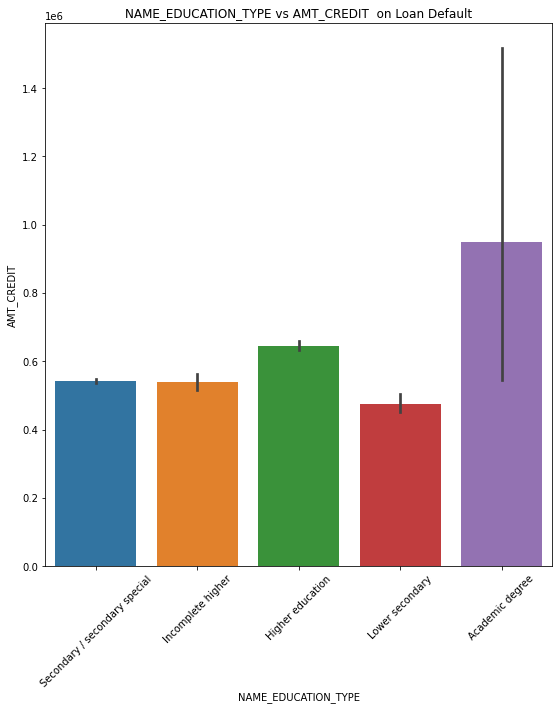

In [382]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('NAME_EDUCATION_TYPE vs AMT_CREDIT  on Loan Default')
sns.barplot(loan_default['NAME_EDUCATION_TYPE'],loan_default['AMT_CREDIT'])
#plt.subplot(1,2,2)
#plt.title('Non Default')
#sns.barplot(loan_nondefault['NAME_INCOME_TYPE'],loan_nondefault['AMT_CREDIT'])


#Inference : People with education type Academic Degree observed to have high credit amount and more likely to be defaulty.
# as students tends to take more loan for academic education and comes up with risk of not getting job post college 

### 3. Comparion of NAME_FAMILY_STATUS vs AMT_CREDIT and on Loan default(1) and non deafult(0)

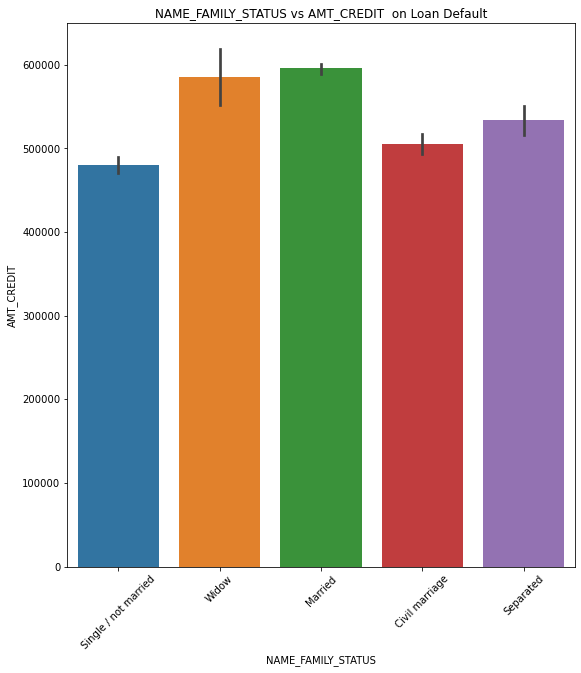

In [102]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('NAME_FAMILY_STATUS vs AMT_CREDIT  on Loan Default')
sns.barplot(loan_default['NAME_FAMILY_STATUS'],loan_default['AMT_CREDIT'])
#plt.subplot(1,2,2)
#plt.title('Non Default')
#sns.barplot(loan_nondefault['NAME_INCOME_TYPE'],loan_nondefault['AMT_CREDIT'])

#Inference : Maried people are likely to take higher credit amount with risk of being defaulty as they tend to have more expenses
#and single people suspect to take the least loan credit as comapre to rest

### 4.Comparion of NAME_HOUSING_TYPE vs AMT_CREDIT and on Loan default(1) and non deafult(0)

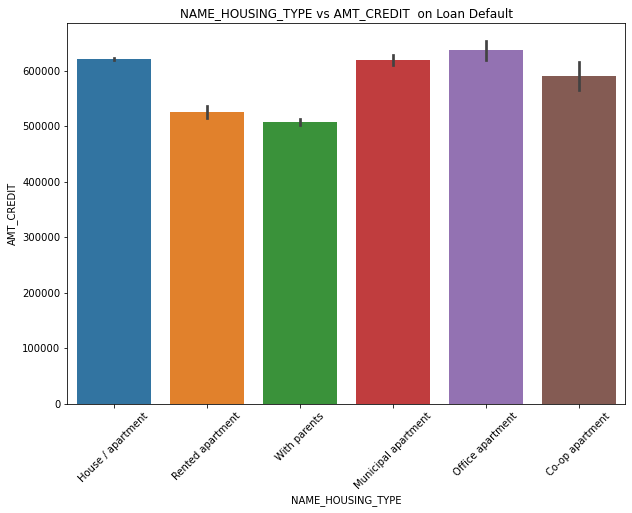

In [385]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=45)
plt.title('NAME_HOUSING_TYPE vs AMT_CREDIT  on Loan Default')
sns.barplot(x='NAME_HOUSING_TYPE',y='AMT_CREDIT',data=new_loan)

#Inference : People with NAME_HOUSING_TYPE Office apartment observed to have high credit amount and more likely to be defaulty.

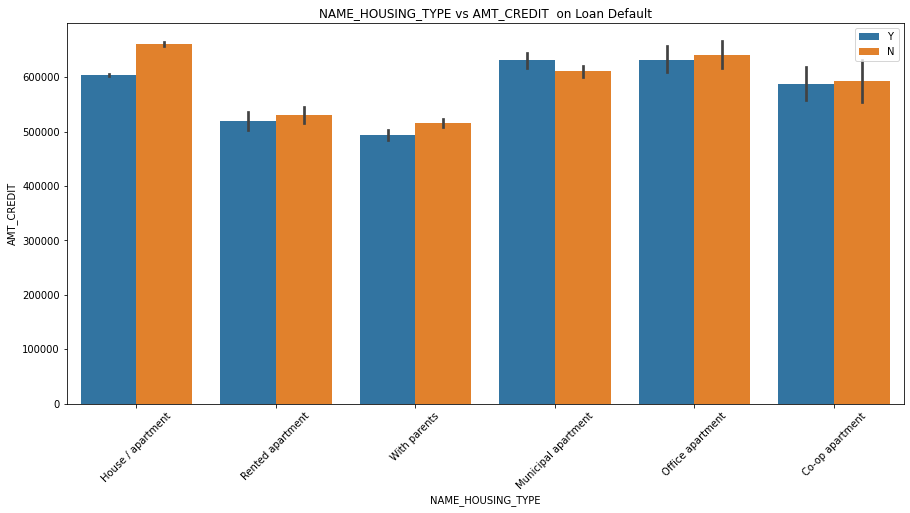

In [160]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.title('NAME_HOUSING_TYPE vs AMT_CREDIT  on Loan Default')
sns.barplot(x='NAME_HOUSING_TYPE',y='AMT_CREDIT',data=new_loan,hue='FLAG_OWN_REALTY')
plt.legend(loc='upper right')
#Inference : People with education type Academic Degree observed to have high credit amount and more likely to be defaulty.
# as students tends to take more loan for academic education and comes up with risk of not getting job post college 

### 5. Comparion of OCCUPATION_TYPE vs AMT_CREDIT and on Loan default(1) and non deafult(0)

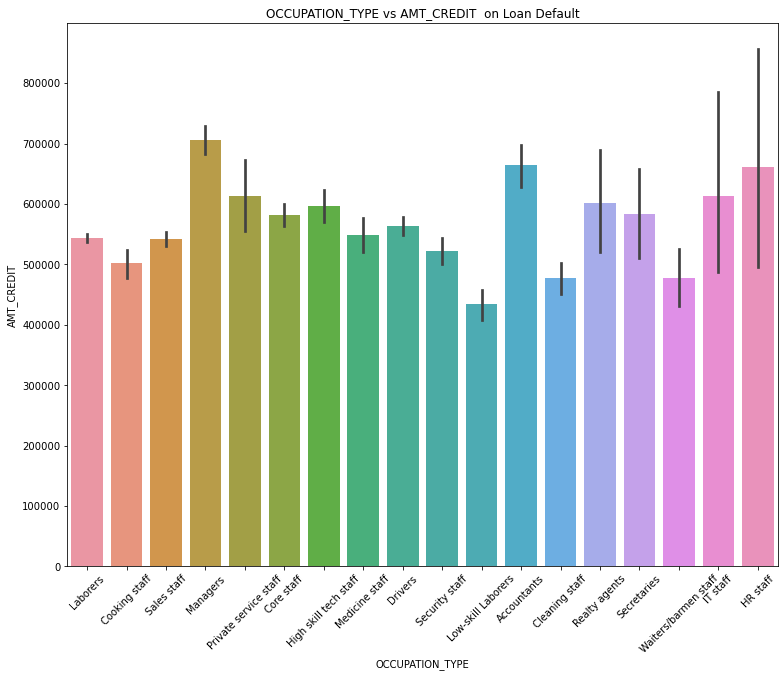

In [387]:
plt.figure(figsize=(28,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('OCCUPATION_TYPE vs AMT_CREDIT  on Loan Default')
sns.barplot(loan_default['OCCUPATION_TYPE'],loan_default['AMT_CREDIT'])


#Inference : People with OCCUPATION_TYPE MANAGERS followed by Accounts observed to have high credit amount and more likely to be defaulty.
 #and low skill laborers have least amount credit and less likely to be defaulty

### 6. Comparion of REGION_RATING_CLIENT vs AMT_CREDIT and on Loan default(1) and non deafult(0)

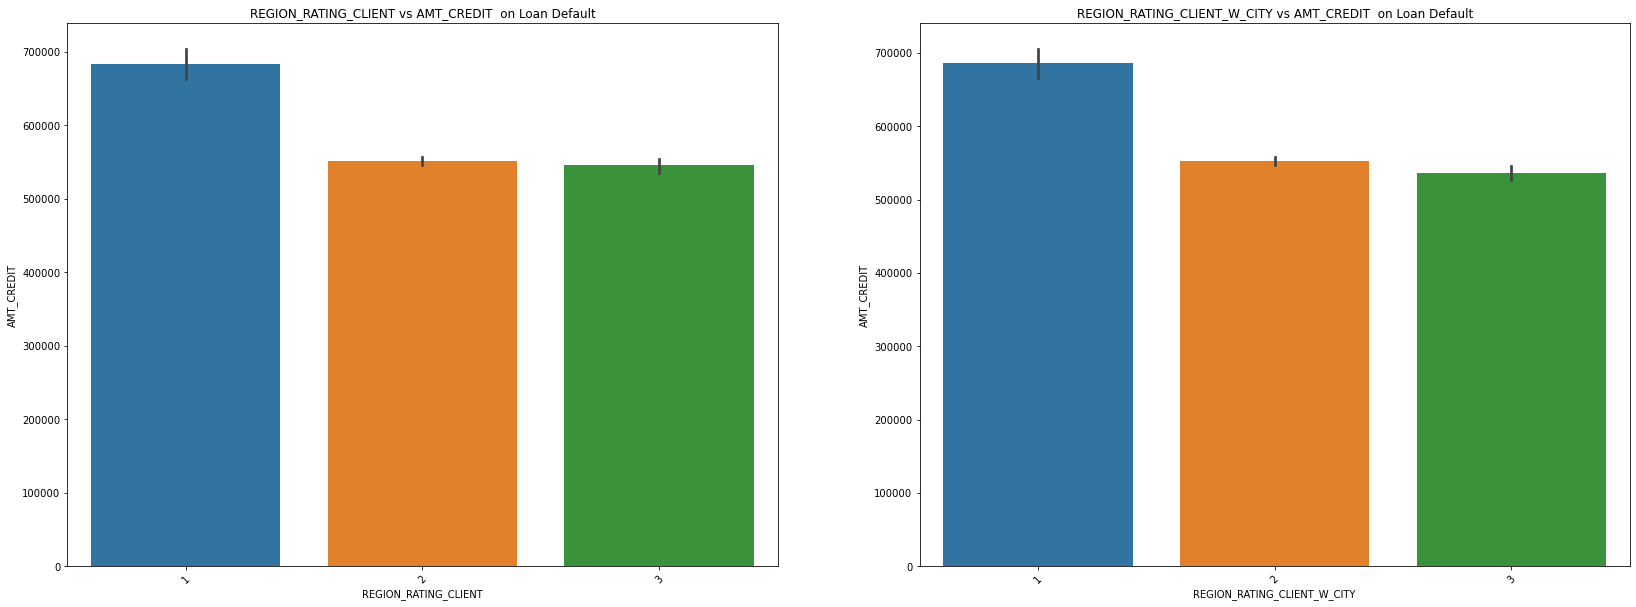

In [388]:
plt.figure(figsize=(28,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('REGION_RATING_CLIENT vs AMT_CREDIT  on Loan Default')
sns.barplot(loan_default['REGION_RATING_CLIENT'],loan_default['AMT_CREDIT'])
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('REGION_RATING_CLIENT_W_CITY vs AMT_CREDIT  on Loan Default')
sns.barplot(loan_default['REGION_RATING_CLIENT_W_CITY'],loan_default['AMT_CREDIT'])


#Inference : People staying in region 1 with and without city into consideration observed to have high credit amount and more likely to be defaulty.
 

### 7. Comparion of NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL and on Loan default(1) and non deafult(0)

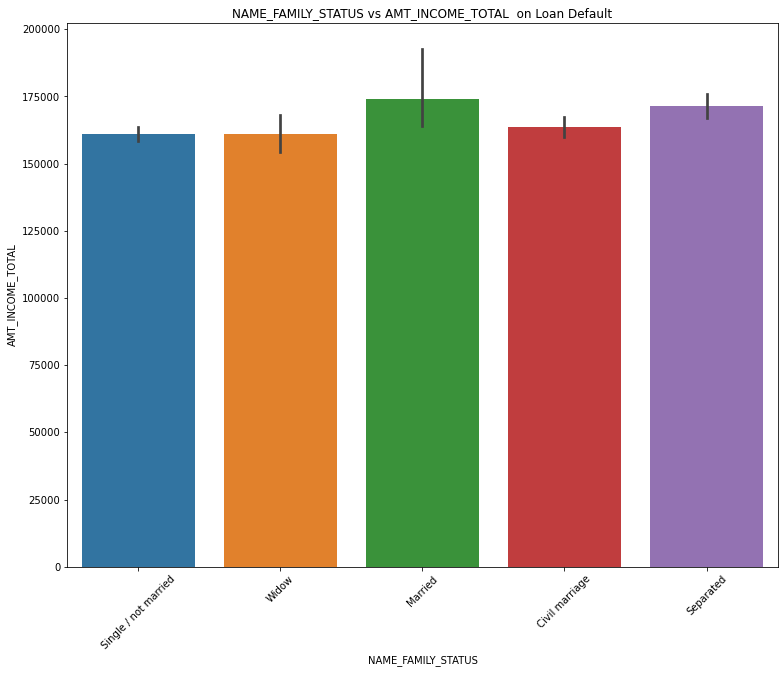

In [390]:
plt.figure(figsize=(28,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL  on Loan Default')
sns.barplot(loan_default['NAME_FAMILY_STATUS'],loan_default['AMT_INCOME_TOTAL'])


#Inference : People with family status married observed to have high total income and are more likely to be defaulty.


### 8.Comparion of NAME_INCOME_TYPE vs AMT_INCOME_TOTAL and on Loan default(1) and non deafult(0)

<AxesSubplot:title={'center':'NAME_INCOME_TYPE vs AMT_INCOME_TOTAL  on Loan Default (1)'}, xlabel='NAME_INCOME_TYPE', ylabel='AMT_INCOME_TOTAL'>

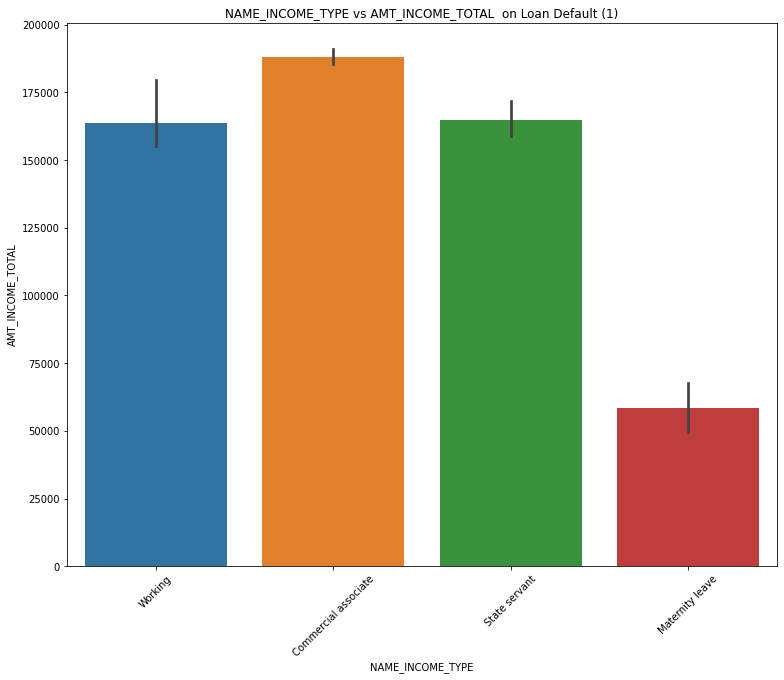

In [165]:
plt.figure(figsize=(28,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('NAME_INCOME_TYPE vs AMT_INCOME_TOTAL  on Loan Default (1)')
sns.barplot(loan_default['NAME_INCOME_TYPE'],loan_default['AMT_INCOME_TOTAL'])


#Inference : People with Income type Commercial associate observed to have high total income and are more likely to be defaulty.

### 9. Comparion of NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL and on Loan default(1) and non deafult(0)

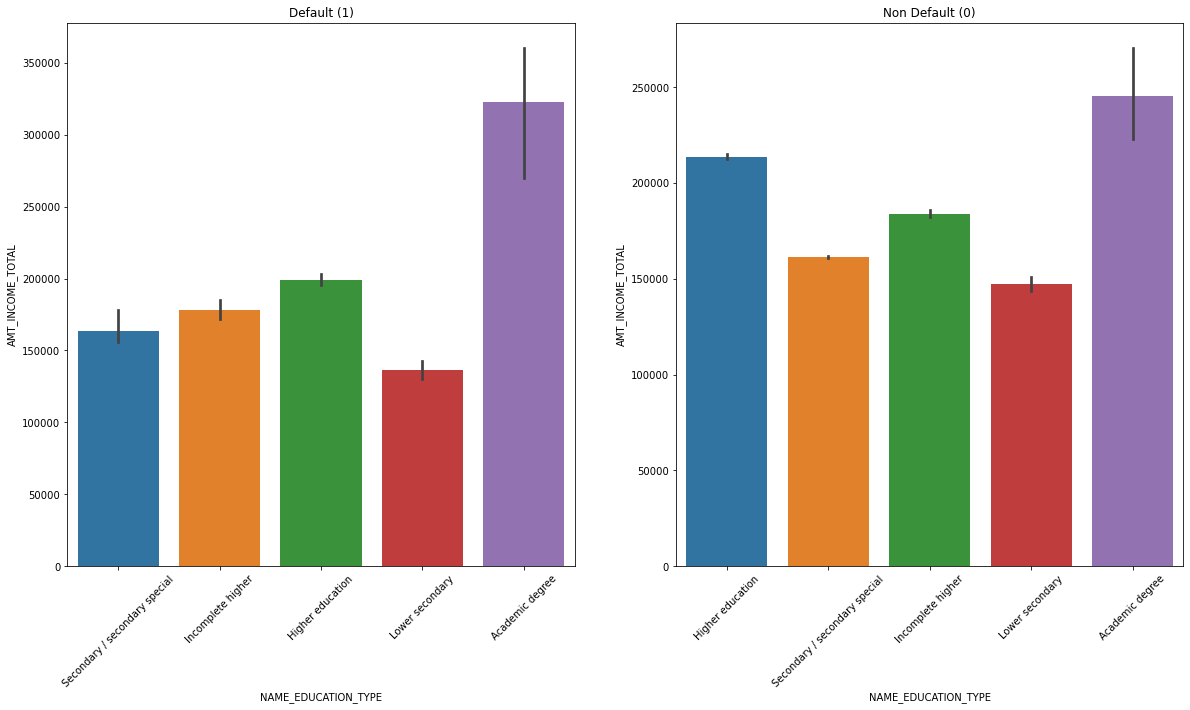

In [392]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('Default (1)')
sns.barplot(loan_default['NAME_EDUCATION_TYPE'],loan_default['AMT_INCOME_TOTAL'])

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Non Default (0)')
sns.barplot(loan_nondefault['NAME_EDUCATION_TYPE'],loan_nondefault['AMT_INCOME_TOTAL'])

#Inference : People with education type Academic Degree observed to have high total income and are more likely to be defaulty.

### 10. Comparion of NAME_HOUSING_TYPE vs AMT_INCOME_TOTAL and on Loan default(1) and non deafult(0)

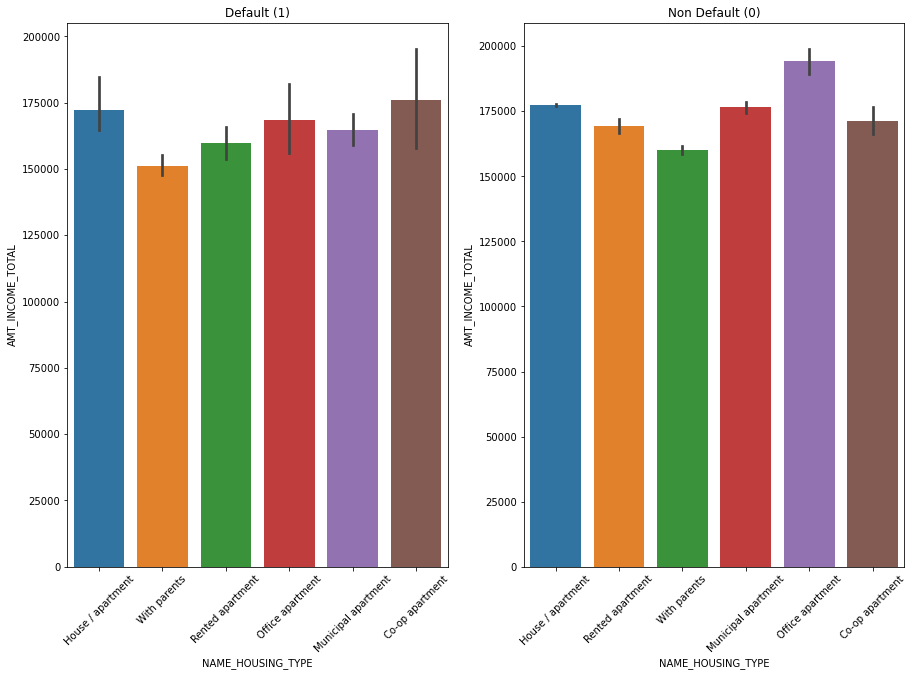

In [825]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('Default (1)')
sns.barplot(loan_default['NAME_HOUSING_TYPE'],loan_default['AMT_INCOME_TOTAL'])

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Non Default (0)')
sns.barplot(loan_nondefault['NAME_HOUSING_TYPE'],loan_nondefault['AMT_INCOME_TOTAL'])

#Inference : People with housing type Co-op apartment  observed to have high total income and are more likely to be defaulty.

### 11. Comparion of OCCUPATION_TYPE vs AMT_INCOME_TOTAL and on Loan default(1) and non deafult(0)

<AxesSubplot:title={'center':'Non Default (0)'}, xlabel='OCCUPATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

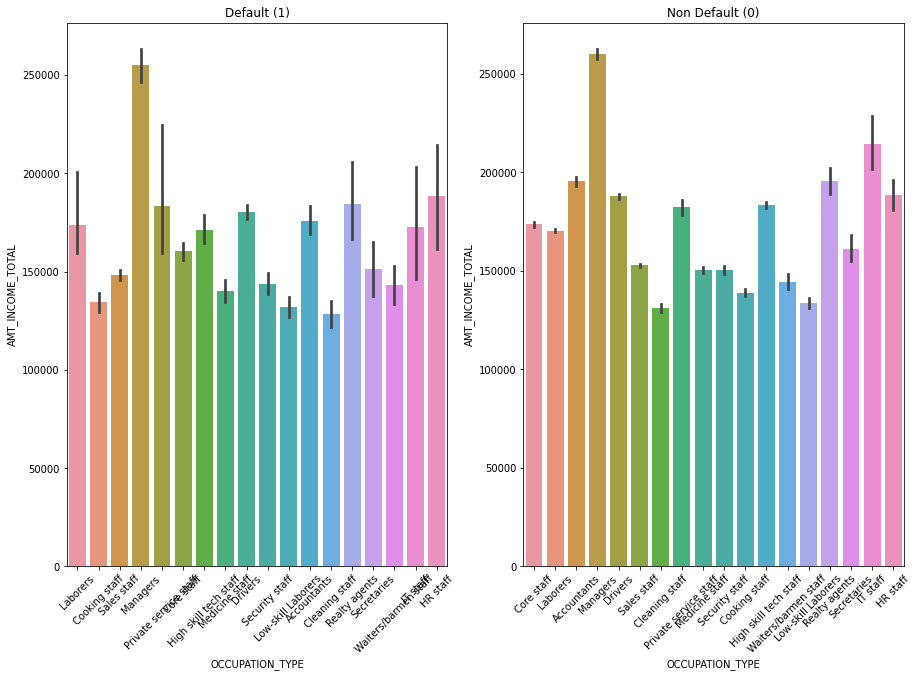

In [167]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('Default (1)')
sns.barplot(loan_default['OCCUPATION_TYPE'],loan_default['AMT_INCOME_TOTAL'])

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Non Default (0)')
sns.barplot(loan_nondefault['OCCUPATION_TYPE'],loan_nondefault['AMT_INCOME_TOTAL'])

#Inference : People with OCCUPATION_TYPE managers observed to have high total income and are more likely to be defaulty.

### 12. Comparion of Education vs AMT_INCOME_TOTAL and on Loan default(1) and non deafult(0)

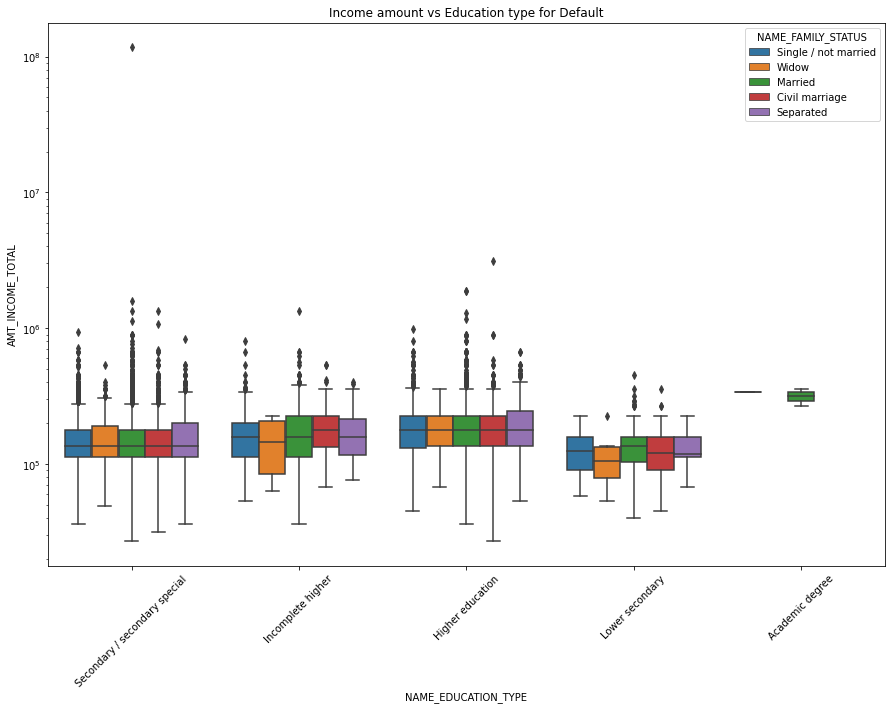

In [396]:
plt.figure(figsize=(15,10))
sns.boxplot(data =loan_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v').set_yscale("log")
plt.xticks(rotation=45)
plt.title('Income amount vs Education type for Default')
plt.show()

#####  INFERENCE :1. The secondary and higher education have the equal amount of income with family status.
##### 2.Lower secondary has the lowest income compared with other educational categories.

### 13. Bivariant analysis for education type of non-default one.

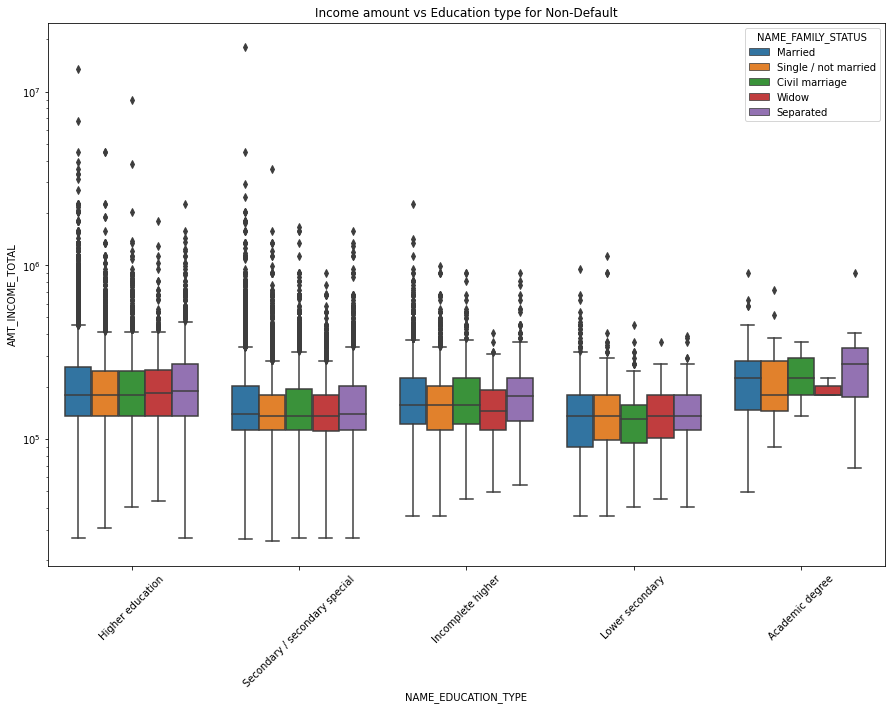

In [189]:
plt.figure(figsize=(15,10))
sns.boxplot(data =loan_nondefault, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v').set_yscale("log")
plt.xticks(rotation=45)
plt.title('Income amount vs Education type for Non-Default')
plt.show()

##### INFERENCE : 1. The income rate for Higher education, Secondary  education amd Lower secondary  eduaction are equal with all family status categories 
#####  2. The lower secondary with family status as civil marriage has the lowest income rate compared to other values.

# Bivariant Continuous- Continuous Variable analysis :

In [106]:
loan_default.corr()

SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                    1.000000     NaN         -0.011140    0.000736   
TARGET                             NaN     NaN               NaN         NaN   
AMT_INCOME_TOTAL             -0.011140     NaN          1.000000    0.036402   
AMT_CREDIT                    0.000736     NaN          0.036402    1.000000   
AMT_ANNUITY                  -0.007406     NaN          0.043274    0.748144   
AMT_GOODS_PRICE               0.000544     NaN          0.036068    0.982794   
REGION_POPULATION_RELATIVE    0.007309     NaN          0.008460    0.069137   
DAYS_BIRTH                    0.005382     NaN          0.007814    0.189905   
DAYS_EMPLOYED                -0.000478     NaN          0.000014    0.105900   
DAYS_REGISTRATION            -0.003650     NaN          0.003966    0.033297   
DAYS_ID_PUBLISH               0.003134     NaN          0.008835    0.062029   
CNT_FAM_MEMBERS              -0.004386     NaN          0.003691    0.045280   
EXT_SOURCE_2                  0.005940     NaN          0.006174    0.126828   
EXT_SOURCE_3                 -0.005715     NaN         -0.013818    0.087276   
OBS_30_CNT_SOCIAL_CIRCLE     -0.005802     NaN         -0.005870    0.015946   
DEF_30_CNT_SOCIAL_CIRCLE     -0.000701     NaN         -0.005829   -0.031633   
OBS_60_CNT_SOCIAL_CIRCLE     -0.005293     NaN         -0.005772    0.016377   
DEF_60_CNT_SOCIAL_CIRCLE     -0.006901     NaN         -0.005259   -0.034877   
DAYS_LAST_PHONE_CHANGE        0.000125     NaN          0.001132    0.116211   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    -0.007406         0.000544   
TARGET                              NaN              NaN   
AMT_INCOME_TOTAL               0.043274         0.036068   
AMT_CREDIT                     0.748144         0.982794   
AMT_ANNUITY                    1.000000         0.749146   
AMT_GOODS_PRICE                0.749146         1.000000   
REGION_POPULATION_RELATIVE     0.074322         0.076310   
DAYS_BIRTH                     0.090628         0.185804   
DAYS_EMPLOYED                  0.048779         0.111759   
DAYS_REGISTRATION             -0.014397         0.032178   
DAYS_ID_PUBLISH                0.043748         0.064456   
CNT_FAM_MEMBERS                0.054720         0.041916   
EXT_SOURCE_2                   0.120596         0.137324   
EXT_SOURCE_3                   0.053354         0.087550   
OBS_30_CNT_SOCIAL_CIRCLE       0.000100         0.016707   
DEF_30_CNT_SOCIAL_CIRCLE      -0.024312        -0.027108   
OBS_60_CNT_SOCIAL_CIRCLE       0.001271         0.017260   
DEF_60_CNT_SOCIAL_CIRCLE      -0.027507        -0.029623   
DAYS_LAST_PHONE_CHANGE         0.083445         0.123356   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                    0.007309    0.005382   
TARGET                                             NaN         NaN   
AMT_INCOME_TOTAL                              0.008460    0.007814   
AMT_CREDIT                                    0.069137    0.189905   
AMT_ANNUITY                                   0.074322    0.090628   
AMT_GOODS_PRICE                               0.076310    0.185804   
REGION_POPULATION_RELATIVE                    1.000000    0.050213   
DAYS_BIRTH                                    0.050213    1.000000   
DAYS_EMPLOYED                                 0.015615    0.306880   
DAYS_REGISTRATION                             0.056071    0.240638   
DAYS_ID_PUBLISH                               0.012448    0.134925   
CNT_FAM_MEMBERS                              -0.030885   -0.110460   
EXT_SOURCE_2                                  0.170504    0.142477   
EXT_SOURCE_3                                 -0.013720    0.146276   
OBS_30_CNT_SOCIAL_CIRCLE                      0.004662    0.009815   
DEF_30_CNT_SOCIAL_CIRCLE                      0.023866   -0.010362   
OBS_60_CNT_SOCIAL_CIRCLE            

### 1. Comparison of AMT_CREDIT vs AMT_ANNUITY in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

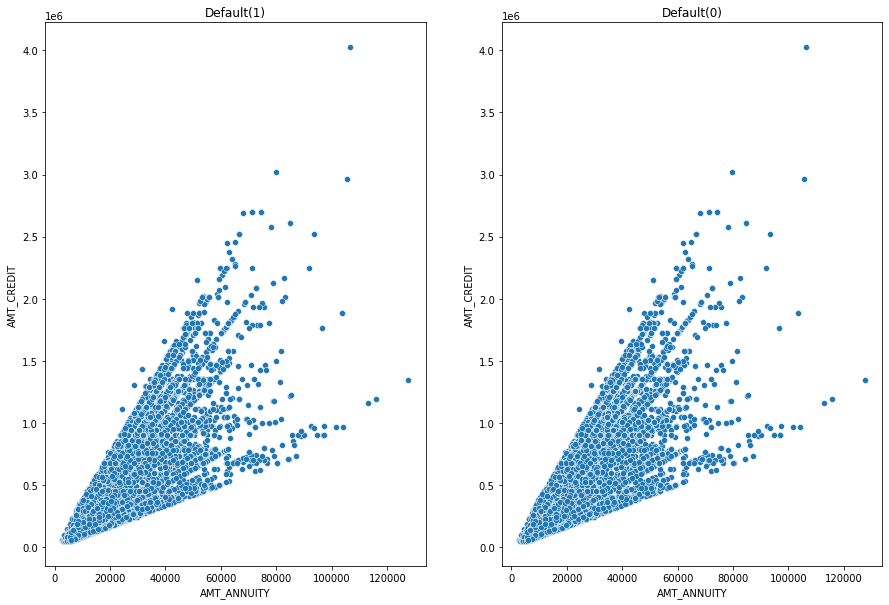

In [169]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=loan_default)

#Inference : AMT_ANNUITY and AMT_CREDIT are highly correlated in a postive direction : Annutiy amount increases with increase in amount credit

### 2. Comparison of AMT_GOODS_PRICE and AMT_CREDIT in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

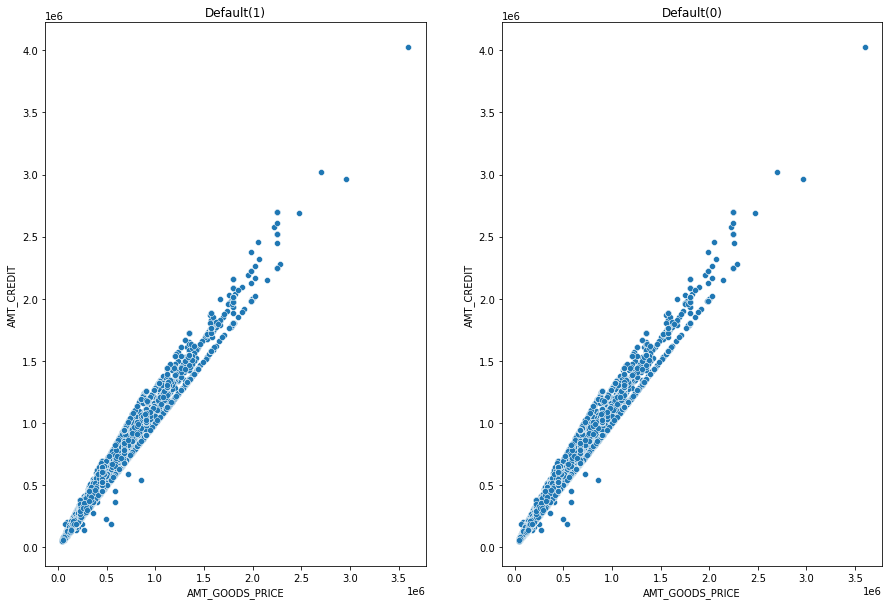

In [170]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=loan_default)

#Inference : AMT_GOODS_PRICE and AMT_CREDIT are  linerly, highly correlated in a postive direction : amount credit increases with increase in AMT_GOODS_PRICE 
# AMT_GOODS_PRICE is highly correlated with credit amount than AMT_ANNUiTY




### 3.Comparison of AMT_GOODS_PRICE and AMT_ANNUITY in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='AMT_GOODS_PRICE', ylabel='AMT_ANNUITY'>

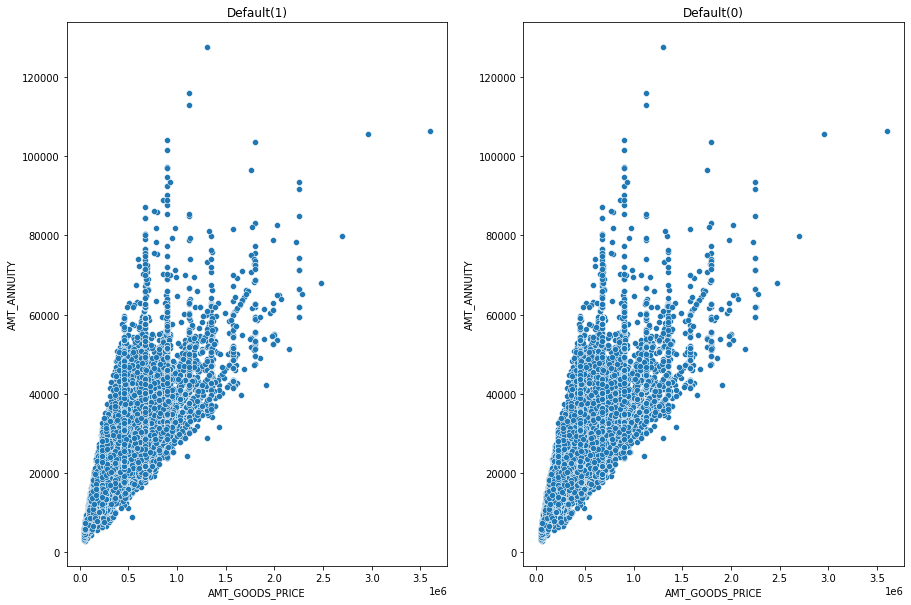

In [171]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=loan_default)

#Inference : AMT_GOODS_PRICE and AMT_ANNUITY are linerly, highly correlated in a postive direction : AMT_ANNUITY increases with increase in AMT_GOODS_PRICE 




### 4. Comparison of DAYS_BIRTH and DAYS_EMPLOYED in loan default (1) and non-default(0)

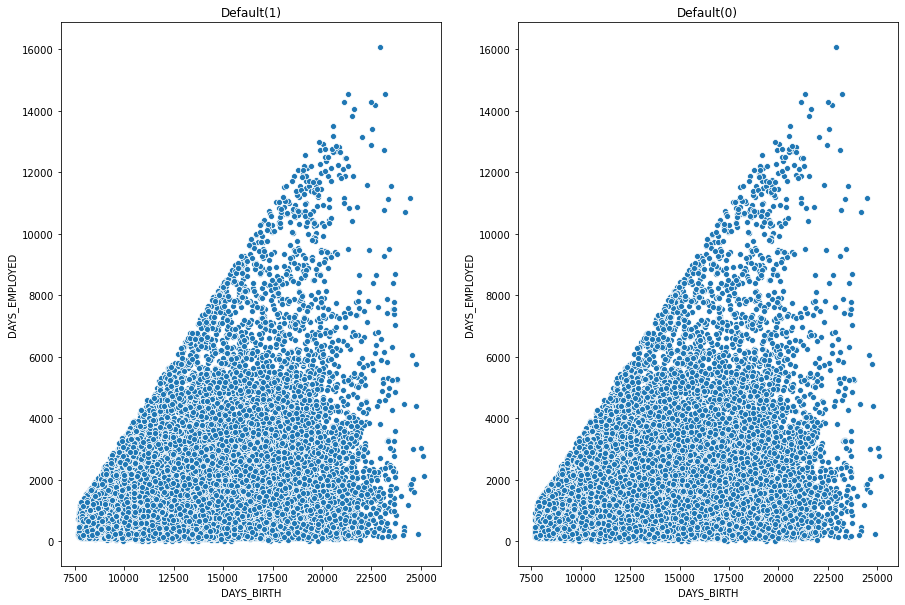

In [400]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='DAYS_BIRTH',y='DAYS_EMPLOYED',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='DAYS_BIRTH',y='DAYS_EMPLOYED',data=loan_default)

#Inference : slight linear relation 

### 5. Comparison of OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='OBS_60_CNT_SOCIAL_CIRCLE'>

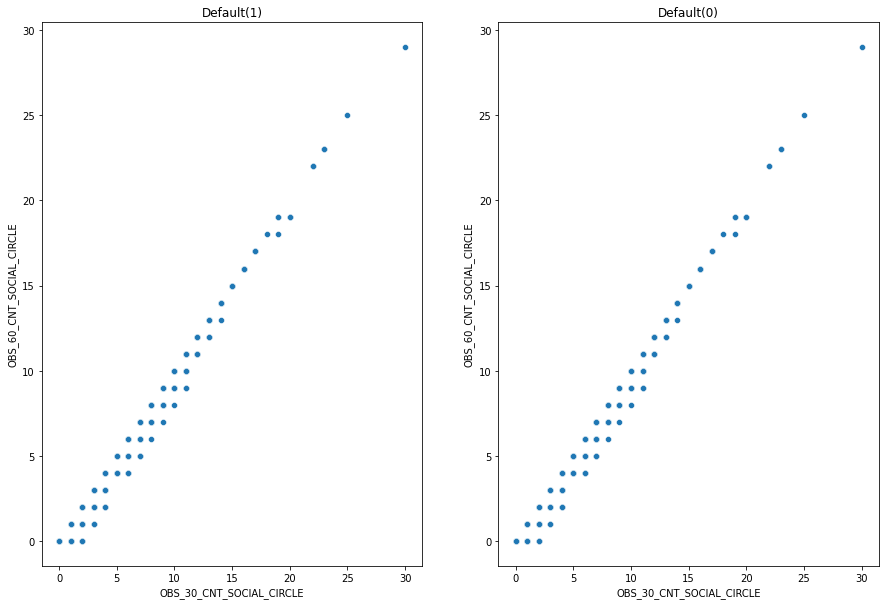

In [173]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='OBS_30_CNT_SOCIAL_CIRCLE',y='OBS_60_CNT_SOCIAL_CIRCLE',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='OBS_30_CNT_SOCIAL_CIRCLE',y='OBS_60_CNT_SOCIAL_CIRCLE',data=loan_default)

#Inference : Observe high postive linear relationship that is No of observations 60 DPD (days past due) increases with 30 DPD (days past due). Increasing the chance of being defaulty  

### 6. Comparison of DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

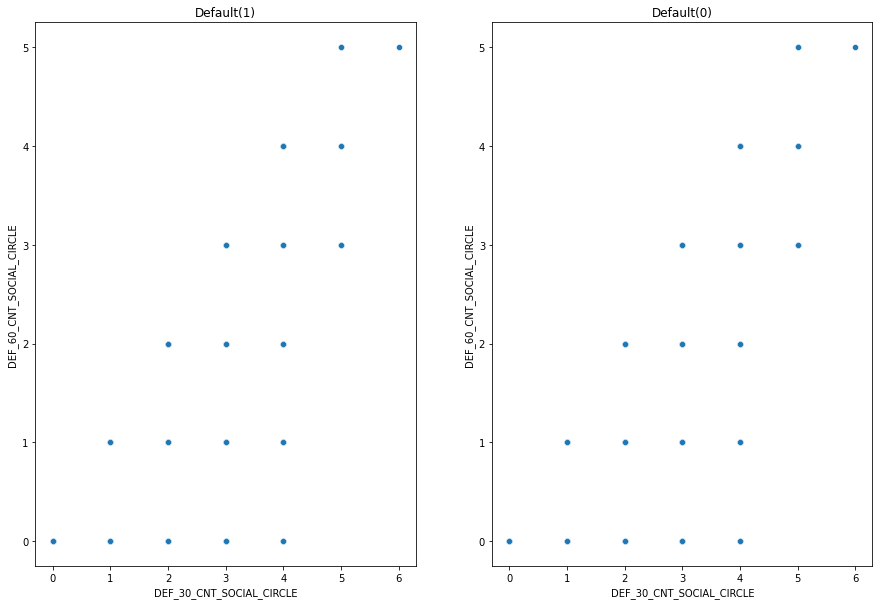

In [174]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='DEF_30_CNT_SOCIAL_CIRCLE',y='DEF_60_CNT_SOCIAL_CIRCLE',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='DEF_30_CNT_SOCIAL_CIRCLE',y='DEF_60_CNT_SOCIAL_CIRCLE',data=loan_default)

#Inference : Observe postive linear relationship that is No of people defaulted on 30 DPD (days past due) increases with 60 DPD (days past due). 
# Hence we suspect that people defaulted on on 30 DPD are more likely to be defaulted on 60 DPD 

### 7. Comparison of DAYS_LAST_PHONE_CHANGE and EXT_SOURCE_2 in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='EXT_SOURCE_2'>

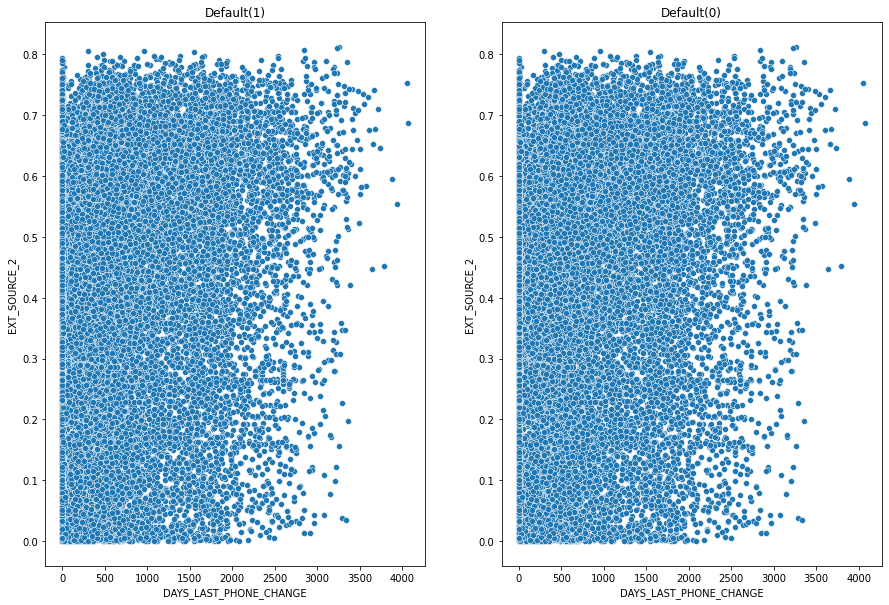

In [175]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='DAYS_LAST_PHONE_CHANGE',y='EXT_SOURCE_2',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='DAYS_LAST_PHONE_CHANGE',y='EXT_SOURCE_2',data=loan_default)

#Inference : No LInear relationship between DAYS_LAST_PHONE_CHANGE and EXT_SOURCE_2

### 8.Comparison of OBS_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE in loan default (1) and non-default(0)

<AxesSubplot:title={'center':'Default(0)'}, xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='DEF_30_CNT_SOCIAL_CIRCLE'>

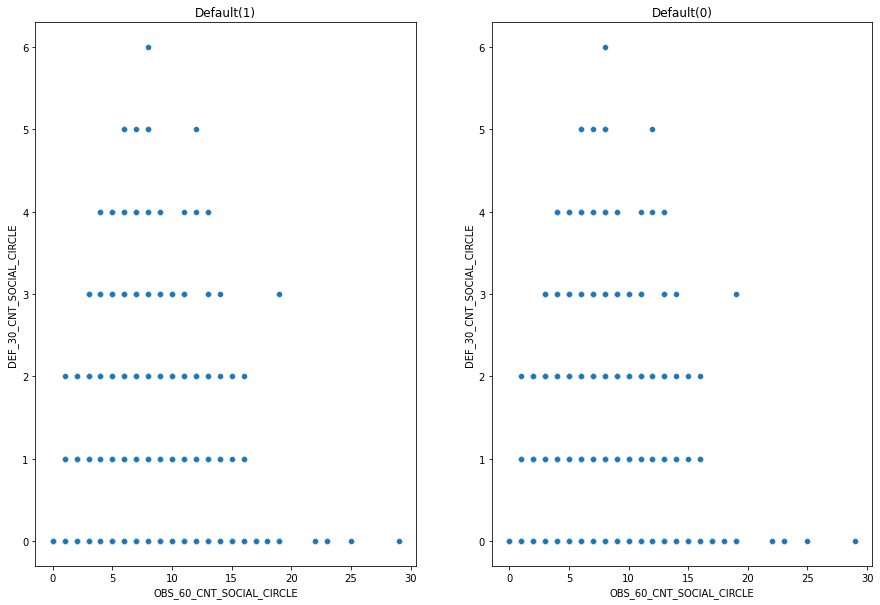

In [176]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='OBS_60_CNT_SOCIAL_CIRCLE',y='DEF_30_CNT_SOCIAL_CIRCLE',data=loan_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='OBS_60_CNT_SOCIAL_CIRCLE',y='DEF_30_CNT_SOCIAL_CIRCLE',data=loan_default)

#Inference : 

### 9. Bivariant Categorical- Categorical Variable analysis :

### 9. Comparison of NAME_EDUCATION_TYPE and CODE_GENDER  in loan default (1) and non-default(0)

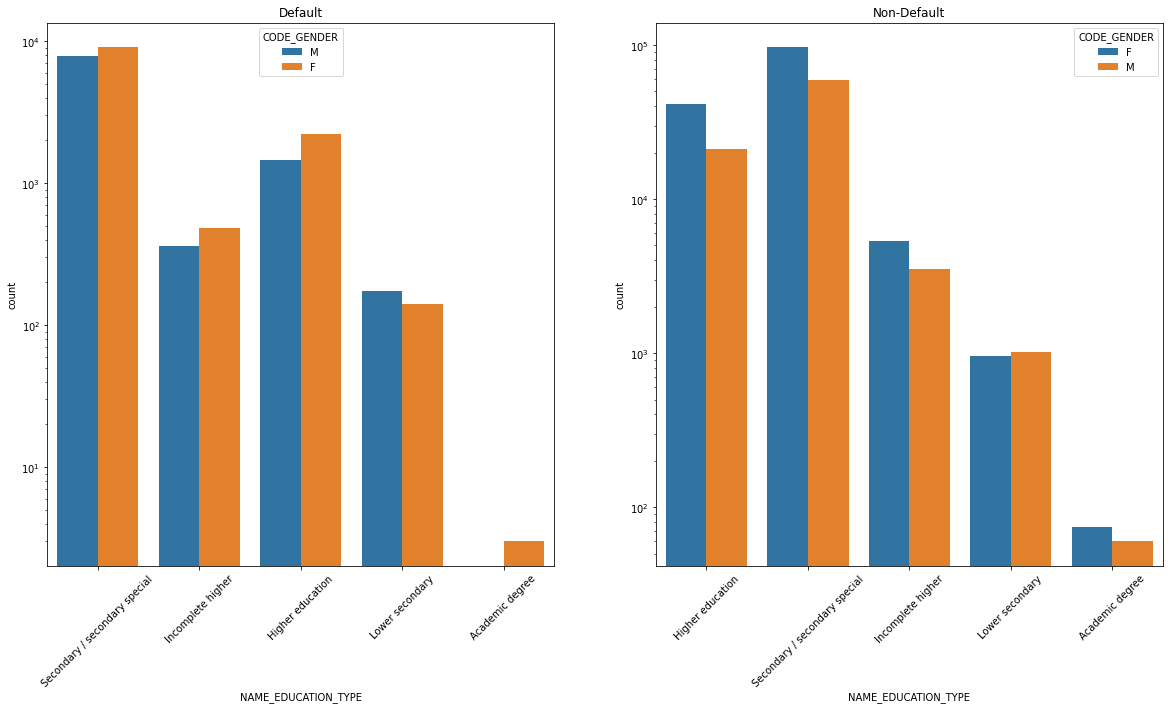

In [405]:
#sns.countplot(loan_default['AMT_Bin_Incometotal'],label='Default')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Default')
plt.xticks(rotation=45)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=loan_default).set_yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Default')
plt.xticks(rotation=45)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=loan_nondefault).set_yscale('log')


#Inference : Males with education type: academic degree are less like to be defaulty from the default plot as we do not see any males with academic degree
#and in non default plot there are more non-default males with education type "academic  degree" as comapre to femailes

### Multivariant ANnalysis :


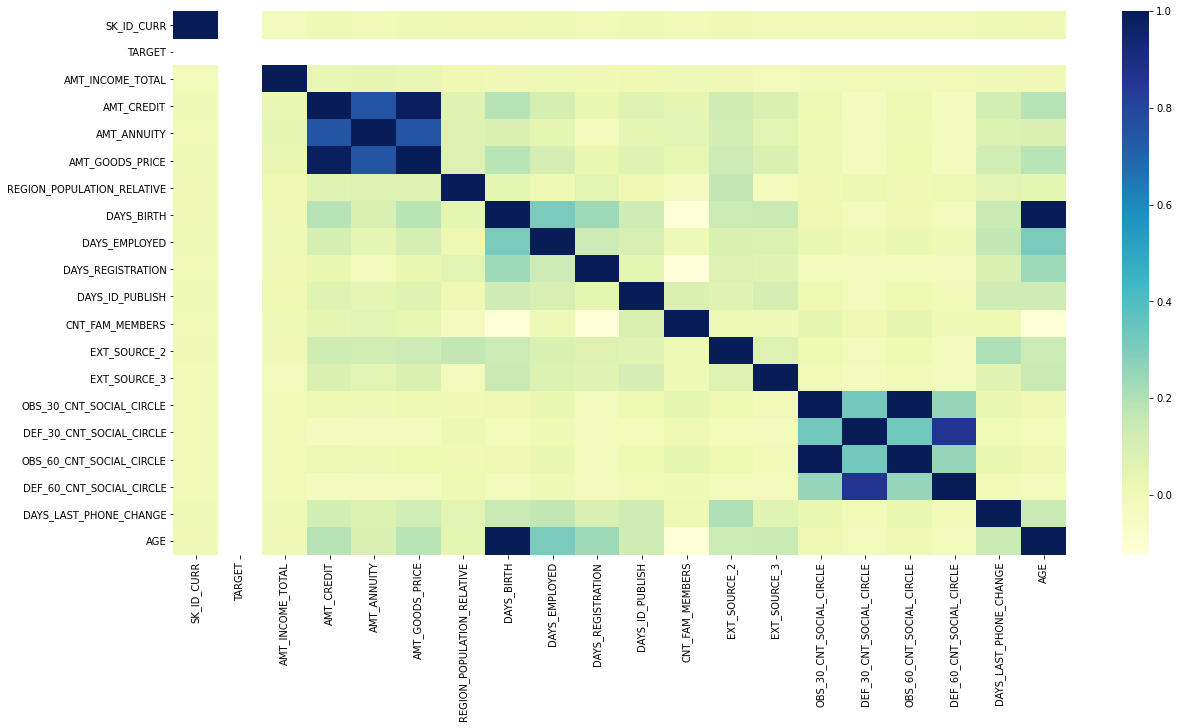

In [409]:
plt.figure(figsize=(20,10))
sns.heatmap(loan_default.corr(),cmap="YlGnBu")

### INference : There is high correlation between 
1. AMT_GOODS_PRICE- AMT_CREDIT,
2. AMT_CREDIT- AMT_ANNUITY,
3. AMT_GOODS_PRICE- AMT_ANNUITY,
4. OBS_30_CNT_SOCIAL_CIRCLE-OBS_60_CNT_SOCIAL_CIRCLE
5. DEF_30_CNT_SOCIAL_CIRCLE-DEF_60_CNT_SOCIAL_CIRCLE
6. DEF_30_CNT_SOCIAL_CIRCLE-OBS_60_CNT_SOCIAL_CIRCLE

#  <font color='blue'> 2 : Objective : Merge Application and previous application dataset to study the patterns to identify factors for applicants capable of repaying the loans are not rejected </font>

## Task 1: Reading Previous Application Dataset

In [421]:
prev_loan=pd.read_csv('previous_application.csv')

In [412]:
prev_loan.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Task 2: Previous app Data Preveiw 

In [413]:
prev_loan.shape

(1670214, 37)

In [414]:
prev_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [415]:
prev_loan.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

# Task 3: Previous application Data Quality Checks and Missing Value 

In [416]:
prev_loan.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [422]:
#Calculate the Percentage of missing values in each column 
def prev_missing_per(col):
    missing_colper=round(((col.isnull().sum())/len(col))*100,4)
    return missing_colper
prev_Nullper=prev_loan.apply(lambda x:prev_missing_per(x))
prev_Nullper


SK_ID_PREV                      0.0000
SK_ID_CURR                      0.0000
NAME_CONTRACT_TYPE              0.0000
AMT_ANNUITY                    22.2867
AMT_APPLICATION                 0.0000
AMT_CREDIT                      0.0001
AMT_DOWN_PAYMENT               53.6365
AMT_GOODS_PRICE                23.0818
WEEKDAY_APPR_PROCESS_START      0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
RATE_DOWN_PAYMENT              53.6365
RATE_INTEREST_PRIMARY          99.6437
RATE_INTEREST_PRIVILEGED       99.6437
NAME_CASH_LOAN_PURPOSE          0.0000
NAME_CONTRACT_STATUS            0.0000
DAYS_DECISION                   0.0000
NAME_PAYMENT_TYPE               0.0000
CODE_REJECT_REASON              0.0000
NAME_TYPE_SUITE                49.1198
NAME_CLIENT_TYPE                0.0000
NAME_GOODS_CATEGORY             0.0000
NAME_PORTFOLIO                  0.0000
NAME_PRODUCT_TYPE               0.0000
CHANNEL_TYPE             

In [423]:
# Covert Nullper Series into Dataframe with column name 
Nullper_df=prev_Nullper.to_frame()
Nullper_df.columns=['prev_Nullvalue%']

#Find the Name of columns having more than 40% null value

Col_50perplus_nullvalues=list(Nullper_df[Nullper_df['prev_Nullvalue%']>40.00].index)
print(Col_50perplus_nullvalues)


['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [424]:
# Drop all columns with more than or qual to 40% missing values

col_to_drop=Col_50perplus_nullvalues
prev_loan.drop(col_to_drop,axis=1,inplace=True)

prev_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [431]:
prev_loan.shape

(1670214, 26)

In [433]:
# Drop Unnessary Columns which are not very relevant for analysis :

columns_to_be_removed = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT']
prev_loan.drop(columns_to_be_removed, axis=1,inplace=True)

##### ->They are columns with x and y at end which indicates the data for previous and cuurent application data. So lets rename them.

In [434]:
prev_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

# Task 4: Check Outliers and Data Imbalance 
#### Also look for irregular data which corresponds to null value

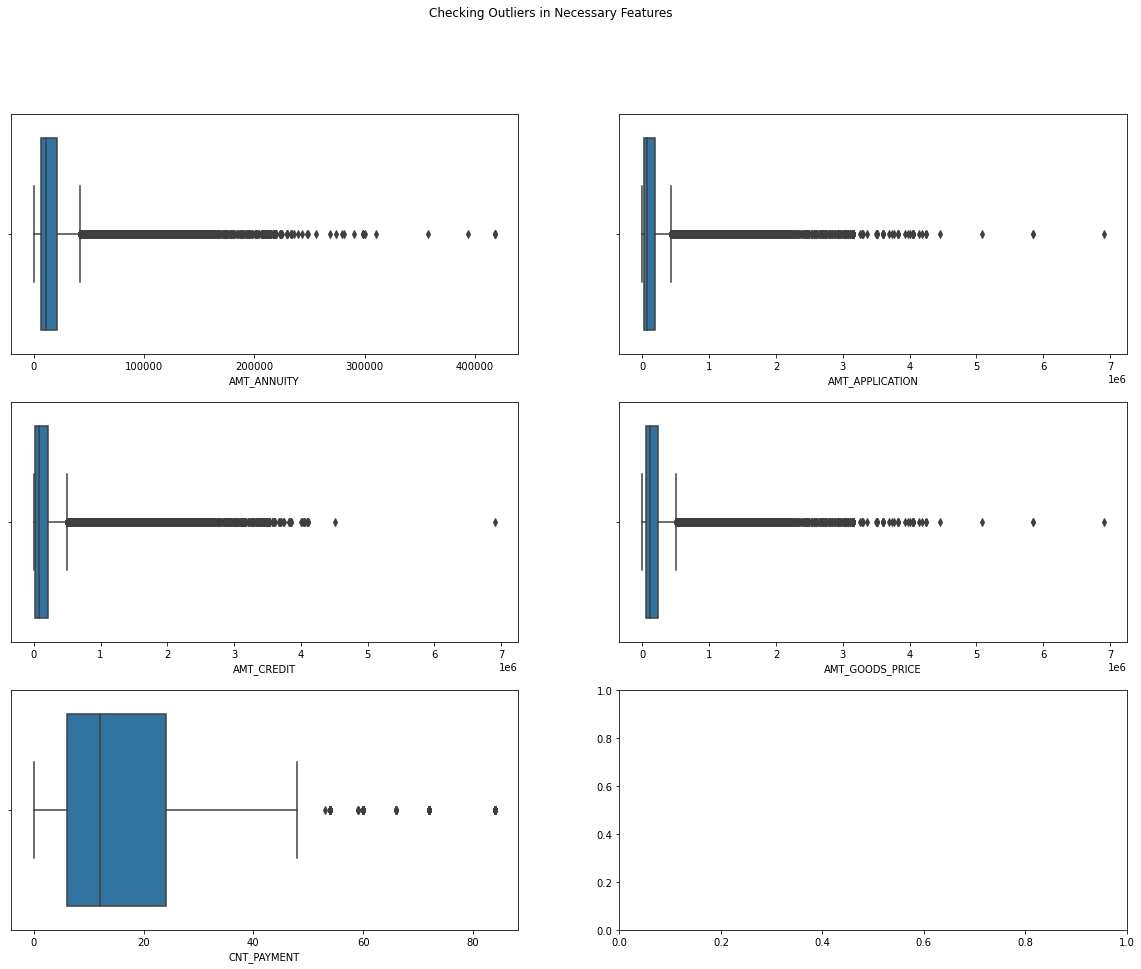

In [435]:
# AMT_ANNUITY
fig, axes=plt.subplots(3,2, figsize=(20,15))
plt.suptitle('Checking Outliers in Necessary Features')
sns.boxplot(ax=axes[0,0],x='AMT_ANNUITY',data=prev_loan)
sns.boxplot(ax=axes[0,1],x='AMT_APPLICATION',data=prev_loan)
sns.boxplot(ax=axes[1,0],x='AMT_CREDIT',data=prev_loan)
sns.boxplot(ax=axes[1,1],x='AMT_GOODS_PRICE',data=prev_loan)
sns.boxplot(ax=axes[2,0],x='CNT_PAYMENT',data=prev_loan)

#Inference : We observed outliers in all the above mentioned variable

In [437]:
# Dropping XNA values

prev_loan['NAME_CONTRACT_TYPE'].value_counts()
prev_loan=prev_loan[~((prev_loan['NAME_CONTRACT_TYPE']=='XNA') | (prev_loan['NAME_CONTRACT_TYPE']=='XAP'))]
prev_loan.shape

(1669868, 22)

In [439]:
prev_loan.shape

(1669868, 22)

In [440]:
prev_loan['NAME_CASH_LOAN_PURPOSE'].value_counts()
prev_loan.drop('NAME_CASH_LOAN_PURPOSE',axis=1)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  \
0                17145.0     17145.0          17145.0             Approved   
1               607500.0    679671.0         607500.0             Approved   
2               112500.0    136444.5         112500.0             Approved   
3               450000.0    470790.0         450000.0             Approved   
4               337500.0    404055.0         337500.0              Refused   
...                  ...         ...              ...                  ...   
1670209         267295.5    311400.0         267295.5             Approved   
1670210          87750.0     64291.5          87750.0             Approved   
1670211         105237.0    102523.5         105237.0             Approved   
1670212         180000.0    191880.0         180000.0             Approved   
1670213         360000.0    360000.0         360000.0             Approved   

         DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0                  -73  Cash through the bank                XAP   
1                 -164                    XNA                XAP   
2                 -301  Cash through the bank                XAP   
3                 -512  Cash through the bank                XAP   
4                 -781  Cash through the bank                 HC   
...                ...                    ...                ...   
1670209           -544  Cash through the bank                XAP   
1670210          -1694  Cash through the bank                XAP   
1670211          -1488  Cash through the bank                XAP   
1670212          -1185  Cash through the bank                XAP   
1670213          -1193  Cash through the bank                XAP   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0               Repeater                Mobile            POS   
1               Repeater                   XNA           Cash   
2               Repeater                   XNA           Cash   
3               Repeater                   XNA           Cash   
4               Repeater                   XNA           Cash   
...                  ...                   ...            ...   
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0                     XNA             Country-wide                35   
1                  x-sell           Contact center                -1   
2                  x-sell  Credit and cash offices                -1   
3                  x-sell  Credit and cash offices                -1   
4                 walk-in  Credit and cash offices                -1   
...                   ...                      ...               ...   
1670209               XNA                    Stone                43   
1670210               XNA                    Stone                43   
1670211              

In [441]:
prev_loan['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316004
Refused          290647
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [442]:
prev_loan['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627038
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [443]:
prev_loan['CODE_REJECT_REASON'].value_counts()

XAP       1352778
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [446]:
prev_loan['NAME_CLIENT_TYPE'].value_counts()

Repeater     1230960
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [447]:
#Observe XNA values in NAME_CLIENT_TYPE columns and we can drop the rows the xna values as the xna value percentage is 0.104%
print(merge_df.NAME_CLIENT_TYPE.value_counts())

x=((len(merge_df[merge_df['NAME_CLIENT_TYPE']=='XNA'])/len(merge_df))*100)

print("XNA value % ="+str(x))
print('\n')

merge_df=merge_df[~(merge_df['NAME_CLIENT_TYPE']=='XNA')]

Repeater     247744
New           64253
Refreshed     28455
Name: NAME_CLIENT_TYPE, dtype: int64
XNA value % =0.0




In [448]:
prev_loan['NAME_GOODS_CATEGORY'].value_counts()

XNA                         950463
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

In [449]:
prev_loan['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      371884
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [450]:
prev_loan['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063320
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [451]:
prev_loan['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719965
Country-wide                  494348
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57045
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [452]:
prev_loan['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855716
Consumer electronics    398265
Connectivity            275687
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [453]:
print(prev_loan['NAME_YIELD_GROUP'].value_counts())


XNA           516869
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64


In [454]:
print(prev_loan['PRODUCT_COMBINATION'].value_counts())

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64


In [455]:
# We see XNA,XAP values in column : So we can drop colunns  with evry high XNA and XAP values adding to above 50%
xna_xap_col=['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
             'NAME_PORTFOLIO','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']


## TASK 5 : Perform Binning :

In [474]:
# Bin AMT_APPLICATION

values= [0,100000,200000,300000,400000,500000,600000,700000,1000000000000000]
Range=['Below 100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','Above 700000']

prev_loan['Bin_AMT_APPLICATION_y']=pd.cut(prev_loan['AMT_APPLICATION'],bins=values,labels=Range)


In [475]:
prev_loan.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0           middle  POS mobile with interest   
1         36.0       low_action          Cash X-Sell: low   
2         12.0             high         Cash X-Sell: high   
3         12.0           middle       Cash X-Sell: middle   
4         24.0             high         Cash Street: high   

  Bin_AMT_APPLICATION_y  
0          Below 100000  
1         600000-700000  
2         100000-200000  
3         400000-500000  
4         300000-400000

In [476]:
prev_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669868 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1669868 non-null  int64   
 1   SK_ID_CURR              1669868 non-null  int64   
 2   NAME_CONTRACT_TYPE      1669868 non-null  object  
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1669868 non-null  float64 
 5   AMT_CREDIT              1669867 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1669868 non-null  object  
 8   NAME_CONTRACT_STATUS    1669868 non-null  object  
 9   DAYS_DECISION           1669868 non-null  int64   
 10  NAME_PAYMENT_TYPE       1669868 non-null  object  
 11  CODE_REJECT_REASON      1669868 non-null  object  
 12  NAME_CLIENT_TYPE        1669868 non-null  object  
 13  NAME_GOODS_CATEGORY     1669868 non-null  

# Task 6 : 20% Merge Application Data and Previous application data

In [458]:
print(len(prev_loan))
print(len(new_loan))


1669868
251015


In [477]:
# Merge application and previous application data set on SK_ID_CURR
merge_old_curr=pd.merge(new_loan,prev_loan,on='SK_ID_CURR',how='inner')
merge_old_curr.shape

(1136024, 59)

In [478]:
# Check 30% from merge df
len(merge_old_curr)*.30

340807.2

In [479]:
#Take top  30% data from merged dataframe to perform further analysis
merge_df=merge_old_curr.head(340807)

In [480]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340807 entries, 0 to 340806
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   340807 non-null  int64   
 1   TARGET                       340807 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         340807 non-null  object  
 3   CODE_GENDER                  340807 non-null  object  
 4   FLAG_OWN_CAR                 340807 non-null  object  
 5   FLAG_OWN_REALTY              340807 non-null  object  
 6   AMT_INCOME_TOTAL             340807 non-null  float64 
 7   AMT_CREDIT_x                 340807 non-null  float64 
 8   AMT_ANNUITY_x                340807 non-null  float64 
 9   AMT_GOODS_PRICE_x            340807 non-null  float64 
 10  NAME_INCOME_TYPE             340807 non-null  object  
 11  NAME_EDUCATION_TYPE          340807 non-null  object  
 12  NAME_FAMILY_STATUS           340807 non-null

In [497]:
merge_df = merge_df.rename({"NAME_CONTRACT_TYPE_x" : "NAME_CONTRACT_TYPE_CUR", "AMT_CREDIT_x" : "AMT_CREDIT_CUR", "AMT_ANNUITY_x" : "AMT_ANNUITY_CUR", 
                            "AMT_GOODS_PRICE_x" : "AMT_GOODS_PRICE_CUR", "NAME_CONTRACT_TYPE_y" : "NAME_CONTRACT_TYPE_PRE", 
                            "AMT_ANNUITY_y" : "AMT_ANNUITY_PRE", "AMT_CREDIT_y" : "AMT_CREDIT_PRE", "AMT_GOODS_PRICE_y" : "AMT_GOODS_PRICE_PRE"},axis=1)


In [464]:

merge_df['TARGET'].value_counts()


0    309106
1     31701
Name: TARGET, dtype: int64

In [227]:
# Columns with xna xap values in previous application dataset
xna_xap_col=['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
             'NAME_PORTFOLIO','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

In [498]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340807 entries, 0 to 340806
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   340807 non-null  int64   
 1   TARGET                       340807 non-null  int64   
 2   NAME_CONTRACT_TYPE_CUR       340807 non-null  object  
 3   CODE_GENDER                  340807 non-null  object  
 4   FLAG_OWN_CAR                 340807 non-null  object  
 5   FLAG_OWN_REALTY              340807 non-null  object  
 6   AMT_INCOME_TOTAL             340807 non-null  float64 
 7   AMT_CREDIT_CUR               340807 non-null  float64 
 8   AMT_ANNUITY_CUR              340807 non-null  float64 
 9   AMT_GOODS_PRICE_CUR          340807 non-null  float64 
 10  NAME_INCOME_TYPE             340807 non-null  object  
 11  NAME_EDUCATION_TYPE          340807 non-null  object  
 12  NAME_FAMILY_STATUS           340807 non-null

In [499]:
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CUR CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100003       0             Cash loans           F            N   
4      100004       0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT_CUR  AMT_ANNUITY_CUR  \
0               Y          202500.0        406597.5          24700.5   
1               N          270000.0       1293502.5          35698.5   
2               N          270000.0       1293502.5          35698.5   
3               N          270000.0       1293502.5          35698.5   
4               Y           67500.0        135000.0           6750.0   

   AMT_GOODS_PRICE_CUR NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             351000.0          Working  Secondary / secondary special   
1            1129500.0    State servant               Higher education   
2            1129500.0    State servant               Higher education   
3            1129500.0    State servant               Higher education   
4             135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       16765           1188               1186              291   
3       16765           1188               1186              291   
4       19046            225               4260             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0        Laborers                1                    2   
1      Core staff                2                    1   
2      Core staff                2                    1   
3      Core staff                2                    1   
4        Laborers                1                    2   

  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           2  Business Entity Type 3      0.262949   
1                           1                  School      0.622246   
2                           1                  School      0.622246   
3                           1                  School      0.622246   
4                           2              Government      0.555912   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                         2                         2   
1           NaN                         1                         0   
2           NaN                         1                         0   
3           NaN                         1                         0   
4      0.729567                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                    1134   
1                         1                         0                     828   
2                         1                         0                     828   
3                         1                         0                     828   
4                         0                         0                     815   

  AMT_Bin_Incometotal AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  \
0       200000-300000       400000-600000     20000-300

# Task 7 Univariant and Bivariant Analysis :

### 1. UNIVARIANT ANALYSIS

In [500]:
merge_nondefault=merge_df[merge_df['TARGET']==0]
merge_nondefault.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CUR CODE_GENDER FLAG_OWN_CAR  \
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100003       0             Cash loans           F            N   
4      100004       0        Revolving loans           M            Y   
5      100006       0             Cash loans           F            N   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT_CUR  AMT_ANNUITY_CUR  \
1               N          270000.0       1293502.5          35698.5   
2               N          270000.0       1293502.5          35698.5   
3               N          270000.0       1293502.5          35698.5   
4               Y           67500.0        135000.0           6750.0   
5               Y          135000.0        312682.5          29686.5   

   AMT_GOODS_PRICE_CUR NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1            1129500.0    State servant               Higher education   
2            1129500.0    State servant               Higher education   
3            1129500.0    State servant               Higher education   
4             135000.0          Working  Secondary / secondary special   
5             297000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   
5        Civil marriage  House / apartment                    0.008019   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1       16765           1188               1186              291   
2       16765           1188               1186              291   
3       16765           1188               1186              291   
4       19046            225               4260             2531   
5       19005           3039               9833             2437   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
1      Core staff                2                    1   
2      Core staff                2                    1   
3      Core staff                2                    1   
4        Laborers                1                    2   
5        Laborers                2                    2   

  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
1                           1                  School      0.622246   
2                           1                  School      0.622246   
3                           1                  School      0.622246   
4                           2              Government      0.555912   
5                           2  Business Entity Type 3      0.650442   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1           NaN                         1                         0   
2           NaN                         1                         0   
3           NaN                         1                         0   
4      0.729567                         0                         0   
5           NaN                         2                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                         1                         0                     828   
2                         1                         0                     828   
3                         1                         0                     828   
4                         0                         0                     815   
5                         2                         0                     617   

  AMT_Bin_Incometotal AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  \
1       200000-300000     1200000-1400000     30000-400

In [501]:
merge_default=merge_df[merge_df['TARGET']==1]
merge_default.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CUR CODE_GENDER FLAG_OWN_CAR  \
0        100002       1             Cash loans           M            N   
148      100047       1             Cash loans           M            N   
149      100047       1             Cash loans           M            N   
150      100047       1             Cash loans           M            N   
151      100047       1             Cash loans           M            N   

    FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT_CUR  AMT_ANNUITY_CUR  \
0                 Y          202500.0        406597.5          24700.5   
148               Y          202500.0       1193580.0          35028.0   
149               Y          202500.0       1193580.0          35028.0   
150               Y          202500.0       1193580.0          35028.0   
151               Y          202500.0       1193580.0          35028.0   

     AMT_GOODS_PRICE_CUR      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               351000.0               Working  Secondary / secondary special   
148             855000.0  Commercial associate  Secondary / secondary special   
149             855000.0  Commercial associate  Secondary / secondary special   
150             855000.0  Commercial associate  Secondary / secondary special   
151             855000.0  Commercial associate  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0    Single / not married  House / apartment                    0.018801   
148               Married  House / apartment                    0.025164   
149               Married  House / apartment                    0.025164   
150               Married  House / apartment                    0.025164   
151               Married  House / apartment                    0.025164   

     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0          9461            637               3648             2120   
148       17482           1262               1182             1029   
149       17482           1262               1182             1029   
150       17482           1262               1182             1029   
151       17482           1262               1182             1029   

    OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0          Laborers                1                    2   
148        Laborers                2                    2   
149        Laborers                2                    2   
150        Laborers                2                    2   
151        Laborers                2                    2   

    REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                             2  Business Entity Type 3      0.262949   
148                           2  Business Entity Type 3      0.306841   
149                           2  Business Entity Type 3      0.306841   
150                           2  Business Entity Type 3      0.306841   
151                           2  Business Entity Type 3      0.306841   

     EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0        0.139376                         2                         2   
148      0.320163                         0                         0   
149      0.320163                         0                         0   
150      0.320163                         0                         0   
151      0.320163                         0                         0   

     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                           2                         2   
148                         0                         0   
149                         0                         0   
150                         0                         0   
151                         0                         0   

     DAYS_LAST_PHONE_CHANGE AMT_Bin_Incometotal AMT_Bin_TotalCREDIT  \
0                      1134       200000-300000       400000-600000   
14

In [502]:
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CUR CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100003       0             Cash loans           F            N   
4      100004       0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT_CUR  AMT_ANNUITY_CUR  \
0               Y          202500.0        406597.5          24700.5   
1               N          270000.0       1293502.5          35698.5   
2               N          270000.0       1293502.5          35698.5   
3               N          270000.0       1293502.5          35698.5   
4               Y           67500.0        135000.0           6750.0   

   AMT_GOODS_PRICE_CUR NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             351000.0          Working  Secondary / secondary special   
1            1129500.0    State servant               Higher education   
2            1129500.0    State servant               Higher education   
3            1129500.0    State servant               Higher education   
4             135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       16765           1188               1186              291   
3       16765           1188               1186              291   
4       19046            225               4260             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0        Laborers                1                    2   
1      Core staff                2                    1   
2      Core staff                2                    1   
3      Core staff                2                    1   
4        Laborers                1                    2   

  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           2  Business Entity Type 3      0.262949   
1                           1                  School      0.622246   
2                           1                  School      0.622246   
3                           1                  School      0.622246   
4                           2              Government      0.555912   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                         2                         2   
1           NaN                         1                         0   
2           NaN                         1                         0   
3           NaN                         1                         0   
4      0.729567                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                    1134   
1                         1                         0                     828   
2                         1                         0                     828   
3                         1                         0                     828   
4                         0                         0                     815   

  AMT_Bin_Incometotal AMT_Bin_TotalCREDIT AMT_Bin_ANNUITY AMT_Bin_GOODS_PRICE  \
0       200000-300000       400000-600000     20000-300

### 1. Comparison of AMT_APPLICATION_PRE in deafult(1) and non default(1)

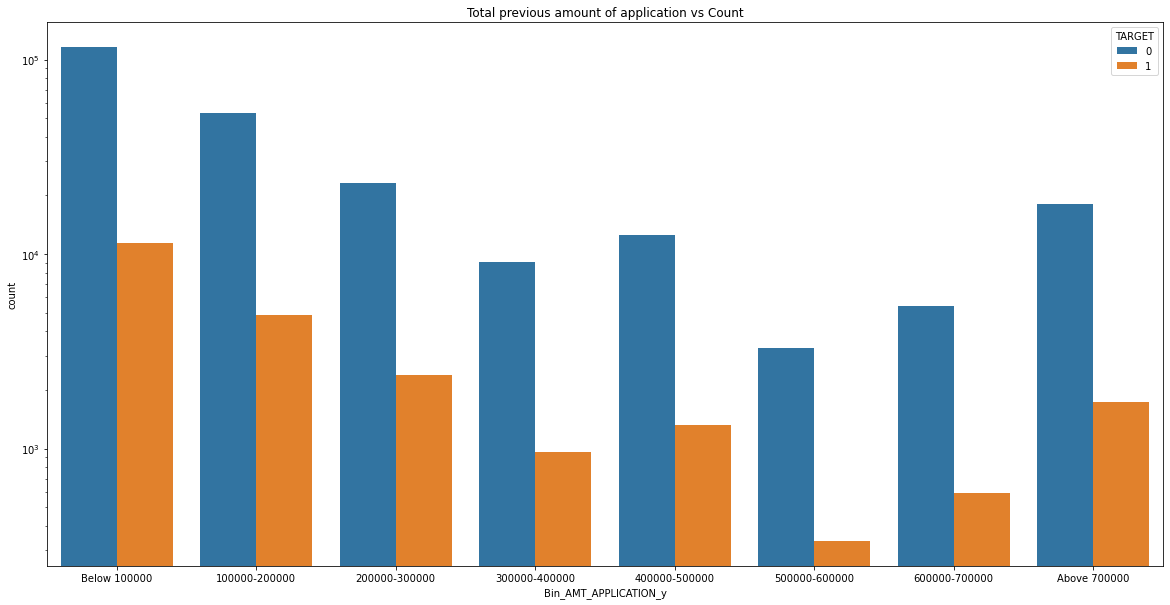

In [487]:

plt.figure(figsize=(20,10))
plt.title('Total previous amount of application vs Count')
plt.yscale("log")
sns.countplot(x='Bin_AMT_APPLICATION_y',data=merge_df,hue='TARGET')

#Inference : 1. people with previous application amount within 500000-600000 are more likely to be Non-Defaulty 


## 2. Comparison of NAME_CONTRACT_STATUS  in deafult(1) and non default(1)

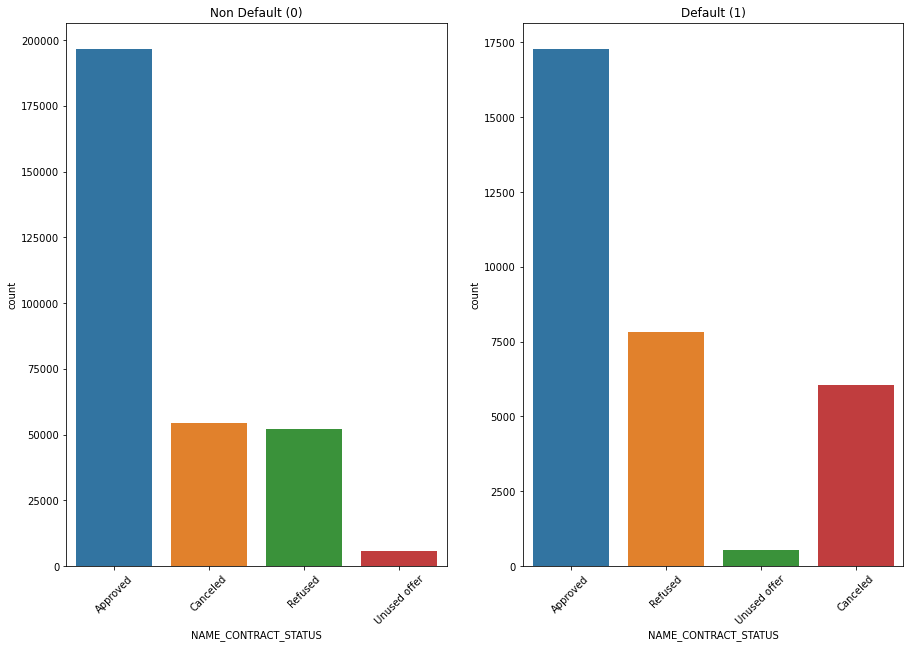

In [503]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('Non Default (0)')
sns.countplot(x='NAME_CONTRACT_STATUS',data=merge_nondefault)

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Default (1)')
sns.countplot(x='NAME_CONTRACT_STATUS',data=merge_default)

#INference : People with the contract status type approved are more likely to repay their loans that is non-defaulty as 
#t has higher value in Non-deafult graph and also in Default 

### 3. COMPARISION of NAME_CLIENT_TYPE in DEfault vs NOn-feault 

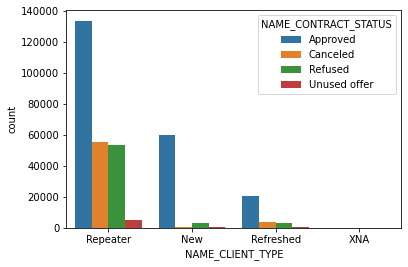

In [504]:
Points = merge_df['NAME_CLIENT_TYPE'].value_counts().index
sns.countplot(data = merge_df, x= 'NAME_CLIENT_TYPE', order=Points,hue = 'NAME_CONTRACT_STATUS')
plt.show()

#####  INFERENCE : The people who are repeating the loan process again and again are more likely to be approved for the loan.

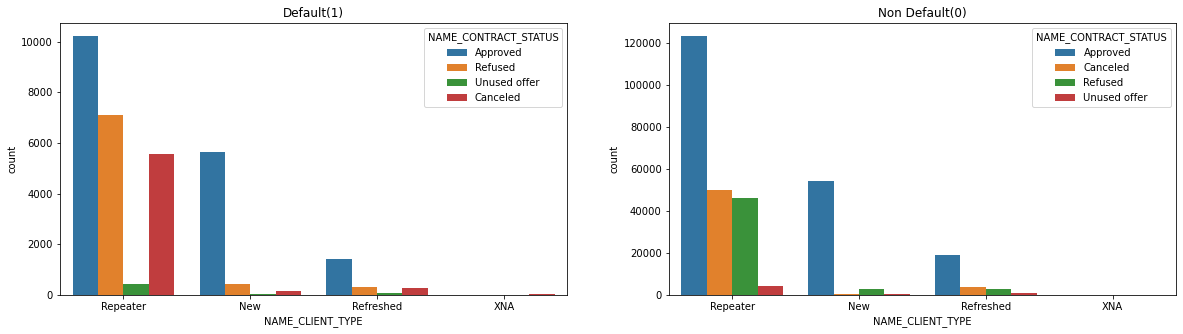

In [505]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.countplot(ax=axes[0], data = merge_default, x= 'NAME_CLIENT_TYPE', order=merge_default['NAME_CLIENT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS').set_title('Default(1)')

sns.countplot(ax=axes[1], data = merge_nondefault, x= 'NAME_CLIENT_TYPE', order=merge_nondefault['NAME_CLIENT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS').set_title('Non Default(0)')

plt.show()



#####  INFERENCE : In both the default and non default cases the person has repeated  loans are morely like to have approved applications compared to the other category ones.

## 4.  Now Compare the loan purpose for Deafult vs Non Default .

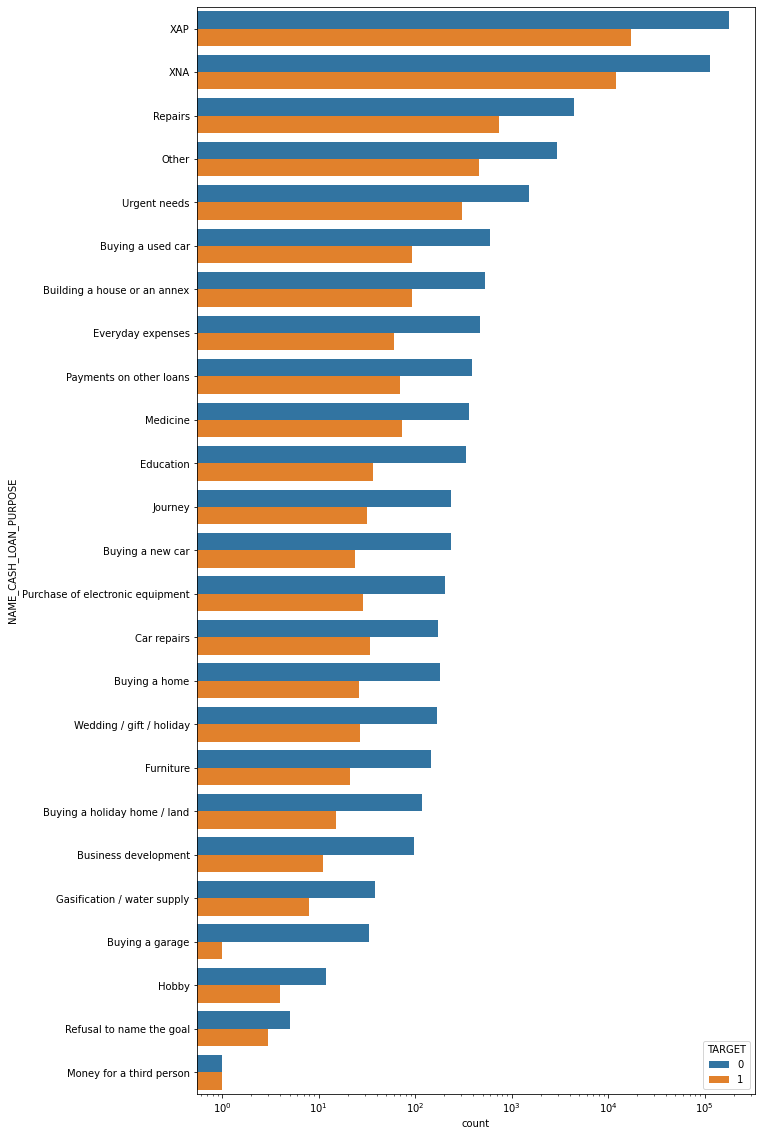

In [506]:
plt.figure(figsize=(10,20))
Points = merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index
sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=Points,hue = 'TARGET').set_xscale("log")
plt.show()

#####  INFERENCE : 1. People taking loans for  purpose "Buying a garage" is more likely to repay loan as there are more Non-Defaulty poeple in this catregory as compare to Default 
##### 2. Poeple taking loan for repair purpose are less likely to repay loan 

### 5. COMPARISION of NAME_GOODS_CATEGORY in DEfault vs NOn-feault 

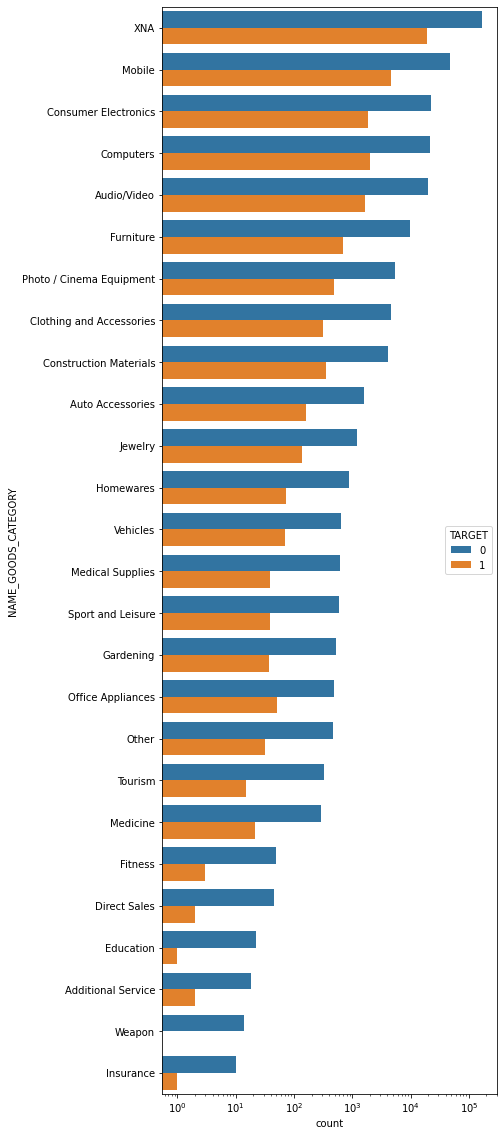

In [507]:
plt.figure(figsize=(6,20))
Points = merge_df['NAME_GOODS_CATEGORY'].value_counts().index
sns.countplot(data = merge_df, y= 'NAME_GOODS_CATEGORY', order=Points,hue = 'TARGET').set_xscale("log")
plt.show()

# INference : 1. Observe a large number of XNA values which should be treated.
# 2. There are no(0) defaulty people observed in Goods category "WEAPON" so people taking loan for weapon category are most likely to repay loans
#3. The category of mobile has the Highest rate on not paying the loan compared to all other categories.


### 6. COMPARISION of NAME_PAYMENT_TYPE in DEfault vs NOn-feault 

In [508]:
#Observe high number of XNA values 
merge_df.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        213236
XNA                                          125656
Non-cash from your account                     1674
Cashless from the account of the employer       241
Name: NAME_PAYMENT_TYPE, dtype: int64

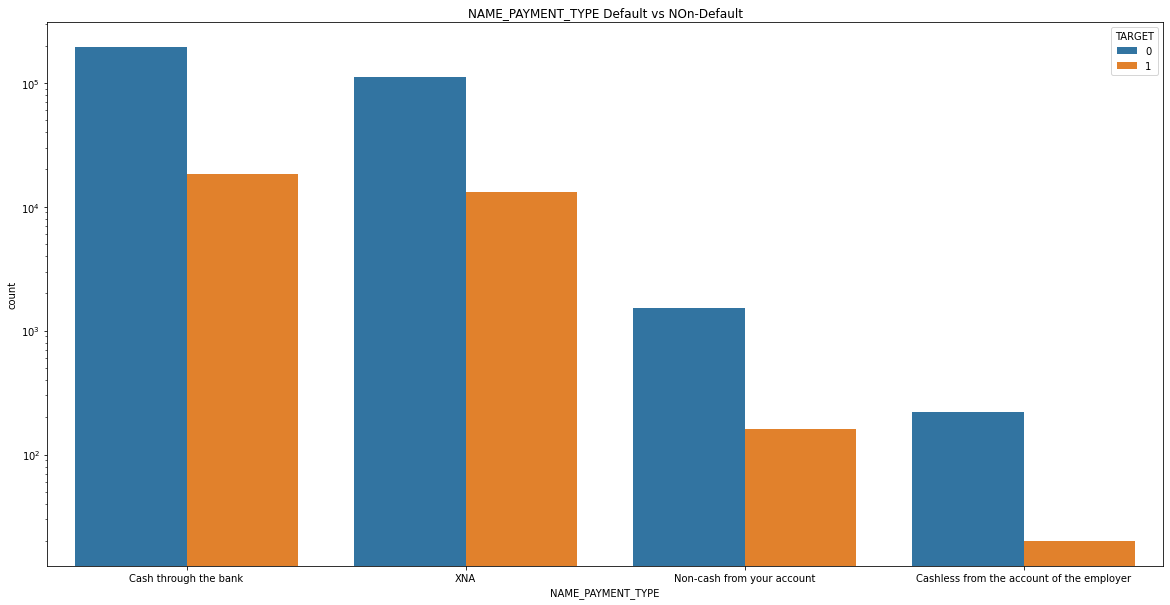

In [509]:
plt.figure(figsize=(20,10))
Points = merge_df['NAME_PAYMENT_TYPE'].value_counts().index
plt.title('NAME_PAYMENT_TYPE Default vs NOn-Default')
sns.countplot(data = merge_df, x= 'NAME_PAYMENT_TYPE', order=Points,hue = 'TARGET').set_yscale("log")
plt.show()

### INFERENCE :NAME_PAYMENT_TYPE Default vs NOn-Default'

##### .1. People with loan payment menthod of " Cashless from the account of the employer" have high rate of repaying the loan.
#### 2. From the above plot people who are paying the amount by "Cash through bank" has significantly both high in default and non default beacause of high in count

#  II- Bivariant analysis

### 1. COMPARISION of Amount Credit previous and housing type.

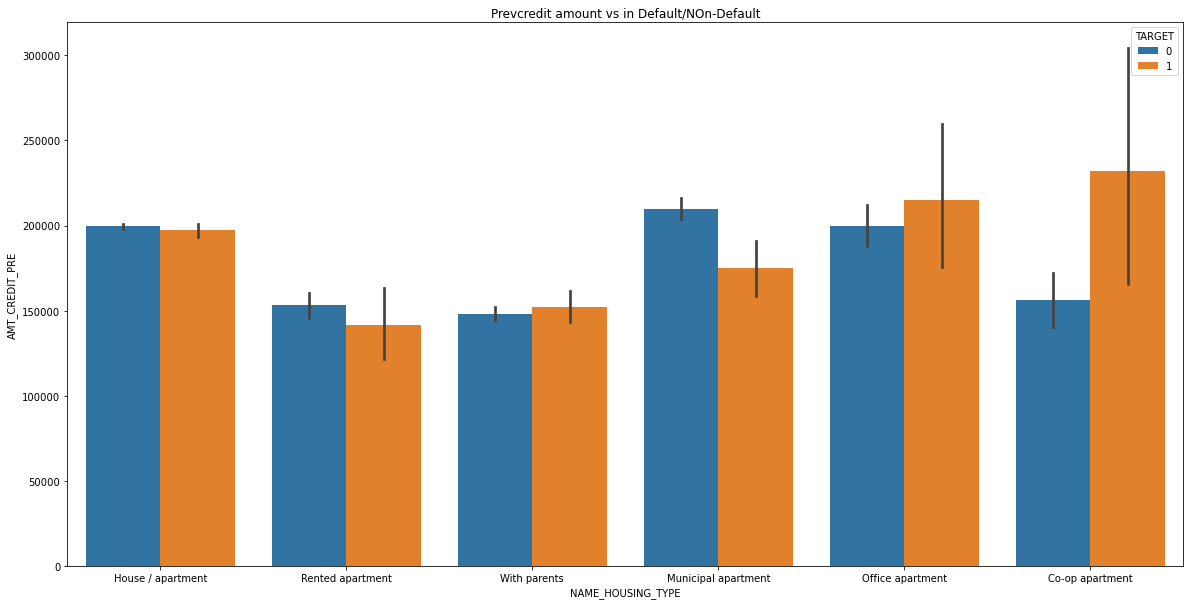

In [510]:
plt.figure(figsize=(20,10))
plt.title('Prevcredit amount vs in Default/NOn-Default')
sns.barplot(data = merge_df, x= 'NAME_HOUSING_TYPE', y="AMT_CREDIT_PRE" ,hue = 'TARGET')

plt.show()

### INFERENCE :
##### 1/ From the above we can say that people with housing type "Co-op apartment " are more likely to be deafulty 
##### 2. People with housing type  as "Municipal Apartments" are more likely to repay loans  and more likely to be non-defaulty 

In [511]:
merge_df.corr()

SK_ID_CURR    TARGET  AMT_INCOME_TOTAL  \
SK_ID_CURR                    1.000000  0.001712         -0.003691   
TARGET                        0.001712  1.000000          0.003332   
AMT_INCOME_TOTAL             -0.003691  0.003332          1.000000   
AMT_CREDIT_CUR               -0.003012 -0.037098          0.089377   
AMT_ANNUITY_CUR              -0.007523 -0.011528          0.109255   
AMT_GOODS_PRICE_CUR          -0.002544 -0.046900          0.090263   
REGION_POPULATION_RELATIVE   -0.001651 -0.036094          0.041368   
DAYS_BIRTH                   -0.001588 -0.060110          0.014279   
DAYS_EMPLOYED                -0.008052 -0.071818          0.008032   
DAYS_REGISTRATION             0.004641 -0.031481         -0.004970   
DAYS_ID_PUBLISH               0.002811 -0.038067          0.006000   
CNT_FAM_MEMBERS              -0.002992 -0.000288         -0.000424   
EXT_SOURCE_2                 -0.002483 -0.162885          0.030431   
EXT_SOURCE_3                 -0.009704 -0.191324         -0.019451   
OBS_30_CNT_SOCIAL_CIRCLE      0.003035  0.014572         -0.008465   
DEF_30_CNT_SOCIAL_CIRCLE     -0.003200  0.031487         -0.009167   
OBS_60_CNT_SOCIAL_CIRCLE      0.002906  0.014823         -0.008471   
DEF_60_CNT_SOCIAL_CIRCLE     -0.005986  0.033552         -0.008101   
DAYS_LAST_PHONE_CHANGE       -0.001538 -0.065463          0.011186   
AGE                          -0.001476 -0.060446          0.014384   
SK_ID_PREV                    0.002122  0.002002         -0.000841   
AMT_ANNUITY_PRE              -0.004890 -0.017172          0.066844   
AMT_APPLICATION              -0.004436 -0.007312          0.039570   
AMT_CREDIT_PRE               -0.004345 -0.003701          0.038723   
AMT_GOODS_PRICE_PRE          -0.004791  0.000061          0.043607   
DAYS_DECISION                 0.000514  0.047035          0.001202   
SELLERPLACE_AREA              0.000500 -0.010653          0.002014   
CNT_PAYMENT                  -0.002954  0.032591          0.013608   

                            AMT_CREDIT_CUR  AMT_ANNUITY_CUR  \
SK_ID_CURR                       -0.003012        -0.007523   
TARGET                           -0.037098        -0.011528   
AMT_INCOME_TOTAL                  0.089377         0.109255   
AMT_CREDIT_CUR                    1.000000         0.749892   
AMT_ANNUITY_CUR                   0.749892         1.000000   
AMT_GOODS_PRICE_CUR               0.985429         0.753729   
REGION_POPULATION_RELATIVE        0.085490         0.098901   
DAYS_BIRTH                        0.154765         0.074305   
DAYS_EMPLOYED                     0.093070         0.048119   
DAYS_REGISTRATION                 0.029533        -0.008553   
DAYS_ID_PUBLISH                   0.025198         0.010243   
CNT_FAM_MEMBERS                   0.036692         0.054290   
EXT_SOURCE_2                      0.128328         0.111603   
EXT_SOURCE_3                      0.062909         0.033900   
OBS_30_CNT_SOCIAL_CIRCLE          0.004945        -0.003896   
DEF_30_CNT_SOCIAL_CIRCLE         -0.017298        -0.020314   
OBS_60_CNT_SOCIAL_CIRCLE          0.005395        -0.003279   
DEF_60_CNT_SOCIAL_CIRCLE         -0.019079        -0.019253   
DAYS_LAST_PHONE_CHANGE            0.098115         0.073476   
AGE                               0.154830         0.074392   
SK_ID_PREV                       -0.000743         0.001768   
AMT_ANNUITY_PRE                   0.148118         0.193567   
AMT_APPLICATION                   0.117051         0.109930   
AMT_CREDIT_PRE                    0.113626         0.104581   
AMT_GOODS_PRICE_PRE               0.134002         0.130123   
DAYS_DECISION                    -0.068129        -0.039685   
SELLERPLACE_AREA                  0.017865         0.018348   
CNT_PAYMENT                       0.041107         0.003452   

                            AMT_GOODS_PRICE_CUR  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                            -0.002544                   -0.001651   
TARGET     

### 2. Comparison of AMT_GOODS_PRICE_PRE vs AMT_ANNUITY_PRE in loan default (1) and non-default(0)

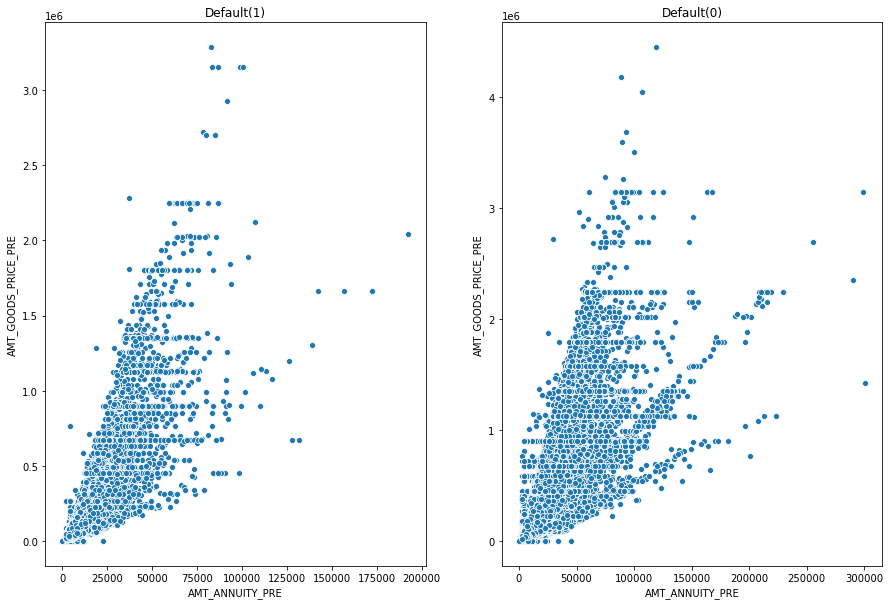

In [512]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Default(1)')
sns.scatterplot(x='AMT_ANNUITY_PRE',y='AMT_GOODS_PRICE_PRE',data=merge_default)


plt.subplot(1,2,2)
plt.title('Default(0)')
sns.scatterplot(x='AMT_ANNUITY_PRE',y='AMT_GOODS_PRICE_PRE',data=merge_nondefault)

#Inference : AMT_ANNUITY_PRE and AMT_GOODS_PRICE_PRE are linearly correlated in a postive direction : Prev application Annutiy amount increases with increase in amount AMT_GOODS_PRICE_PRE

### 3. Comparison of AMT_GOODS_PRICE_PRE vs AMT_APPLICATION in loan default (1) and non-default(0)

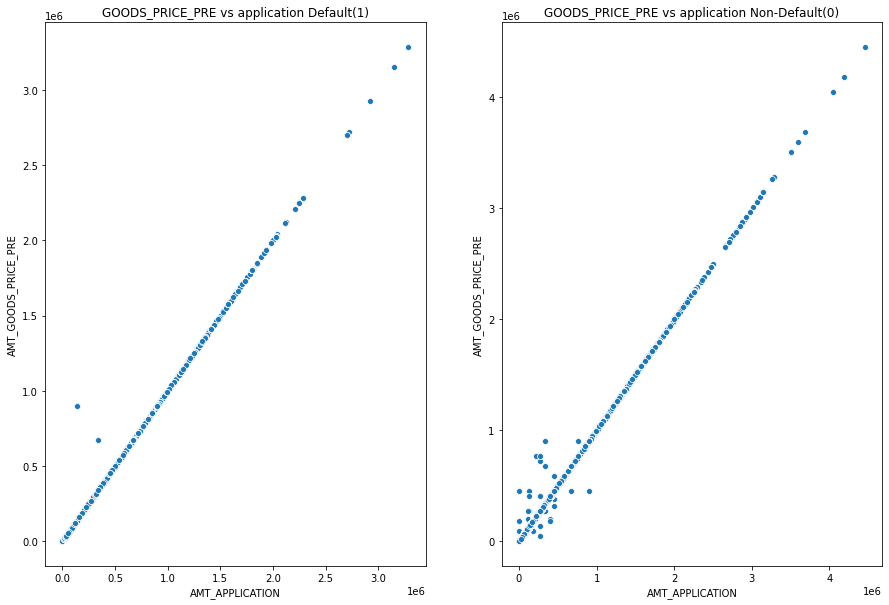

In [513]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('GOODS_PRICE_PRE vs application Default(1)')
sns.scatterplot(x='AMT_APPLICATION',y='AMT_GOODS_PRICE_PRE',data=merge_default)


plt.subplot(1,2,2)
plt.title('GOODS_PRICE_PRE vs application Non-Default(0)')
sns.scatterplot(x='AMT_APPLICATION',y='AMT_GOODS_PRICE_PRE',data=merge_nondefault)

#Inference : AMT_APPLICATION  and AMT_GOODS_PRICE_PRE are highly- linearly correlated in a postive direction : application amount increases with increase in amount AMT_GOODS_PRICE_PRE

### 4. Comparison of AMT_GOODS_PRICE_PRE vs AMT_CREDIT_PRE in loan default (1) and non-default(0)

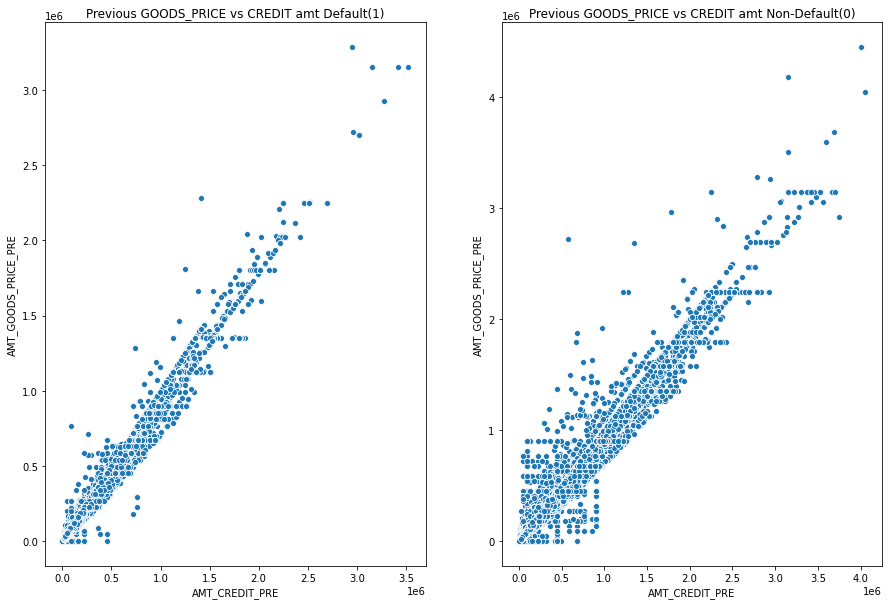

In [514]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Previous GOODS_PRICE vs CREDIT amt Default(1)')
sns.scatterplot(x='AMT_CREDIT_PRE',y='AMT_GOODS_PRICE_PRE',data=merge_default)


plt.subplot(1,2,2)
plt.title('Previous GOODS_PRICE vs CREDIT amt Non-Default(0)')
sns.scatterplot(x='AMT_CREDIT_PRE',y='AMT_GOODS_PRICE_PRE',data=merge_nondefault)

#Inference :AMT_CREDIT_PRE  and AMT_GOODS_PRICE_PRE are highly- linearly correlated in a postive direction : AMT_CREDIT_PRE increases with increase in amount AMT_GOODS_PRICE_PRE

### 5. Comparison of AMT_ANNUITY_PRE vs AMT_APPLICATION in loan default (1) and non-default(0)

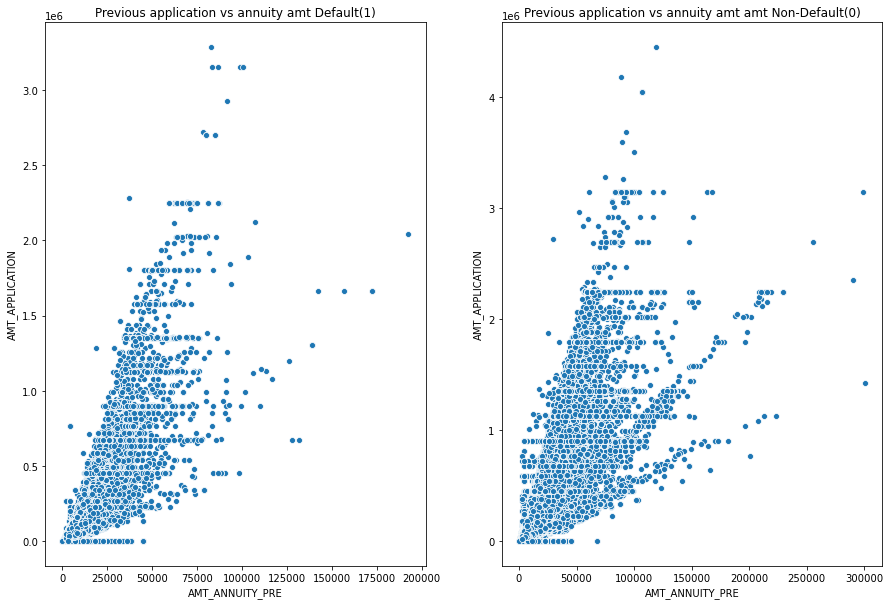

In [515]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Previous application vs annuity amt Default(1)')
sns.scatterplot(x='AMT_ANNUITY_PRE',y='AMT_APPLICATION',data=merge_default)


plt.subplot(1,2,2)
plt.title('Previous application vs annuity amt amt Non-Default(0)')
sns.scatterplot(x='AMT_ANNUITY_PRE',y='AMT_APPLICATION',data=merge_nondefault)

#Inference :AMT_APPLICATION  and AMT_ANNUITY_PRE are linearly correlated in a postive direction : AMT_ANNUITY_PRE increases with increase in AMT_APPLICATION

### 5. Comparison of AMT_CREDIT_PRE vs AMT_APPLICATION in loan default (1) and non-default(0)

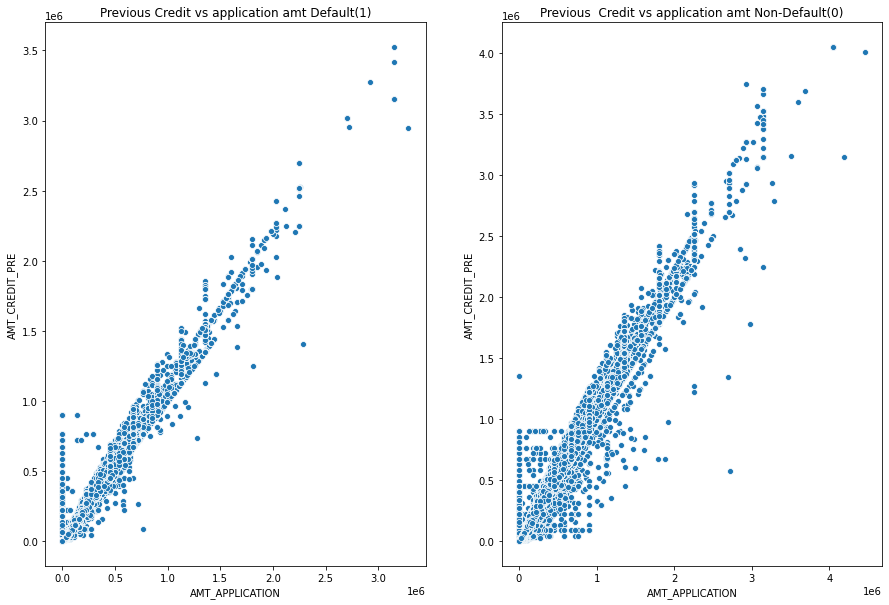

In [517]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Previous Credit vs application amt Default(1)')
sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_PRE',data=merge_default)


plt.subplot(1,2,2)
plt.title('Previous  Credit vs application amt Non-Default(0)')
sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_PRE',data=merge_nondefault)

#Inference :AMT_APPLICATION  and AMT_CREDIT_PRE are linearly correlated in a postive direction :AMT_APPLICATION increases with increase in AMT_CREDIT_PRE